In [1]:
# Fashion recommendations

In [1]:
#ResNet-50 і MobileNetV3 - are models used for feature extraction from images.
"""
Both models are powerful tools for feature extraction, and their selection depends on the specific needs of the application,
balancing accuracy and computational efficiency.
"""

'\nBoth models are powerful tools for feature extraction, and their selection depends on the specific needs of the application, \nbalancing accuracy and computational efficiency.\n'

During the collection of clothing images from websites (using the official API, retailed.io), a file named products_info.csv was generated with the necessary information (brand, product name, short description, price, and link to the product on the official retailer's website). This allows the mobile application to display not only similar images but also the corresponding metadata for user convenience.

In [ ]:
#ResNet-50 (Residual Network)

1. A deep convolutional neural network with 50 layers.
2. Utilizes residual blocks to mitigate the vanishing gradient problem, enabling the training of very deep networks.
3. Pre-trained on the ImageNet dataset, making it effective for extracting detailed features from images.
4. Ideal for high-accuracy tasks but computationally intensive.

In [ ]:
#MobileNetV3

1. A lightweight convolutional neural network designed for mobile and embedded devices.
2. Optimized for efficiency and speed with a smaller model size compared to ResNet-50.
3. Also pre-trained on ImageNet, capable of effective feature extraction with lower computational requirements.
4. Suitable for applications where computational resources are limited, like mobile apps.

In [ ]:
#ResNet-50 (Residual Network)

In [52]:
# Preparing the environment for using ResNet-50

# General Libraries and Utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import pickle
from numpy.linalg import norm

# Machine Learning and Similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# TensorFlow and Keras
import tensorflow
#Loading the MobileNetV3Small architecture
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
#Loading the ResNet-50 architecture
from keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalMaxPooling2D, Input




# Google Colab Integration
from google.colab import drive


In [53]:
"""
Initialization of the Model with Pre-Trained Weights from ImageNet and Specification of Input Image Shape:

- Initialize the model with pre-trained weights from ImageNet.
- Specify the input image shape as (224, 224, 3), which corresponds to height, width, and RGB channels.
- Freeze the model layers to maintain the pre-trained weights.
"""

model=ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable=False

A detailed summary of the model's architecture:

- **Layer Details**: Lists all layers in the model, including their types (e.g., Conv2D, Dense, MaxPooling2D) and configurations.

- **Output Shapes**: Shows the shape of the output for each layer. This helps to understand how the dimensions of the data change as it progresses through the network.

- **Parameter Counts**: Displays the number of parameters for each layer. This includes both trainable and non-trainable parameters.

- **Total Parameters**: Provides a summary of the total number of parameters in the model, which helps gauge the model's complexity and resource requirements.

In [54]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [55]:
#Access files stored on Google Drive directly from Colab Notebook.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# The path to the folder with images
image_folder_path = '/content/drive/My Drive/zara_images'

#We check the contents of the folder
print(os.listdir(image_folder_path))


['08259186406-a2.jpg', '04877265400-001-p.jpg', '09863046427-p.jpg', '05644452250-a3.jpg', '05644458250-002-p.jpg', '05644454251-a5.jpg', '11505410001-ult.jpg', '05644456250-a1.jpg', '05644453250-p.jpg', '05644458250-p.jpg', '05644457250-a3.jpg', 'M0000000741-ult10.jpg', '20110665999-ult.jpg', '20110666999-ult.jpg', '03641804800-p.jpg', '03641801051-p.jpg', '03641803800-p.jpg', '03641800800-p.jpg', '03641802051-p.jpg', '03641805800-p.jpg', '03641806621-p.jpg', '03641820505-h1.jpg', '03641801621-a1.jpg', '03641802051-a2.jpg', '05644814250-p.jpg', '03641820716-a2.jpg', '03641803051-a1.jpg', '03641805800-a1.jpg', '05644822250-ult2.jpg', '05644814250-a1.jpg', '05644822250-p.jpg', '20110670999-ult.jpg', '00881066779-a3.jpg', '00881502779-p.jpg', '04764111712-h2.jpg', '03067012505-e1.jpg', '03067012505-a3.jpg', '03641815507-a2.jpg', '03641815800-a1.jpg', '03920216712-a1.jpg', '04661203800-e1.jpg', '04661203717-e1.jpg', '03920216800-a1.jpg', '03641820250-h1.jpg', '03641820250-a2.jpg', '045482

Image uploaded successfully


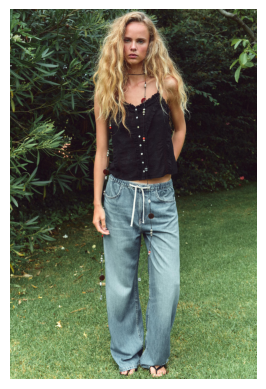

In [57]:
# Path to image
path = '/content/drive/My Drive/zara_images/00881073800-015-p.jpg'

# Uploading an image
img = cv2.imread(path)

# Download check
if img is not None:
    print("Image uploaded successfully")
else:
    print("Failed to load image")

# Conversion of color format from BGR (OpenCV) to RGB (for correct display in matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying the image
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [11]:
#Adding a GlobalMaxPooling2D layer to the existing ResNet-50 to extract the most important features from the ResNet-50 output

**Why Add GlobalMaxPooling2**:

1. **Feature Extraction**: GlobalMaxPooling2D helps to condense the feature maps produced by the convolutional layers into a single vector for each feature map. This vector captures the most prominent features (the highest values) from the entire spatial dimension of the feature map.

2. **Dimensionality Reduction**: By applying GlobalMaxPooling2D, to reduce the spatial dimensions (width and height) of the feature maps, making the data more manageable and suitable for further processing or classification.

3. **Improved Performance**: It can help to reduce overfitting by simplifying the model, as it aggregates information across the entire spatial extent of the feature maps.



In [58]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()
"""
Model Type:
Using the Sequential API, which is simpler but less flexible. It adds layers to an existing model.
"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_2 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


'\nModel Type:\nUsing the Sequential API, which is simpler but less flexible. It adds layers to an existing model.\n'

1. Using the Functional API, we will create a new, more personalized model, using the pre-trained ResNet-50 as a base model.

2. Add new layers for classification or other tasks.

This model uses the Functional API to create a more flexible and customizable model by building on the ResNet-50 base. The code first initializes ResNet-50 without its top classification layer, adds a GlobalMaxPooling2D layer, and then includes additional dense layers for classification. This approach provides more control over the architecture and allows for custom configurations.


In [9]:
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense
# Load the ResNet-50 model with pre-trained weights, excluding the top layer
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the base model
base_model_resnet.trainable = False
# Add GlobalMaxPooling2D layer
x_resnet = base_model_resnet.output
x_resnet = GlobalMaxPooling2D()(x_resnet)

# Add Dense layers for classification
x_resnet = Dense(1024, activation='relu')(x_resnet)
num_classes = 10  # Adjust num_classes as needed
output_resnet = Dense(num_classes, activation='softmax')(x_resnet)  # Adjust num_classes as needed

# Create the new model
model_resnet = Model(inputs=base_model_resnet.input, outputs=output_resnet)

# Print model summary
model_resnet.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

So now we have two different models built on the basis of ResNet-50. We plan to use both models to build a fashion recommendation system.

Model 1: Extracts features using ResNet-50 and applies GlobalMaxPooling2D (suitable for tasks where you only need to extract features and not perform classification).

Model 2: Extends Model 1 by adding dense layers for classification, with ResNet-50 weights frozen.

In [ ]:
# Image preparation

In [19]:
# Step-by-step preprocessing of the image
"""
Image preprocessing:
1) Reading files and resizing images to 224x224
2) Converting the image to array format
3) Normalizing pixel values
"""


'\nImage preprocessing:\n1) Reading files and resizing images to 224x224\n2) Converting the image to array format\n3) Normalizing pixel values\n'

In [59]:
# Resizing the image to (224, 224) — this is the size on which the ResNet50 model was trained.

img=cv2.resize(img_rgb,(224,224))

In [60]:
img =np.array(img)

In [61]:
img.shape

(224, 224, 3)

In [62]:
#(number_of_images,224,224,3)

expand_img=np.expand_dims(img,axis=0)

In [63]:

expand_img

array([[[[ 49,  74,  44],
         [ 80, 110,  82],
         [ 71,  96,  71],
         ...,
         [ 72,  94,  63],
         [ 45,  47,  30],
         [118, 126,  91]],

        [[ 79, 105,  76],
         [ 65,  97,  71],
         [ 55,  81,  56],
         ...,
         [ 86, 103,  73],
         [115, 129, 107],
         [ 68,  80,  49]],

        [[ 70, 100,  72],
         [ 88, 122,  98],
         [ 45,  59,  36],
         ...,
         [ 63,  73,  49],
         [ 76,  92,  61],
         [ 58,  75,  45]],

        ...,

        [[164, 193, 133],
         [193, 210, 153],
         [120, 153,  82],
         ...,
         [139, 178, 110],
         [159, 194, 130],
         [133, 170, 118]],

        [[177, 217, 166],
         [185, 213, 158],
         [206, 215, 147],
         ...,
         [149, 186, 134],
         [144, 184, 121],
         [131, 170, 112]],

        [[189, 217, 148],
         [205, 228, 177],
         [176, 215, 148],
         ...,
         [123, 161, 100],
        

In [64]:
expand_img.shape

(1, 224, 224, 3)

In [65]:
#A function for preprocessing the image before feeding it to the model. This includes image pixel normalization.
pre_image=preprocess_input(expand_img)

In [66]:
pre_image.shape

(1, 224, 224, 3)

In [67]:
"""Extracting image features as a multidimensional array using the model and
converting the multidimensional array into a one-dimensional vector using the flatten() method.
"""
result=model.predict(pre_image).flatten()

1/1 [==============================] - 2s 2s/step


In [68]:
#Representation of the feature vector for an image.
result

array([1.9240894, 5.005814 , 3.8990026, ..., 1.4395545, 1.7352397,
       4.8897166], dtype=float32)

In [69]:
""" The dimensionality of the vector (corresponding to the output size of the average pooling layer of the model (pooling='avg')) is
 a vector with a dimensionality of 2048 (for ResNet50).
"""
result.shape

(2048,)

In [70]:
#Normalization of feature vectors to standardize results, ensuring that all features have the same scale
from numpy.linalg import norm
result=result/norm(result)

In [71]:
result

array([0.00690503, 0.01796449, 0.01399245, ..., 0.00516616, 0.0062273 ,
       0.01754785], dtype=float32)

In [72]:
#Encapsulation of previous steps into a function for preprocessing data before feeding it into the model for training.
def extract_feature(img_path, model):
    """
    Extracts and normalizes features from an image using the MobileNetV3Small model.

    Parameters:
    - img_path (str): Path to the image.
    - model: Loaded MobileNetV3Small model.

    Returns:
    - normalized (numpy.ndarray): Normalized feature vector of the image.
    """
    # Load the image
    img = cv2.imread(img_path)  # Load the image in BGR format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB format
    img = cv2.resize(img, (224, 224))  # Resize the image to the input size expected by the model
    img = np.array(img)  # Convert the image to a NumPy array

    # Preprocess the image
    expand_img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model input
    pre_image = preprocess_input(expand_img)  # Preprocess the image for the model

    # Extract and normalize features
    result = model.predict(pre_image).flatten()  # Extract features and flatten the vector
    normalized = result / np.linalg.norm(result)  # Normalize the feature vector
    return normalized  # Return the normalized feature vector


In [74]:
# Calling the function and displaying its result, which is inherent to step-by-step image processing
features = extract_feature('/content/drive/My Drive/zara_images/00881073800-015-p.jpg', model)
print(features)


1/1 [==============================] - 0s 181ms/step
[0.00690503 0.01796449 0.01399245 ... 0.00516616 0.0062273  0.01754785]


In [75]:
# The path to the folder of images obtained from the store site
path = '/content/drive/My Drive/zara_images/'

In [76]:
# Empty lists
filename = []  # To store image paths
feature_list = []  # To store image features after their processing

# Define file extensions that are considered images
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Adding files with suitable extensions to the list
for file in os.listdir(path):
    file_path = os.path.join(path, file)
    # Check if the file is an image
    if os.path.isfile(file_path) and os.path.splitext(file)[1].lower() in image_extensions:
        filename.append(file_path)

In [77]:
len(filename) #The number of image paths received from the store site

2308

In [78]:
filename[:5]

['/content/drive/My Drive/zara_images/08259186406-a2.jpg',
 '/content/drive/My Drive/zara_images/04877265400-001-p.jpg',
 '/content/drive/My Drive/zara_images/09863046427-p.jpg',
 '/content/drive/My Drive/zara_images/05644452250-a3.jpg',
 '/content/drive/My Drive/zara_images/05644458250-002-p.jpg']

In [79]:
# Get a list of all files in a folder
all_files = os.listdir(path)

# Filter only images
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
image_files = [file for file in all_files if os.path.splitext(file)[1].lower() in image_extensions]

# Display the number of images
print(f"The number of images in the folder: {len(image_files)}")


The number of images in the folder: 2308


In [80]:
# Display the total number of files
print(f"The total number of files in the folder: {len(all_files)}")

# Display the number of invalid files
print(f"Number of files with suitable extensions: {len(image_files)}")


The total number of files in the folder: 2308
Number of files with suitable extensions: 2308


In [81]:
#Implementation of a progress bar (visual progress indicator) to track the progress of loops in the code
from tqdm import tqdm

In [82]:
#Get the attributes for each image in the folder
for file in filename:
    feature_list.append(extract_feature(file,model))

1/1 [==============================] - 0s 176ms/step


In [83]:
from tensorflow.keras.models import load_model
# Define the save path
save_path = '/content/drive/My Drive/'

# Save tags and file paths for later use
pickle.dump(feature_list, open(os.path.join(save_path, 'featurevector_resnet.pkl'), 'wb'))
pickle.dump(filename, open(os.path.join(save_path, 'filenames_resnet.pkl'), 'wb'))

# Save the model in the recommended Keras format
model.save(os.path.join(save_path, 'resnet50_model.keras'))

In [ ]:
# TESTING of two algorithms for measuring similarity: the K-Nearest Neighbors algorithm and the cosine similarity algorithm

In [84]:
# Define the path where the files are saved
load_path = '/content/drive/My Drive/'

# Load the saved image features
with open(os.path.join(load_path, 'featurevector_resnet.pkl'), 'rb') as f:
    feature_list = np.array(pickle.load(f))

# Load the saved filenames
with open(os.path.join(load_path, 'filenames_resnet.pkl'), 'rb') as f:
    filename = pickle.load(f)

# Load the saved model
loaded_model = load_model(os.path.join(load_path, 'resnet50_model.keras'))

# Verify loading
print("Feature list loaded with shape:", feature_list.shape)
print("Filenames loaded:", filename[:5])  # Displaying the first 5 filenames
print("Model summary:")
loaded_model.summary()

Feature list loaded with shape: (2308, 2048)
Filenames loaded: ['/content/drive/My Drive/zara_images/08259186406-a2.jpg', '/content/drive/My Drive/zara_images/04877265400-001-p.jpg', '/content/drive/My Drive/zara_images/09863046427-p.jpg', '/content/drive/My Drive/zara_images/05644452250-a3.jpg', '/content/drive/My Drive/zara_images/05644458250-002-p.jpg']
Model summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_2 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
__________________________________

In [85]:
# Extracting features for the user's image (We use extract_feature to extract the features for the selected image.)
selected_image_path = '/content/drive/My Drive/zara_images/07484578800-e1.jpg'
selected_features = extract_feature(selected_image_path, model)

1/1 [==============================] - 0s 200ms/step


In [45]:
# Measuring Similarity Using K-Nearest Neighbors (KNN)
"""
We will use the K-Nearest Neighbors (KNN) algorithm to find the most similar images to a given user image.
KNN identifies images with features closest to the user image in the feature space.
We then evaluate these images based on their similarity scores and recommend the top 10 images
with the highest similarity to the user image.
"""

'\nWe will use the K-Nearest Neighbors (KNN) algorithm to find the most similar images to a given user image.\nKNN identifies images with features closest to the user image in the feature space.\nWe then evaluate these images based on their similarity scores and recommend the top 10 images \nwith the highest similarity to the user image.\n'

In [86]:
def recommend(features, feature_list):
    neighbours = NearestNeighbors(n_neighbors=11, algorithm='brute', metric='euclidean')
    neighbours.fit(feature_list)
    distances, indices = neighbours.kneighbors([features])
    return distances, indices

In [47]:
print("Indices shape:", len(indices))
print("Distances shape:", len(distances))
print("Filename length:", len(filename))


Indices shape: 1
Distances shape: 1
Filename length: 2308


In [48]:
print("Indices:", indices)
print("Distances:", distances)
print("Type of Indices:", type(indices))
print("Type of Distances:", type(distances))


Indices: [[1589 3897 2292 4600 3589 1281 1220 3528 1644 3952 1284]]
Distances: [[0.         0.         0.39607633 0.39607633 0.40717326 0.40717326
  0.45373282 0.45373282 0.45731231 0.45731231 0.47177726]]
Type of Indices: <class 'numpy.ndarray'>
Type of Distances: <class 'numpy.ndarray'>


In [50]:
# Flatten the 2D arrays to 1D
indices_flat = indices.flatten()
distances_flat = distances.flatten()

# Verify the shapes
print("Flattened Indices:", indices_flat)
print("Flattened Distances:", distances_flat)

# Display the names of similar images
for i in range(len(indices_flat)):
    index = indices_flat[i]
    if index < len(filename):
        print(f"Image: {filename[index]}, Distance: {distances_flat[i]}")
    else:
        print(f"Index {index} is out of range for filename.")


Flattened Indices: [1589 3897 2292 4600 3589 1281 1220 3528 1644 3952 1284]
Flattened Distances: [0.         0.         0.39607633 0.39607633 0.40717326 0.40717326
 0.45373282 0.45373282 0.45731231 0.45731231 0.47177726]
Image: /content/drive/My Drive/zara_images/07484578800-e1.jpg, Distance: 0.0
Index 3897 is out of range for filename.
Image: /content/drive/My Drive/zara_images/03666300802-e1.jpg, Distance: 0.39607633067093334
Index 4600 is out of range for filename.
Index 3589 is out of range for filename.
Image: /content/drive/My Drive/zara_images/00794200500-e1.jpg, Distance: 0.40717326302571577
Image: /content/drive/My Drive/zara_images/05659109801-e1.jpg, Distance: 0.4537328227919175
Index 3528 is out of range for filename.
Image: /content/drive/My Drive/zara_images/07545404800-e1.jpg, Distance: 0.4573123100273068
Index 3952 is out of range for filename.
Image: /content/drive/My Drive/zara_images/00794200401-e1.jpg, Distance: 0.4717772641553991


In [87]:
#Find similar images 07484578800-e1.jpg
distances, indices = recommend(selected_features, feature_list)

# Display the names of similar images
for i in range(len(indices[0])):
    print(f"Image: {filename[indices[0][i]]}, Distance: {distances[0][i]}")


Image: /content/drive/My Drive/zara_images/07484578800-e1.jpg, Distance: 0.0
Image: /content/drive/My Drive/zara_images/03666300802-e1.jpg, Distance: 0.39607633067093334
Image: /content/drive/My Drive/zara_images/00794200500-e1.jpg, Distance: 0.40717326302571577
Image: /content/drive/My Drive/zara_images/05659109801-e1.jpg, Distance: 0.4537328227919175
Image: /content/drive/My Drive/zara_images/07545404800-e1.jpg, Distance: 0.4573123100273068
Image: /content/drive/My Drive/zara_images/00794200401-e1.jpg, Distance: 0.4717772641553991
Image: /content/drive/My Drive/zara_images/01618404800-e1.jpg, Distance: 0.4767513370035084
Image: /content/drive/My Drive/zara_images/03666300800-e1.jpg, Distance: 0.4775091368614941
Image: /content/drive/My Drive/zara_images/07147303401-e1.jpg, Distance: 0.47906106496995365
Image: /content/drive/My Drive/zara_images/06085474800-e1.jpg, Distance: 0.48481470577322927
Image: /content/drive/My Drive/zara_images/08574340700-e1.jpg, Distance: 0.4947964985929431

In [ ]:
# Calculation of cosine similarity:

In [88]:
load_path = '/content/drive/My Drive/'

# Load the saved image features
with open(os.path.join(load_path, 'featurevector_resnet.pkl'), 'rb') as f:
    feature_list = np.array(pickle.load(f))

# Load the saved filenames
with open(os.path.join(load_path, 'filenames_resnet.pkl'), 'rb') as f:
    filename = pickle.load(f)

In [89]:
# Get features for the selected image
selected_image_path = '/content/drive/My Drive/zara_images/07484578800-e1.jpg'
selected_features = extract_feature(selected_image_path, model)

1/1 [==============================] - 0s 318ms/step


In [90]:
def recommend(features, feature_list):
    """
    Recommend the most similar images based on cosine similarity.

    Parameters:
    - features (numpy.ndarray): Feature vector of the selected image.
    - feature_list (list): List of feature vectors for all images.

    Returns:
    - top_indices (numpy.ndarray): Indices of the most similar images.
    - similarities (numpy.ndarray): Cosine similarity scores for all images.
    """
    # Convert feature_list to a NumPy array
    feature_list_np = np.array(feature_list)

    # Compute cosine similarity
    similarities = cosine_similarity([features], feature_list_np)

    # Get indices of the 5 most similar images
    top_indices = similarities[0].argsort()[-5:][::-1]

    return top_indices, similarities


In [91]:
# Find similar images for 07484578800-e1.jpg
top_indices, similarities = recommend(selected_features, feature_list)

# Display the names of similar images
for idx in top_indices:
    print(f"Image: {filename[idx]}, Cosine similarity: {similarities[0][idx]}")


Image: /content/drive/My Drive/zara_images/07484578800-e1.jpg, Cosine similarity: 0.9999998807907104
Image: /content/drive/My Drive/zara_images/03666300802-e1.jpg, Cosine similarity: 0.9215617179870605
Image: /content/drive/My Drive/zara_images/00794200500-e1.jpg, Cosine similarity: 0.917104959487915
Image: /content/drive/My Drive/zara_images/05659109801-e1.jpg, Cosine similarity: 0.8970633149147034
Image: /content/drive/My Drive/zara_images/07545404800-e1.jpg, Cosine similarity: 0.8954327702522278


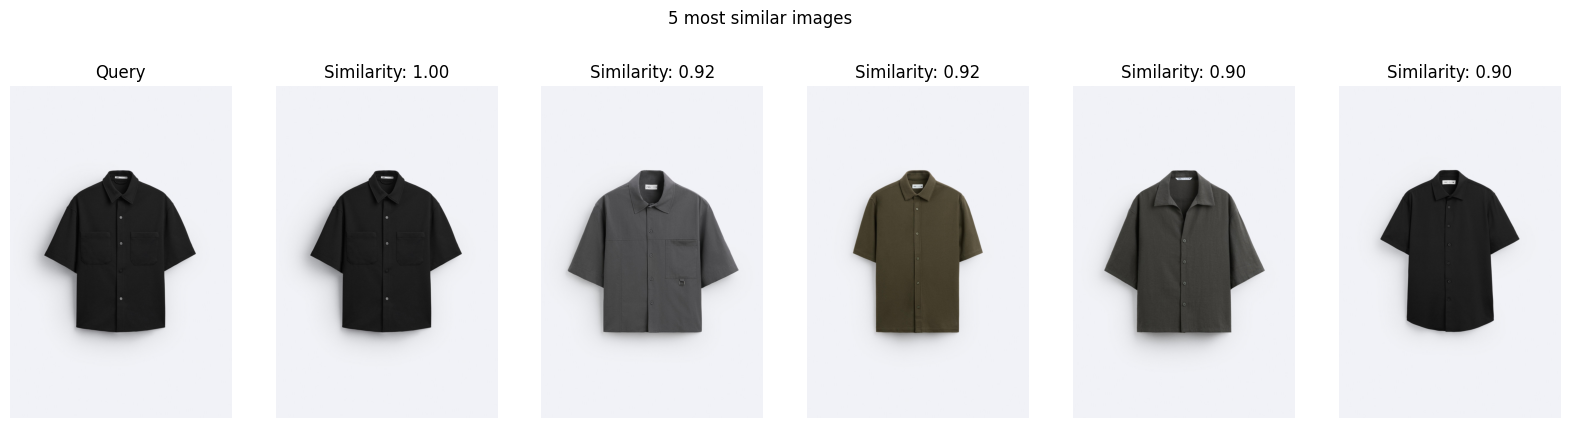

In [92]:
# Display names and images
fig, axes = plt.subplots(1, 6, figsize=(20, 5))
fig.suptitle('5 most similar images')

# Display the selected image
selected_img = cv2.imread(selected_image_path)
selected_img = cv2.cvtColor(selected_img, cv2.COLOR_BGR2RGB)
axes[0].imshow(selected_img)
axes[0].set_title('Query')
axes[0].axis('off')

# Display similar images
for i, idx in enumerate(top_indices):
    img_path = filename[idx]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i + 1].imshow(img)
    axes[i + 1].set_title(f"Similarity: {similarities[0][idx]:.2f}")
    axes[i + 1].axis('off')

plt.show()

In [93]:
# File with markers CSV file from Google Drive
csv_path = '/content/drive/My Drive/products_info.csv'
df = pd.read_csv(csv_path)
df.head()

Brand                                Product Name     Category  \
0  zara                                        LOOK  No category   
1  zara                            PRINTED TROUSERS     PANTALON   
2  zara  LINEN BLEND MINI DRESS WITH CUT-OUT DETAIL      VESTIDO   
3  zara                                        LOOK  No category   
4  zara           LINEN BLEND ASYMMETRIC MIDI DRESS      VESTIDO   

          Product ID          Color     Style  \
0  T0858038871-I2024            871  No style   
1     08191716-I2024  Multicoloured  No style   
2     08651396-I2024          Black  No style   
3  T0858374480-I2024            480  No style   
4     08419729-I2024          Black  No style   

                                           Image URL Gender  \
0  https://static.zara.net/assets/public/90a2/0e7...  WOMAN   
1  https://static.zara.net/assets/public/6a77/cf3...  WOMAN   
2  https://static.zara.net/assets/public/a35e/005...  WOMAN   
3  https://static.zara.net/assets/public/b832/4f1...  WOMAN   
4  https://static.zara.net/assets/public/dc56/b4e...  WOMAN   

                                         Product URL  
0  https://www.zara.com/ua/en/-pT0858038871.html?...  
1  https://www.zara.com/ua/en/printed-trousers-p0...  
2  https://www.zara.com/ua/en/linen-blend-mini-dr...  
3  https://www.zara.com/ua/en/-pT0858374480.html?...  
4  https://www.zara.com/ua/en/linen-blend-asymmet...

In [94]:
df.isna().sum()

Brand            0
Product Name    12
Category         0
Product ID       0
Color            0
Style            0
Image URL        6
Gender           0
Product URL      0
dtype: int64

In [95]:
df['Image URL'] = df['Image URL'].fillna('')
df['Product Name'] = df['Product Name'].fillna('')


In [96]:
df.isna().sum()

Brand           0
Product Name    0
Category        0
Product ID      0
Color           0
Style           0
Image URL       0
Gender          0
Product URL     0
dtype: int64

In [97]:

df['Image URL'] = df['Image URL'].astype(str)


In [98]:
# A function to get the pure filename from a URL
def extract_image_name(url):
    parsed_url = urlparse(url)
    # Get the path from the URL
    path = parsed_url.path
    # Get only the file name with no query parameters
    file_name = os.path.basename(path)
    return file_name



In [99]:
# Add the Image Name variable
from urllib.parse import urlparse, parse_qs
df['Image Name'] = df['Image URL'].apply(extract_image_name)

In [100]:
df.head()

Brand                                Product Name     Category  \
0  zara                                        LOOK  No category   
1  zara                            PRINTED TROUSERS     PANTALON   
2  zara  LINEN BLEND MINI DRESS WITH CUT-OUT DETAIL      VESTIDO   
3  zara                                        LOOK  No category   
4  zara           LINEN BLEND ASYMMETRIC MIDI DRESS      VESTIDO   

          Product ID          Color     Style  \
0  T0858038871-I2024            871  No style   
1     08191716-I2024  Multicoloured  No style   
2     08651396-I2024          Black  No style   
3  T0858374480-I2024            480  No style   
4     08419729-I2024          Black  No style   

                                           Image URL Gender  \
0  https://static.zara.net/assets/public/90a2/0e7...  WOMAN   
1  https://static.zara.net/assets/public/6a77/cf3...  WOMAN   
2  https://static.zara.net/assets/public/a35e/005...  WOMAN   
3  https://static.zara.net/assets/public/b832/4f1...  WOMAN   
4  https://static.zara.net/assets/public/dc56/b4e...  WOMAN   

                                         Product URL          Image Name  
0  https://www.zara.com/ua/en/-pT0858038871.html?...   08638388711-p.jpg  
1  https://www.zara.com/ua/en/printed-trousers-p0...   08191716330-p.jpg  
2  https://www.zara.com/ua/en/linen-blend-mini-dr...  08651396800-h1.jpg  
3  https://www.zara.com/ua/en/-pT0858374480.html?...   08663396800-p.jpg  
4  https://www.zara.com/ua/en/linen-blend-asymmet...   08419729800-p.jpg

In [101]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1aL0P1OvELaOYkAyXLVo3UtyX-iHRL-9HpjmWCnxOCQg#gid=0


In [102]:
df[['Image URL', 'Image Name']].head(10)


Image URL          Image Name
0  https://static.zara.net/assets/public/90a2/0e7...   08638388711-p.jpg
1  https://static.zara.net/assets/public/6a77/cf3...   08191716330-p.jpg
2  https://static.zara.net/assets/public/a35e/005...  08651396800-h1.jpg
3  https://static.zara.net/assets/public/b832/4f1...   08663396800-p.jpg
4  https://static.zara.net/assets/public/dc56/b4e...   08419729800-p.jpg
5  https://static.zara.net/assets/public/ac09/b72...   09878182800-p.jpg
6  https://static.zara.net/assets/public/aaa1/2e9...   09878181529-p.jpg
7  https://static.zara.net/assets/public/63a6/2b6...   03897069711-p.jpg
8  https://static.zara.net/assets/public/40ec/008...   08535312671-p.jpg
9  https://static.zara.net/assets/public/9215/f61...  08535312671-a1.jpg

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         1299 non-null   object
 1   Product Name  1299 non-null   object
 2   Category      1299 non-null   object
 3   Product ID    1299 non-null   object
 4   Color         1299 non-null   object
 5   Style         1299 non-null   object
 6   Image URL     1299 non-null   object
 7   Gender        1299 non-null   object
 8   Product URL   1299 non-null   object
 9   Image Name    1299 non-null   object
dtypes: object(10)
memory usage: 101.6+ KB


In [104]:
csv_path = '/content/drive/My Drive/info.csv'
df.to_csv(csv_path, index=False)

print(f"DataFrame saved to {csv_path}")

DataFrame saved to /content/drive/My Drive/info.csv


In [105]:
def extract_feature(img_path, model):
    """
    Extracts and normalizes features from an image using the MobileNetV3Small model.

    Parameters:
    - img_path (str): Path to the image.
    - model: Loaded MobileNetV3Small model.

    Returns:
    - normalized (numpy.ndarray): Normalized feature vector of the image.
    """
    # Load the image
    img = cv2.imread(img_path)  # Load the image in BGR format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB format
    img = cv2.resize(img, (224, 224))  # Resize the image to the input size expected by the model
    img = np.array(img)  # Convert the image to a NumPy array

    # Preprocess the image
    expand_img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model input
    pre_image = preprocess_input(expand_img)  # Preprocess the image for the model

    # Extract and normalize features
    result = model.predict(pre_image).flatten()  # Extract features and flatten the vector
    normalized = result / np.linalg.norm(result)  # Normalize the feature vector
    return normalized  # Return the normalized feature vector

In [106]:
def recommend(features, feature_list):
    """
    Recommend the most similar images based on cosine similarity.

    Parameters:
    - features (numpy.ndarray): Feature vector of the selected image.
    - feature_list (list): List of feature vectors for all images.

    Returns:
    - top_indices (numpy.ndarray): Indices of the most similar images.
    - similarities (numpy.ndarray): Cosine similarity scores for all images.
    """
    similarities = [cosine_similarity([features], [feature]) for feature in feature_list]
    similarities = np.array(similarities).flatten()
    top_indices = similarities.argsort()[::-1][:5]  # Top 5 indices
    return top_indices, similarities


In [107]:
def recommend_similar_images(selected_image_path, model, feature_list, filename):
    """
    This function extracts features from a selected image, finds similar images
    and returns the indices and similarity scores of the most similar images.

    Parameters:
    - selected_image_path: str, path to the selected image.
    - model: a trained model used for feature extraction.
    - feature_list: list of features for all images in the dataset.
    - filename: list of filenames corresponding to the images in the dataset.

    Returns:
    - top_indices: numpy.ndarray, indices of the most similar images.
    - similarities: numpy.ndarray, similarity scores for all images.
    """
    # Extract features from the selected image
    selected_img_features = extract_feature(selected_image_path, model)
    # Find similar images
    top_indices, similarities = recommend(selected_img_features, feature_list)

    return top_indices, similarities


In [138]:
def display_similar_images(selected_image_path, top_indices, filename, similarities, df):
    """
    Display the selected image and the most similar images with metadata.

    Parameters:
    - selected_image_path: str, path to the selected image.
    - top_indices: list of indices for the most similar images.
    - filename: list of filenames for all images.
    - similarities: list of similarity scores for all images.
    - df: DataFrame containing image metadata.

    Returns:
    - None
    """
    import matplotlib.pyplot as plt
    import cv2

    # Create a subplot for the selected image and the similar images
    fig, axes = plt.subplots(1, len(top_indices) + 1, figsize=(20, 5))

    # Display the selected image
    selected_img = cv2.imread(selected_image_path)
    selected_img = cv2.cvtColor(selected_img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(selected_img)
    axes[0].set_title("Selected Image")
    axes[0].axis('off')

    # Display similar images
    for i, idx in enumerate(top_indices):
        img_path = filename[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        axes[i + 1].imshow(img)
        axes[i + 1].axis('off')

        # Display the similarity score as the title
        axes[i + 1].set_title(f"Similarity: {similarities[idx]:.2f}", fontsize=12)

        # Extract image information from the DataFrame
        image_name = df.loc[df['Image Name'] == img_path.split('/')[-1], 'Product Name'].values
        brand = df.loc[df['Image Name'] == img_path.split('/')[-1], 'Brand'].values
        product_url = df.loc[df['Image Name'] == img_path.split('/')[-1], 'Product URL'].values

        # Construct the metadata text
        metadata_text = ""
        if len(image_name) > 0:
            metadata_text += f"Name: {image_name[0]}\n"
        if len(brand) > 0:
            metadata_text += f"Brand: {brand[0]}\n"

        # Add metadata text below the image with smaller font size
        axes[i + 1].text(0.5, -0.15, metadata_text, fontsize=8, ha='center', va='top', transform=axes[i + 1].transAxes)

        # Add clickable link text below the metadata
        if len(product_url) > 0:
            # Create a shorter display text for the URL
            link_text = "View on Website"
            # Add clickable-like text below the metadata
            axes[i + 1].text(0.5, -0.30, link_text, fontsize=10, ha='center', va='top', transform=axes[i + 1].transAxes, color='blue', style='italic', bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.5'))

    plt.tight_layout()  # Adjust layout to fit everything neatly
    plt.show()


In [139]:
def handle_new_image_upload(selected_image_path, model, feature_list, filename, df):
    top_indices, similarities = recommend_similar_images(selected_image_path, model, feature_list, filename)
    display_similar_images(selected_image_path, top_indices, filename, similarities, df)


1/1 [==============================] - 0s 267ms/step


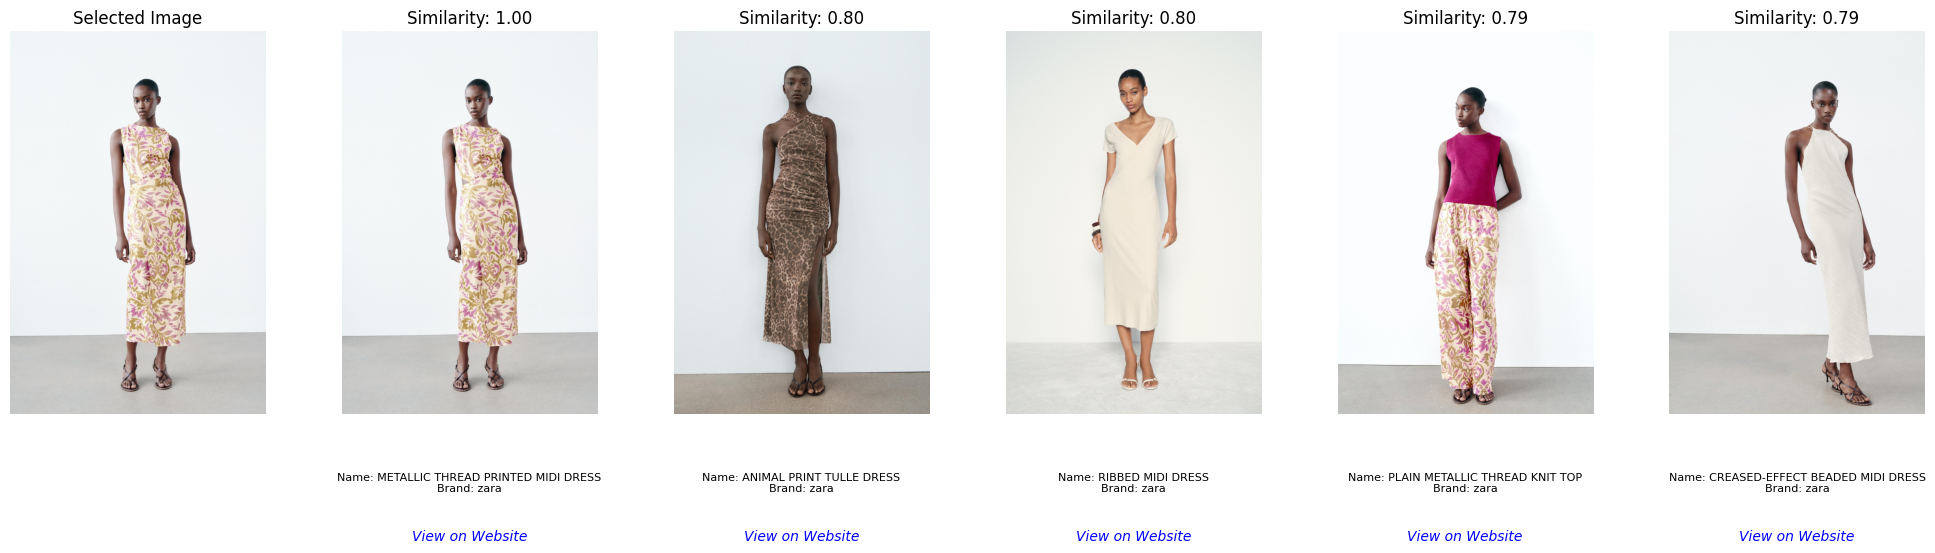

In [140]:
# Get features for the selected image 02157235330-p.jpg

selected_image_path = '/content/drive/My Drive/zara_images/02157235330-p.jpg'
handle_new_image_upload(selected_image_path, model, feature_list, filename, df)


1/1 [==============================] - 0s 230ms/step


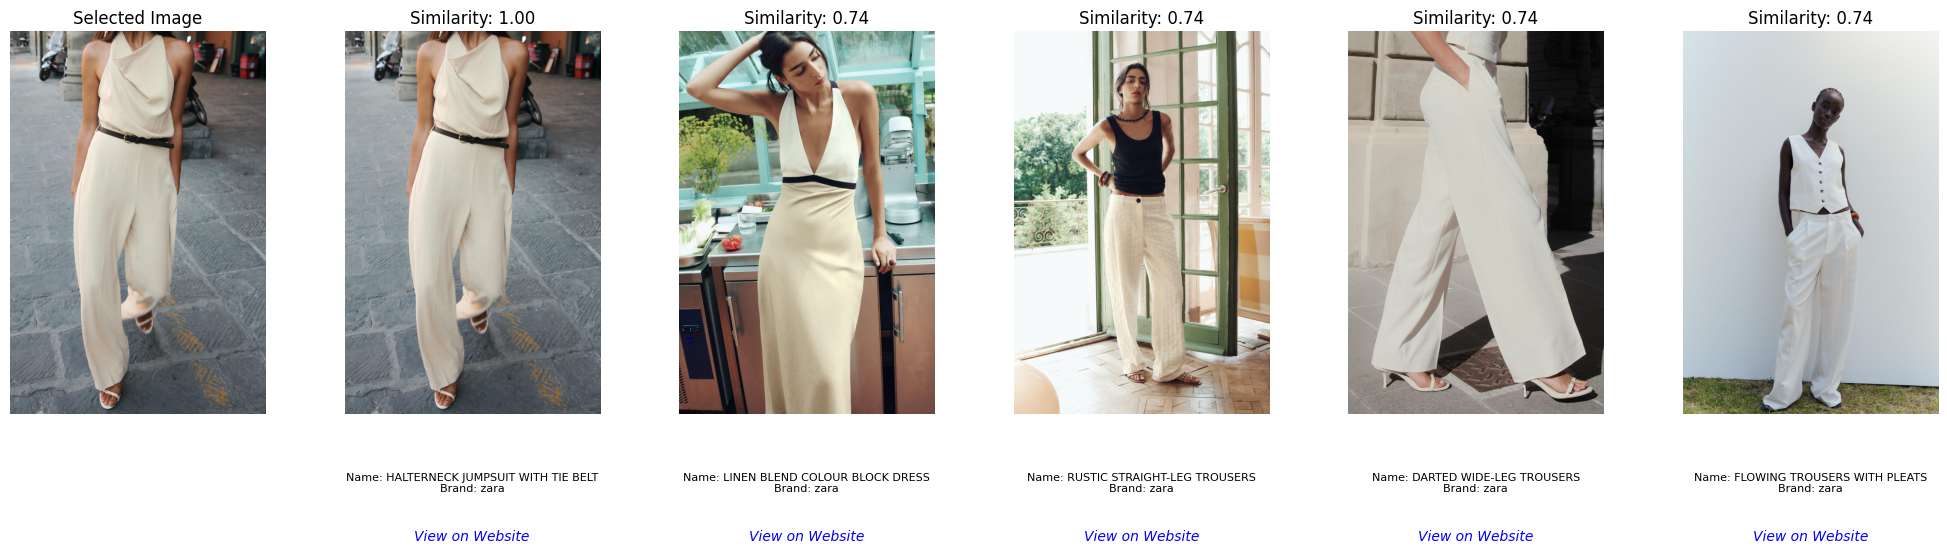

In [141]:
# Get features for the selected image 01971159805-a1.jpg
selected_image_path = '/content/drive/My Drive/zara_images/01971159805-a1.jpg'
handle_new_image_upload(selected_image_path, model, feature_list, filename, df)

1/1 [==============================] - 0s 207ms/step


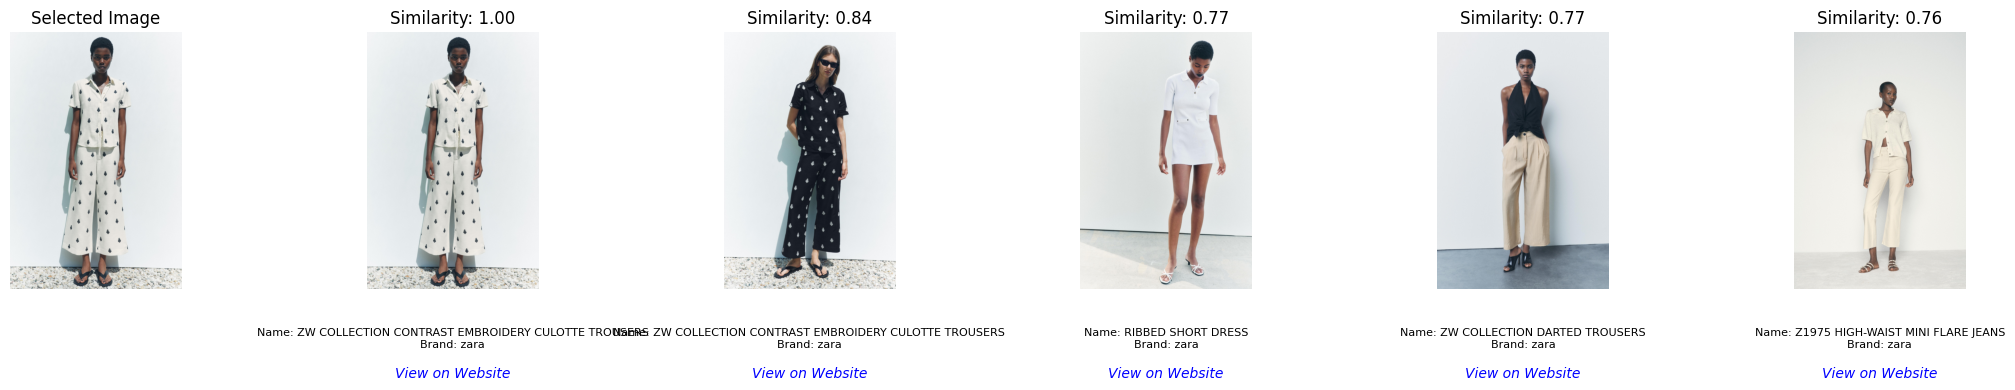

In [145]:
# Get features for the selected image 02731245251-15-p.jpg

selected_image_path = '/content/drive/My Drive/zara_images/02731245251-15-p.jpg'
handle_new_image_upload(selected_image_path, model, feature_list, filename, df)

1/1 [==============================] - 0s 203ms/step


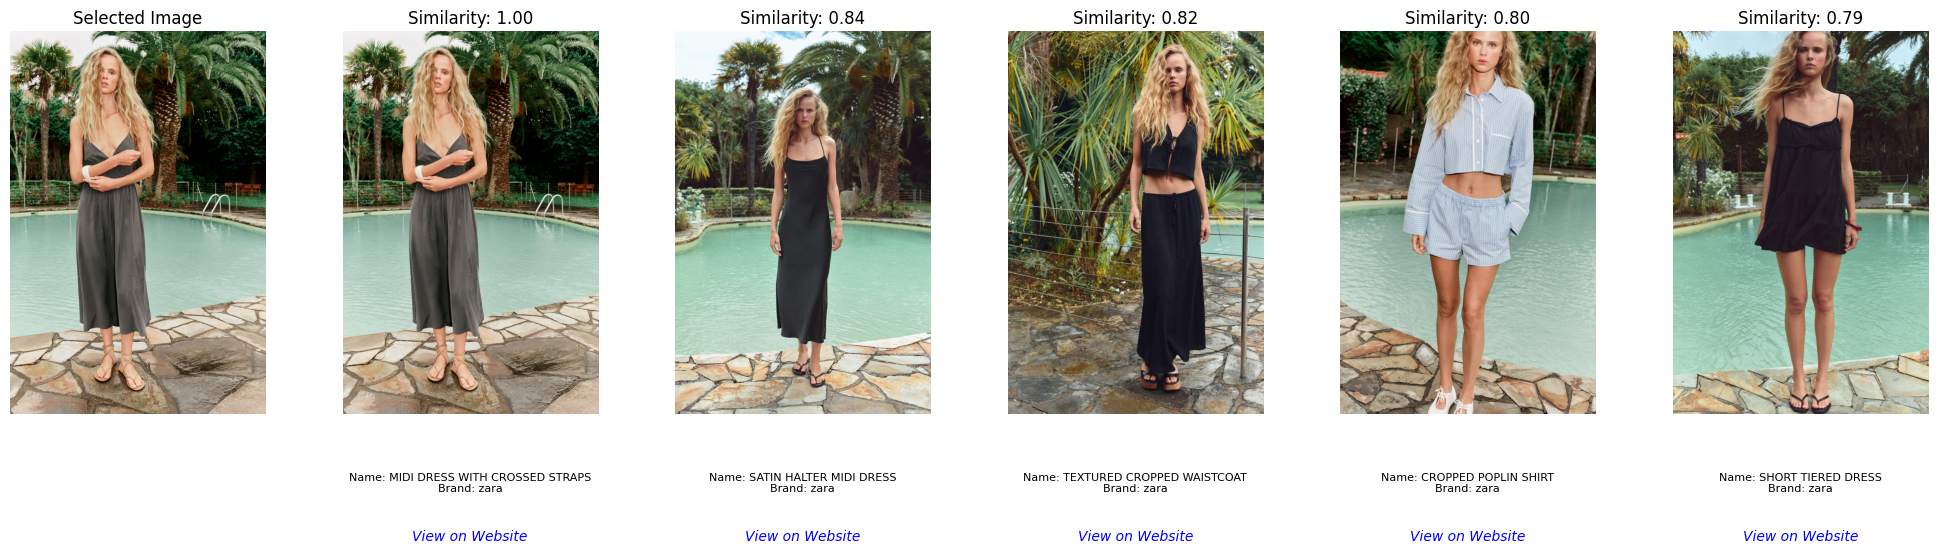

In [147]:
# Get features for the selected image 02731245251-15-p.jpg
selected_image_path = '/content/drive/My Drive/zara_images/04764218807-p.jpg'
handle_new_image_upload(selected_image_path, model, feature_list, filename, df)

In [149]:
from IPython.display import display, HTML
import numpy as np

def generate_html(selected_image_path, top_indices, filename, similarities, df):
    """
    Generate an HTML page displaying the selected image and the most similar images with clickable links.

    Parameters:
    - selected_image_path: str, path to the selected image.
    - top_indices: list of indices for the most similar images.
    - filename: list of filenames for all images.
    - similarities: list of similarity scores for all images.
    - df: DataFrame containing image metadata.

    Returns:
    - html_content: str, HTML content for displaying the images and links.
    """
    # Ensure similarities is a list of numbers
    if isinstance(similarities, np.ndarray):
        similarities = similarities.flatten().tolist()  # Flatten and convert to list

    # Start HTML content
    html_content = f"""
    <html>
    <head>
        <style>
            .container {{
                display: flex;
                flex-wrap: wrap;
            }}
            .image-box {{
                margin: 10px;
                text-align: center;
            }}
            .image-box img {{
                max-width: 200px;
                max-height: 200px;
                display: block;
                margin: 0 auto;
            }}
            .image-box a {{
                text-decoration: none;
                color: blue;
                font-weight: bold;
            }}
            .metadata {{
                font-size: 0.8em;
                color: gray;
            }}
        </style>
    </head>
    <body>
        <h1>Selected Image and Similar Images</h1>
        <div class="container">
            <div class="image-box">
                <h2>Selected Image</h2>
                <img src="{selected_image_path}" alt="Selected Image">
            </div>
    """

    # Add similar images to HTML content
    for i, idx in enumerate(top_indices.flatten()):  # Flatten indices if they are arrays
        img_path = filename[idx]
        image_name = df.loc[df['Image Name'] == img_path.split('/')[-1], 'Product Name'].values
        brand = df.loc[df['Image Name'] == img_path.split('/')[-1], 'Brand'].values
        product_url = df.loc[df['Image Name'] == img_path.split('/')[-1], 'Product URL'].values

        metadata_text = ""
        if len(image_name) > 0:
            metadata_text += f"Name: {image_name[0]}<br>"
        if len(brand) > 0:
            metadata_text += f"Brand: {brand[0]}<br>"

        link_text = "View on Website"
        if len(product_url) > 0:
            link_html = f'<a href="{product_url[0]}" target="_blank">{link_text}</a>'
        else:
            link_html = link_text

        html_content += f"""
            <div class="image-box">
                <h2>Similarity: {similarities[i]:.2f}</h2>
                <img src="{img_path}" alt="Similar Image">
                <p class="metadata">{metadata_text}</p>
                <p><a href="{product_url[0]}" target="_blank">View on Website</a></p>
            </div>
        """

    # End HTML content
    html_content += """
        </div>
    </body>
    </html>
    """

    return html_content

# Example usage (assuming you have the variables defined)
# html_content = generate_html(selected_image_path, top_indices, filename, similarities, df)

# Display HTML in Google Colab
# display(HTML(html_content))


In [ ]:
#MobileNetV3

In [115]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

In [117]:
# Load MobileNetV3Small with pre-trained weights, excluding the top layer
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [118]:
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_7[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling_2[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                         

In [119]:
# Create a new Sequential model and add InputLayer followed by the base model and GlobalMaxPooling2D
model = Sequential([
    Input(shape=(224, 224, 3)),  # Ensure the input shape is defined
    base_model,
    GlobalMaxPooling2D()
])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_max_pooling2d_4 (Gl  (None, 576)               0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 939120 (3.58 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


In [ ]:
def extract_feature(img_path, model):
    """
    Extracts and normalizes features from an image using the MobileNetV3Small model.

    Parameters:
    - img_path (str): Path to the image.
    - model: Loaded MobileNetV3Small model.

    Returns:
    - normalized (numpy.ndarray): Normalized feature vector of the image.
    """
    # Load the image
    img = cv2.imread(img_path)  # Load the image in BGR format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB format
    img = cv2.resize(img, (224, 224))  # Resize the image to the input size expected by the model
    img = np.array(img)  # Convert the image to a NumPy array

    # Preprocess the image
    expand_img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model input
    pre_image = preprocess_input(expand_img)  # Preprocess the image for the model

    # Extract and normalize features
    result = model.predict(pre_image).flatten()  # Extract features and flatten the vector
    normalized = result / np.linalg.norm(result)  # Normalize the feature vector
    return normalized  # Return the normalized feature vector

def recommend(features, feature_list):
    """
    Recommend the most similar images based on cosine similarity.

    Parameters:
    - features (numpy.ndarray): Feature vector of the selected image.
    - feature_list (list): List of feature vectors for all images.

    Returns:
    - top_indices (numpy.ndarray): Indices of the most similar images.
    - similarities (numpy.ndarray): Cosine similarity scores for all images.
    """
    similarities = [cosine_similarity([features], [feature])[0][0] for feature in feature_list]
    similarities = np.array(similarities)
    top_indices = similarities.argsort()[::-1][:5]  # Top 5 indices
    return top_indices, similarities

def recommend_similar_images(selected_image_path, model, feature_list, filename):
    """
    This function extracts features from a selected image, finds similar images
    and returns the indices and similarity scores of the most similar images.

    Parameters:
    - selected_image_path: str, path to the selected image.
    - model: a trained model used for feature extraction.
    - feature_list: list of features for all images in the dataset.
    - filename: list of filenames corresponding to the images in the dataset.

    Returns:
    - top_indices: numpy.ndarray, indices of the most similar images.
    - similarities: numpy.ndarray, similarity scores for all images.
    """
    # Extract features from the selected image
    selected_img_features = extract_feature(selected_image_path, model)
    # Find similar images
    top_indices, similarities = recommend(selected_img_features, feature_list)

    return top_indices, similarities

def display_similar_images(selected_image_path, top_indices, filename, similarities, df):
    """
    Display the selected image and the most similar images with metadata.

    Parameters:
    - selected_image_path: str, path to the selected image.
    - top_indices: list or array of indices for the most similar images.
    - filename: list of filenames for all images.
    - similarities: list or array of similarity scores for all images.
    - df: DataFrame containing image metadata.

    Returns:
    - None
    """
    fig, axes = plt.subplots(1, len(top_indices) + 1, figsize=(25, 5))
    fig.suptitle('Top 5 similar images')

    selected_img = cv2.imread(selected_image_path)
    selected_img = cv2.cvtColor(selected_img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(selected_img)
    axes[0].set_title('Query')
    axes[0].axis('off')

    for i, idx in enumerate(top_indices):
        img_path = filename[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i + 1].imshow(img)
        axes[i + 1].axis('off')

        img_name = os.path.basename(img_path)
        img_metadata = df[df['Image Name'] == img_name]

        if not img_metadata.empty:
            brand = img_metadata['Brand'].values[0]
            product_name = img_metadata['Product Name'].values[0]
            product_info = f"{brand}\n{product_name}"
        else:
            product_info = "No metadata available"

        axes[i + 1].set_title(f"Similarity: {similarities[idx]:.2f}")
        axes[i + 1].text(0.5, -0.2, product_info, fontsize=10, ha='center', transform=axes[i + 1].transAxes)

    plt.show()

def handle_new_image_upload(selected_image_path, model, feature_list, filename, df):
    """
    Handle the uploading of a new image, recommend similar images, and display results.

    Parameters:
    - selected_image_path: str, path to the selected image.
    - model: a trained model used for feature extraction.
    - feature_list: list of features for all images in the dataset.
    - filename: list of filenames corresponding to the images in the dataset.
    - df: DataFrame containing image metadata.

    Returns:
    - None
    """
    #top_indices, similarities = recommend_similar_images(selected_image_path, model, feature_list, filename)
    #display_similar_images(selected_image_path, top_indices, filename, similarities, df)


In [121]:
from tqdm import tqdm

# The path to the folder of images obtained from the store site
path = '/content/drive/My Drive/zara_images/'

# Empty lists
filename = []
feature_list = []
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

for file in os.listdir(path):
    file_path = os.path.join(path, file)
    if os.path.isfile(file_path) and os.path.splitext(file)[1].lower() in image_extensions:
        filename.append(file_path)

In [122]:
# Get tokens for each image in the progress display folder
for file in tqdm(filename, desc="Extracting features"):
    features = extract_feature(file, model)
    feature_list.append(features)

Extracting features:   0%|          | 0/2308 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Extracting features:   0%|          | 1/2308 [00:01<1:09:01,  1.80s/it]

1/1 [==============================] - 0s 56ms/step


Extracting features:   0%|          | 2/2308 [00:01<32:45,  1.17it/s]  

1/1 [==============================] - 0s 63ms/step


Extracting features:   0%|          | 3/2308 [00:02<22:10,  1.73it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:   0%|          | 4/2308 [00:02<16:47,  2.29it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:   0%|          | 5/2308 [00:02<13:52,  2.77it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:   0%|          | 6/2308 [00:02<11:55,  3.22it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:   0%|          | 7/2308 [00:03<11:06,  3.45it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:   0%|          | 8/2308 [00:03<10:21,  3.70it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:   0%|          | 9/2308 [00:03<09:47,  3.91it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features:   0%|          | 10/2308 [00:03<09:27,  4.05it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:   0%|          | 11/2308 [00:04<09:00,  4.25it/s]

1/1 [==============================] - 0s 82ms/step


Extracting features:   1%|          | 12/2308 [00:04<08:55,  4.29it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   1%|          | 13/2308 [00:04<07:50,  4.88it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   1%|          | 14/2308 [00:04<07:04,  5.41it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   1%|          | 15/2308 [00:04<06:41,  5.72it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   1%|          | 16/2308 [00:04<06:19,  6.04it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   1%|          | 17/2308 [00:04<06:12,  6.16it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   1%|          | 18/2308 [00:05<06:04,  6.28it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   1%|          | 19/2308 [00:05<06:09,  6.20it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   1%|          | 20/2308 [00:05<06:01,  6.34it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   1%|          | 21/2308 [00:05<05:46,  6.60it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   1%|          | 22/2308 [00:05<06:04,  6.28it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:   1%|          | 23/2308 [00:05<05:59,  6.35it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:   1%|          | 24/2308 [00:44<7:29:54, 11.82s/it]

1/1 [==============================] - 0s 57ms/step


Extracting features:   1%|          | 25/2308 [00:45<5:17:08,  8.33s/it]

1/1 [==============================] - 0s 55ms/step


Extracting features:   1%|          | 26/2308 [00:45<3:44:05,  5.89s/it]

1/1 [==============================] - 0s 55ms/step


Extracting features:   1%|          | 27/2308 [00:45<2:39:04,  4.18s/it]

1/1 [==============================] - 0s 74ms/step


Extracting features:   1%|          | 28/2308 [00:45<1:53:47,  2.99s/it]

1/1 [==============================] - 0s 55ms/step


Extracting features:   1%|▏         | 29/2308 [00:45<1:21:52,  2.16s/it]

1/1 [==============================] - 0s 51ms/step


Extracting features:   1%|▏         | 30/2308 [00:46<1:00:04,  1.58s/it]

1/1 [==============================] - 0s 59ms/step


Extracting features:   1%|▏         | 31/2308 [00:46<44:40,  1.18s/it]  

1/1 [==============================] - 0s 55ms/step


Extracting features:   1%|▏         | 32/2308 [00:46<33:22,  1.14it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:   1%|▏         | 33/2308 [00:46<26:28,  1.43it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:   1%|▏         | 34/2308 [00:47<21:19,  1.78it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:   2%|▏         | 35/2308 [00:47<18:21,  2.06it/s]

1/1 [==============================] - 0s 70ms/step


Extracting features:   2%|▏         | 36/2308 [00:47<15:09,  2.50it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   2%|▏         | 37/2308 [00:47<12:07,  3.12it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   2%|▏         | 38/2308 [00:47<10:19,  3.66it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   2%|▏         | 39/2308 [00:48<08:43,  4.34it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   2%|▏         | 40/2308 [00:48<07:40,  4.93it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   2%|▏         | 41/2308 [00:48<06:48,  5.55it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   2%|▏         | 42/2308 [00:48<06:20,  5.96it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   2%|▏         | 43/2308 [00:48<06:01,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   2%|▏         | 44/2308 [00:48<06:12,  6.08it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   2%|▏         | 45/2308 [00:48<06:15,  6.02it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   2%|▏         | 46/2308 [00:49<05:55,  6.36it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   2%|▏         | 47/2308 [00:49<05:42,  6.59it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   2%|▏         | 48/2308 [00:49<05:36,  6.72it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   2%|▏         | 49/2308 [00:49<05:58,  6.29it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   2%|▏         | 50/2308 [00:49<05:50,  6.45it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:   2%|▏         | 51/2308 [00:49<06:08,  6.12it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   2%|▏         | 52/2308 [00:50<06:06,  6.16it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   2%|▏         | 53/2308 [00:50<05:49,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   2%|▏         | 54/2308 [00:50<05:38,  6.65it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   2%|▏         | 55/2308 [00:50<05:56,  6.31it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:   2%|▏         | 56/2308 [00:50<05:47,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   2%|▏         | 57/2308 [00:50<05:33,  6.75it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   3%|▎         | 58/2308 [00:50<05:38,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   3%|▎         | 59/2308 [00:51<06:02,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   3%|▎         | 60/2308 [00:51<05:53,  6.36it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   3%|▎         | 61/2308 [00:51<05:39,  6.63it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:   3%|▎         | 62/2308 [00:51<05:36,  6.68it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   3%|▎         | 63/2308 [00:51<05:29,  6.82it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:   3%|▎         | 64/2308 [00:51<05:29,  6.80it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:   3%|▎         | 65/2308 [00:52<05:39,  6.61it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   3%|▎         | 66/2308 [00:52<05:34,  6.71it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   3%|▎         | 67/2308 [00:52<05:34,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   3%|▎         | 68/2308 [00:52<05:20,  7.00it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   3%|▎         | 69/2308 [00:52<05:23,  6.92it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   3%|▎         | 70/2308 [00:52<05:21,  6.96it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:   3%|▎         | 71/2308 [00:52<05:46,  6.46it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:   3%|▎         | 72/2308 [00:53<05:54,  6.30it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   3%|▎         | 73/2308 [00:53<05:41,  6.55it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   3%|▎         | 74/2308 [00:53<05:47,  6.43it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   3%|▎         | 75/2308 [00:53<05:44,  6.48it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   3%|▎         | 76/2308 [00:53<05:41,  6.53it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   3%|▎         | 77/2308 [00:53<05:37,  6.62it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   3%|▎         | 78/2308 [00:54<05:55,  6.27it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   3%|▎         | 79/2308 [00:54<05:55,  6.28it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   3%|▎         | 80/2308 [00:54<05:46,  6.42it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   4%|▎         | 81/2308 [00:54<05:35,  6.63it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:   4%|▎         | 82/2308 [00:54<06:09,  6.02it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   4%|▎         | 83/2308 [00:54<05:52,  6.31it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   4%|▎         | 84/2308 [00:54<05:53,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   4%|▎         | 85/2308 [00:55<06:25,  5.77it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   4%|▎         | 86/2308 [00:55<06:09,  6.02it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   4%|▍         | 87/2308 [00:55<06:03,  6.11it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   4%|▍         | 88/2308 [00:55<05:50,  6.33it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:   4%|▍         | 89/2308 [00:55<05:47,  6.39it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:   4%|▍         | 90/2308 [00:55<06:12,  5.96it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:   4%|▍         | 91/2308 [00:56<06:28,  5.71it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   4%|▍         | 92/2308 [00:56<06:04,  6.08it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   4%|▍         | 93/2308 [00:56<06:23,  5.78it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   4%|▍         | 94/2308 [00:56<05:59,  6.15it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   4%|▍         | 95/2308 [00:56<05:49,  6.33it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:   4%|▍         | 96/2308 [00:56<05:56,  6.21it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   4%|▍         | 97/2308 [00:57<05:43,  6.45it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:   4%|▍         | 98/2308 [00:57<06:03,  6.08it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   4%|▍         | 99/2308 [00:57<05:42,  6.45it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:   4%|▍         | 100/2308 [00:57<06:30,  5.65it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:   4%|▍         | 101/2308 [00:57<06:50,  5.38it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:   4%|▍         | 102/2308 [00:58<06:58,  5.27it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:   4%|▍         | 103/2308 [00:58<07:04,  5.20it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:   5%|▍         | 104/2308 [00:58<07:03,  5.20it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:   5%|▍         | 105/2308 [00:58<07:06,  5.16it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:   5%|▍         | 106/2308 [00:58<07:29,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


Extracting features:   5%|▍         | 107/2308 [00:59<09:39,  3.80it/s]

1/1 [==============================] - 0s 163ms/step


Extracting features:   5%|▍         | 108/2308 [00:59<12:47,  2.87it/s]

1/1 [==============================] - 0s 126ms/step


Extracting features:   5%|▍         | 109/2308 [01:00<13:11,  2.78it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:   5%|▍         | 110/2308 [01:00<13:06,  2.80it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:   5%|▍         | 111/2308 [01:00<11:41,  3.13it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:   5%|▍         | 112/2308 [01:01<10:48,  3.39it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:   5%|▍         | 113/2308 [01:01<10:00,  3.66it/s]

1/1 [==============================] - 0s 83ms/step


Extracting features:   5%|▍         | 114/2308 [01:01<09:42,  3.77it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:   5%|▍         | 115/2308 [01:01<09:19,  3.92it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:   5%|▌         | 116/2308 [01:01<08:36,  4.24it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:   5%|▌         | 117/2308 [01:02<08:52,  4.11it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:   5%|▌         | 118/2308 [01:02<08:39,  4.22it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   5%|▌         | 119/2308 [01:02<08:10,  4.46it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   5%|▌         | 120/2308 [01:02<07:17,  5.00it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:   5%|▌         | 121/2308 [01:02<06:47,  5.36it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   5%|▌         | 122/2308 [01:03<06:55,  5.27it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   5%|▌         | 123/2308 [01:03<06:36,  5.51it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:   5%|▌         | 124/2308 [01:03<06:39,  5.46it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:   5%|▌         | 125/2308 [01:03<06:47,  5.36it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   5%|▌         | 126/2308 [01:03<06:16,  5.80it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:   6%|▌         | 127/2308 [01:03<06:03,  6.00it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   6%|▌         | 128/2308 [01:04<05:49,  6.24it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   6%|▌         | 129/2308 [01:04<05:36,  6.47it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:   6%|▌         | 130/2308 [01:04<05:54,  6.14it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   6%|▌         | 131/2308 [01:04<05:38,  6.44it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:   6%|▌         | 132/2308 [01:04<05:41,  6.37it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   6%|▌         | 133/2308 [01:04<05:24,  6.70it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   6%|▌         | 134/2308 [01:04<05:35,  6.49it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   6%|▌         | 135/2308 [01:05<05:24,  6.69it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   6%|▌         | 136/2308 [01:05<05:20,  6.78it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   6%|▌         | 137/2308 [01:05<05:56,  6.09it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   6%|▌         | 138/2308 [01:05<05:48,  6.22it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   6%|▌         | 139/2308 [01:05<05:41,  6.35it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:   6%|▌         | 140/2308 [01:05<05:46,  6.26it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   6%|▌         | 141/2308 [01:06<05:48,  6.22it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   6%|▌         | 142/2308 [01:06<05:35,  6.45it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   6%|▌         | 143/2308 [01:06<05:33,  6.49it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:   6%|▌         | 144/2308 [01:06<06:50,  5.27it/s]

1/1 [==============================] - 0s 105ms/step


Extracting features:   6%|▋         | 145/2308 [01:07<09:23,  3.84it/s]

1/1 [==============================] - 0s 116ms/step


Extracting features:   6%|▋         | 146/2308 [01:07<10:27,  3.45it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:   6%|▋         | 147/2308 [01:07<09:43,  3.70it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:   6%|▋         | 148/2308 [01:08<10:39,  3.38it/s]

1/1 [==============================] - 0s 95ms/step


Extracting features:   6%|▋         | 149/2308 [01:08<10:11,  3.53it/s]

1/1 [==============================] - 0s 160ms/step


Extracting features:   6%|▋         | 150/2308 [01:08<11:38,  3.09it/s]

1/1 [==============================] - 0s 117ms/step


Extracting features:   7%|▋         | 151/2308 [01:09<14:43,  2.44it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   7%|▋         | 152/2308 [01:09<13:22,  2.69it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   7%|▋         | 153/2308 [01:09<11:08,  3.22it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   7%|▋         | 154/2308 [01:09<09:42,  3.70it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   7%|▋         | 155/2308 [01:10<08:27,  4.24it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   7%|▋         | 156/2308 [01:10<07:35,  4.73it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   7%|▋         | 157/2308 [01:10<06:51,  5.22it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   7%|▋         | 158/2308 [01:10<06:48,  5.27it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   7%|▋         | 159/2308 [01:10<06:26,  5.56it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:   7%|▋         | 160/2308 [01:10<06:49,  5.25it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:   7%|▋         | 161/2308 [01:11<06:42,  5.34it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   7%|▋         | 162/2308 [01:11<06:13,  5.74it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   7%|▋         | 163/2308 [01:11<05:48,  6.15it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   7%|▋         | 164/2308 [01:11<05:46,  6.18it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   7%|▋         | 165/2308 [01:11<05:33,  6.43it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   7%|▋         | 166/2308 [01:11<05:26,  6.55it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   7%|▋         | 167/2308 [01:12<06:29,  5.49it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   7%|▋         | 168/2308 [01:12<06:11,  5.77it/s]

1/1 [==============================] - 0s 93ms/step


Extracting features:   7%|▋         | 169/2308 [01:12<08:23,  4.25it/s]

1/1 [==============================] - 0s 152ms/step


Extracting features:   7%|▋         | 170/2308 [01:13<10:47,  3.30it/s]

1/1 [==============================] - 0s 149ms/step


Extracting features:   7%|▋         | 171/2308 [01:13<12:57,  2.75it/s]

1/1 [==============================] - 0s 162ms/step


Extracting features:   7%|▋         | 172/2308 [01:14<15:40,  2.27it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:   7%|▋         | 173/2308 [01:14<15:38,  2.28it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:   8%|▊         | 174/2308 [01:14<14:13,  2.50it/s]

1/1 [==============================] - 0s 170ms/step


Extracting features:   8%|▊         | 175/2308 [01:15<16:49,  2.11it/s]

1/1 [==============================] - 0s 134ms/step


Extracting features:   8%|▊         | 176/2308 [01:16<16:23,  2.17it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:   8%|▊         | 177/2308 [01:16<17:15,  2.06it/s]

1/1 [==============================] - 0s 81ms/step


Extracting features:   8%|▊         | 178/2308 [01:17<16:53,  2.10it/s]

1/1 [==============================] - 0s 166ms/step


Extracting features:   8%|▊         | 179/2308 [01:17<16:20,  2.17it/s]

1/1 [==============================] - 0s 148ms/step


Extracting features:   8%|▊         | 180/2308 [01:18<18:58,  1.87it/s]

1/1 [==============================] - 0s 117ms/step


Extracting features:   8%|▊         | 181/2308 [01:18<19:03,  1.86it/s]

1/1 [==============================] - 0s 101ms/step


Extracting features:   8%|▊         | 182/2308 [01:19<18:10,  1.95it/s]

1/1 [==============================] - 0s 96ms/step


Extracting features:   8%|▊         | 183/2308 [01:19<16:13,  2.18it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:   8%|▊         | 184/2308 [01:19<14:11,  2.50it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:   8%|▊         | 185/2308 [01:20<12:49,  2.76it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:   8%|▊         | 186/2308 [01:20<11:58,  2.95it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:   8%|▊         | 187/2308 [01:20<11:21,  3.11it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:   8%|▊         | 188/2308 [01:20<10:24,  3.39it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:   8%|▊         | 189/2308 [01:21<09:53,  3.57it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:   8%|▊         | 190/2308 [01:21<09:28,  3.73it/s]

1/1 [==============================] - 0s 126ms/step


Extracting features:   8%|▊         | 191/2308 [01:21<11:14,  3.14it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   8%|▊         | 192/2308 [01:21<09:49,  3.59it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   8%|▊         | 193/2308 [01:22<08:22,  4.21it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   8%|▊         | 194/2308 [01:22<07:24,  4.76it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   8%|▊         | 195/2308 [01:22<06:42,  5.24it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:   8%|▊         | 196/2308 [01:22<06:38,  5.30it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   9%|▊         | 197/2308 [01:22<06:19,  5.56it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:   9%|▊         | 198/2308 [01:22<06:27,  5.44it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   9%|▊         | 199/2308 [01:23<06:03,  5.81it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:   9%|▊         | 200/2308 [01:23<05:50,  6.01it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   9%|▊         | 201/2308 [01:23<05:45,  6.10it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   9%|▉         | 202/2308 [01:23<05:58,  5.88it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   9%|▉         | 203/2308 [01:23<06:07,  5.73it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:   9%|▉         | 204/2308 [01:23<06:14,  5.63it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   9%|▉         | 205/2308 [01:24<06:18,  5.55it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:   9%|▉         | 206/2308 [01:24<06:02,  5.80it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:   9%|▉         | 207/2308 [01:24<05:46,  6.07it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:   9%|▉         | 208/2308 [01:24<06:04,  5.76it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   9%|▉         | 209/2308 [01:24<05:45,  6.08it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:   9%|▉         | 210/2308 [01:24<05:32,  6.32it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:   9%|▉         | 211/2308 [01:25<06:25,  5.44it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:   9%|▉         | 212/2308 [01:25<05:58,  5.85it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   9%|▉         | 213/2308 [01:25<05:45,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:   9%|▉         | 214/2308 [01:25<05:31,  6.32it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:   9%|▉         | 215/2308 [01:25<05:39,  6.17it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:   9%|▉         | 216/2308 [01:25<05:33,  6.28it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:   9%|▉         | 217/2308 [01:26<05:33,  6.27it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:   9%|▉         | 218/2308 [01:26<05:28,  6.37it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:   9%|▉         | 219/2308 [01:26<05:46,  6.02it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  10%|▉         | 220/2308 [01:26<05:37,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  10%|▉         | 221/2308 [01:26<05:35,  6.22it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  10%|▉         | 222/2308 [01:26<06:19,  5.49it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  10%|▉         | 223/2308 [01:27<05:54,  5.89it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  10%|▉         | 224/2308 [01:27<05:40,  6.13it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  10%|▉         | 225/2308 [01:27<05:33,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  10%|▉         | 226/2308 [01:27<05:23,  6.44it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  10%|▉         | 227/2308 [01:27<05:43,  6.07it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  10%|▉         | 228/2308 [01:27<05:58,  5.80it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  10%|▉         | 229/2308 [01:28<05:44,  6.04it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  10%|▉         | 230/2308 [01:28<05:35,  6.20it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  10%|█         | 231/2308 [01:28<05:56,  5.82it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  10%|█         | 232/2308 [01:28<05:45,  6.01it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  10%|█         | 233/2308 [01:28<05:49,  5.94it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  10%|█         | 234/2308 [01:28<06:01,  5.73it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  10%|█         | 235/2308 [01:29<05:44,  6.01it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  10%|█         | 236/2308 [01:29<06:24,  5.38it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  10%|█         | 237/2308 [01:29<06:37,  5.21it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  10%|█         | 238/2308 [01:29<07:00,  4.93it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  10%|█         | 239/2308 [01:29<07:03,  4.88it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  10%|█         | 240/2308 [01:30<07:10,  4.80it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  10%|█         | 241/2308 [01:30<07:33,  4.55it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  10%|█         | 242/2308 [01:30<08:05,  4.25it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  11%|█         | 243/2308 [01:30<08:00,  4.30it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  11%|█         | 244/2308 [01:31<07:56,  4.33it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  11%|█         | 245/2308 [01:31<07:46,  4.42it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  11%|█         | 246/2308 [01:31<07:39,  4.49it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  11%|█         | 247/2308 [01:31<07:44,  4.44it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  11%|█         | 248/2308 [01:32<08:10,  4.20it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  11%|█         | 249/2308 [01:32<07:45,  4.42it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  11%|█         | 250/2308 [01:32<07:31,  4.56it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  11%|█         | 251/2308 [01:32<07:44,  4.43it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  11%|█         | 252/2308 [01:32<07:45,  4.42it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  11%|█         | 253/2308 [01:33<07:44,  4.42it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  11%|█         | 254/2308 [01:33<07:45,  4.41it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  11%|█         | 255/2308 [01:33<07:57,  4.30it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  11%|█         | 256/2308 [01:33<07:46,  4.40it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  11%|█         | 257/2308 [01:33<07:05,  4.82it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  11%|█         | 258/2308 [01:34<06:27,  5.29it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  11%|█         | 259/2308 [01:34<05:55,  5.76it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  11%|█▏        | 260/2308 [01:34<05:40,  6.01it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  11%|█▏        | 261/2308 [01:34<05:22,  6.35it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  11%|█▏        | 262/2308 [01:34<05:03,  6.74it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  11%|█▏        | 263/2308 [01:34<04:58,  6.86it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  11%|█▏        | 264/2308 [01:34<05:02,  6.76it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  11%|█▏        | 265/2308 [01:35<05:31,  6.17it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  12%|█▏        | 266/2308 [01:35<05:19,  6.40it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  12%|█▏        | 267/2308 [01:35<05:27,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  12%|█▏        | 268/2308 [01:35<05:13,  6.51it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  12%|█▏        | 269/2308 [01:35<05:00,  6.79it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  12%|█▏        | 270/2308 [01:35<05:37,  6.04it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  12%|█▏        | 271/2308 [01:36<05:28,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  12%|█▏        | 272/2308 [01:36<05:18,  6.39it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  12%|█▏        | 273/2308 [01:36<05:31,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  12%|█▏        | 274/2308 [01:36<05:17,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  12%|█▏        | 275/2308 [01:36<05:19,  6.37it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  12%|█▏        | 276/2308 [01:36<05:42,  5.93it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  12%|█▏        | 277/2308 [01:37<05:21,  6.31it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  12%|█▏        | 278/2308 [01:37<06:08,  5.50it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  12%|█▏        | 279/2308 [01:37<05:54,  5.72it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  12%|█▏        | 280/2308 [01:37<05:35,  6.05it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  12%|█▏        | 281/2308 [01:37<05:47,  5.83it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  12%|█▏        | 282/2308 [01:37<05:37,  6.01it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  12%|█▏        | 283/2308 [01:38<05:26,  6.21it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  12%|█▏        | 284/2308 [01:38<05:21,  6.30it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  12%|█▏        | 285/2308 [01:38<05:11,  6.49it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  12%|█▏        | 286/2308 [01:38<05:08,  6.56it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  12%|█▏        | 287/2308 [01:38<05:08,  6.56it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  12%|█▏        | 288/2308 [01:38<05:04,  6.64it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  13%|█▎        | 289/2308 [01:39<05:15,  6.41it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  13%|█▎        | 290/2308 [01:39<05:55,  5.68it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  13%|█▎        | 291/2308 [01:39<05:34,  6.03it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  13%|█▎        | 292/2308 [01:39<05:15,  6.39it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  13%|█▎        | 293/2308 [01:39<05:04,  6.63it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  13%|█▎        | 294/2308 [01:39<04:52,  6.88it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  13%|█▎        | 295/2308 [01:39<05:05,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  13%|█▎        | 296/2308 [01:40<05:16,  6.36it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  13%|█▎        | 297/2308 [01:40<05:16,  6.35it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  13%|█▎        | 298/2308 [01:40<05:08,  6.52it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  13%|█▎        | 299/2308 [01:40<05:01,  6.65it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  13%|█▎        | 300/2308 [01:40<04:54,  6.81it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  13%|█▎        | 301/2308 [01:40<04:52,  6.86it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  13%|█▎        | 302/2308 [01:40<04:57,  6.73it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  13%|█▎        | 303/2308 [01:41<05:19,  6.28it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  13%|█▎        | 304/2308 [01:41<05:09,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  13%|█▎        | 305/2308 [01:41<05:06,  6.54it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  13%|█▎        | 306/2308 [01:41<05:02,  6.62it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  13%|█▎        | 307/2308 [01:41<04:53,  6.81it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  13%|█▎        | 308/2308 [01:41<04:57,  6.72it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  13%|█▎        | 309/2308 [01:42<04:57,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  13%|█▎        | 310/2308 [01:42<04:51,  6.86it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  13%|█▎        | 311/2308 [01:42<04:53,  6.81it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  14%|█▎        | 312/2308 [01:42<05:29,  6.06it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  14%|█▎        | 313/2308 [01:42<05:37,  5.92it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  14%|█▎        | 314/2308 [01:42<05:23,  6.16it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  14%|█▎        | 315/2308 [01:43<05:28,  6.07it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  14%|█▎        | 316/2308 [01:43<05:11,  6.39it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  14%|█▎        | 317/2308 [01:43<05:31,  6.00it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  14%|█▍        | 318/2308 [01:43<05:23,  6.14it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  14%|█▍        | 319/2308 [01:43<05:15,  6.31it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  14%|█▍        | 320/2308 [01:43<05:11,  6.37it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  14%|█▍        | 321/2308 [01:44<05:54,  5.60it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  14%|█▍        | 322/2308 [01:44<06:12,  5.33it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  14%|█▍        | 323/2308 [01:44<06:29,  5.09it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  14%|█▍        | 324/2308 [01:44<07:12,  4.59it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  14%|█▍        | 325/2308 [01:45<07:28,  4.43it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  14%|█▍        | 326/2308 [01:45<07:15,  4.55it/s]

1/1 [==============================] - 0s 70ms/step


Extracting features:  14%|█▍        | 327/2308 [01:45<07:38,  4.32it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  14%|█▍        | 328/2308 [01:45<07:42,  4.29it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  14%|█▍        | 329/2308 [01:45<07:26,  4.43it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  14%|█▍        | 330/2308 [01:46<07:36,  4.33it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  14%|█▍        | 331/2308 [01:46<07:33,  4.36it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  14%|█▍        | 332/2308 [01:46<07:32,  4.37it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  14%|█▍        | 333/2308 [01:46<07:38,  4.31it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  14%|█▍        | 334/2308 [01:47<07:30,  4.38it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  15%|█▍        | 335/2308 [01:47<07:50,  4.20it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:  15%|█▍        | 336/2308 [01:47<07:38,  4.30it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  15%|█▍        | 337/2308 [01:47<07:45,  4.23it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  15%|█▍        | 338/2308 [01:48<07:45,  4.23it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  15%|█▍        | 339/2308 [01:48<07:36,  4.31it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  15%|█▍        | 340/2308 [01:48<07:18,  4.49it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  15%|█▍        | 341/2308 [01:48<06:58,  4.70it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  15%|█▍        | 342/2308 [01:48<06:19,  5.18it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  15%|█▍        | 343/2308 [01:48<05:54,  5.54it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  15%|█▍        | 344/2308 [01:49<05:25,  6.03it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  15%|█▍        | 345/2308 [01:49<05:03,  6.46it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  15%|█▍        | 346/2308 [01:49<04:52,  6.70it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  15%|█▌        | 347/2308 [01:49<04:44,  6.89it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  15%|█▌        | 348/2308 [01:49<04:41,  6.97it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  15%|█▌        | 349/2308 [01:49<04:42,  6.93it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  15%|█▌        | 350/2308 [01:49<05:02,  6.47it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  15%|█▌        | 351/2308 [01:50<05:08,  6.34it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  15%|█▌        | 352/2308 [01:50<04:53,  6.66it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  15%|█▌        | 353/2308 [01:50<04:52,  6.67it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  15%|█▌        | 354/2308 [01:50<04:48,  6.76it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  15%|█▌        | 355/2308 [01:50<04:45,  6.85it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  15%|█▌        | 356/2308 [01:50<04:47,  6.79it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  15%|█▌        | 357/2308 [01:50<04:50,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  16%|█▌        | 358/2308 [01:51<04:45,  6.83it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  16%|█▌        | 359/2308 [01:51<04:39,  6.96it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  16%|█▌        | 360/2308 [01:51<05:03,  6.42it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  16%|█▌        | 361/2308 [01:51<04:53,  6.64it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  16%|█▌        | 362/2308 [01:51<04:46,  6.78it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  16%|█▌        | 363/2308 [01:51<05:08,  6.30it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  16%|█▌        | 364/2308 [01:52<05:03,  6.40it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  16%|█▌        | 365/2308 [01:52<04:54,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  16%|█▌        | 366/2308 [01:52<04:47,  6.77it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  16%|█▌        | 367/2308 [01:52<04:45,  6.80it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  16%|█▌        | 368/2308 [01:52<05:01,  6.43it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  16%|█▌        | 369/2308 [01:52<05:03,  6.38it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  16%|█▌        | 370/2308 [01:52<05:05,  6.34it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  16%|█▌        | 371/2308 [01:53<04:57,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  16%|█▌        | 372/2308 [01:53<04:53,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  16%|█▌        | 373/2308 [01:53<04:49,  6.69it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  16%|█▌        | 374/2308 [01:53<04:46,  6.76it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  16%|█▌        | 375/2308 [01:53<04:46,  6.75it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  16%|█▋        | 376/2308 [01:53<04:55,  6.54it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  16%|█▋        | 377/2308 [01:54<04:56,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  16%|█▋        | 378/2308 [01:54<04:54,  6.55it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  16%|█▋        | 379/2308 [01:54<04:51,  6.62it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  16%|█▋        | 380/2308 [01:54<04:44,  6.77it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  17%|█▋        | 381/2308 [01:54<04:41,  6.86it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  17%|█▋        | 382/2308 [01:54<04:39,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  17%|█▋        | 383/2308 [01:54<05:12,  6.17it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  17%|█▋        | 384/2308 [01:55<05:20,  6.00it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  17%|█▋        | 385/2308 [01:55<05:08,  6.24it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  17%|█▋        | 386/2308 [01:55<05:04,  6.30it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  17%|█▋        | 387/2308 [01:55<04:58,  6.44it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  17%|█▋        | 388/2308 [01:55<04:52,  6.56it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  17%|█▋        | 389/2308 [01:55<05:40,  5.64it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  17%|█▋        | 390/2308 [01:56<05:19,  5.99it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  17%|█▋        | 391/2308 [01:56<05:07,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  17%|█▋        | 392/2308 [01:56<05:16,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  17%|█▋        | 393/2308 [01:56<05:14,  6.08it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  17%|█▋        | 394/2308 [01:56<04:58,  6.40it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  17%|█▋        | 395/2308 [01:56<04:55,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  17%|█▋        | 396/2308 [01:57<05:01,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  17%|█▋        | 397/2308 [01:57<04:49,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  17%|█▋        | 398/2308 [01:57<04:46,  6.67it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  17%|█▋        | 399/2308 [01:57<04:46,  6.66it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  17%|█▋        | 400/2308 [01:57<04:38,  6.84it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  17%|█▋        | 401/2308 [01:57<04:31,  7.03it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  17%|█▋        | 402/2308 [01:57<04:56,  6.42it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  17%|█▋        | 403/2308 [01:58<04:56,  6.42it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  18%|█▊        | 404/2308 [01:58<04:53,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  18%|█▊        | 405/2308 [01:58<04:55,  6.43it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  18%|█▊        | 406/2308 [01:58<04:53,  6.47it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  18%|█▊        | 407/2308 [01:58<05:32,  5.72it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  18%|█▊        | 408/2308 [01:58<06:06,  5.18it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  18%|█▊        | 409/2308 [01:59<06:13,  5.08it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  18%|█▊        | 410/2308 [01:59<06:44,  4.69it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  18%|█▊        | 411/2308 [01:59<06:48,  4.64it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  18%|█▊        | 412/2308 [01:59<06:40,  4.74it/s]

1/1 [==============================] - 0s 70ms/step


Extracting features:  18%|█▊        | 413/2308 [02:00<06:57,  4.54it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  18%|█▊        | 414/2308 [02:00<07:01,  4.49it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  18%|█▊        | 415/2308 [02:00<06:48,  4.64it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  18%|█▊        | 416/2308 [02:00<06:51,  4.60it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  18%|█▊        | 417/2308 [02:01<07:29,  4.20it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  18%|█▊        | 418/2308 [02:01<07:13,  4.36it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  18%|█▊        | 419/2308 [02:01<06:51,  4.59it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  18%|█▊        | 420/2308 [02:01<06:54,  4.55it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  18%|█▊        | 421/2308 [02:01<06:59,  4.50it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  18%|█▊        | 422/2308 [02:02<07:13,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  18%|█▊        | 423/2308 [02:02<07:18,  4.30it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  18%|█▊        | 424/2308 [02:02<07:31,  4.17it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  18%|█▊        | 425/2308 [02:02<07:16,  4.32it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  18%|█▊        | 426/2308 [02:03<07:26,  4.22it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  19%|█▊        | 427/2308 [02:03<06:55,  4.52it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  19%|█▊        | 428/2308 [02:03<06:14,  5.02it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  19%|█▊        | 429/2308 [02:03<05:49,  5.37it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  19%|█▊        | 430/2308 [02:03<05:27,  5.73it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  19%|█▊        | 431/2308 [02:03<05:57,  5.25it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  19%|█▊        | 432/2308 [02:04<05:33,  5.62it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  19%|█▉        | 433/2308 [02:04<05:28,  5.71it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  19%|█▉        | 434/2308 [02:04<05:16,  5.92it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  19%|█▉        | 435/2308 [02:04<05:07,  6.09it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  19%|█▉        | 436/2308 [02:04<04:57,  6.29it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  19%|█▉        | 437/2308 [02:04<05:23,  5.78it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  19%|█▉        | 438/2308 [02:05<04:57,  6.28it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  19%|█▉        | 439/2308 [02:05<04:52,  6.38it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  19%|█▉        | 440/2308 [02:05<04:47,  6.49it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  19%|█▉        | 441/2308 [02:05<04:57,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  19%|█▉        | 442/2308 [02:05<04:48,  6.46it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  19%|█▉        | 443/2308 [02:05<04:47,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  19%|█▉        | 444/2308 [02:06<04:55,  6.30it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  19%|█▉        | 445/2308 [02:06<04:45,  6.52it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  19%|█▉        | 446/2308 [02:06<04:48,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  19%|█▉        | 447/2308 [02:06<04:49,  6.42it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  19%|█▉        | 448/2308 [02:06<04:43,  6.55it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  19%|█▉        | 449/2308 [02:06<04:37,  6.70it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  19%|█▉        | 450/2308 [02:06<04:49,  6.43it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  20%|█▉        | 451/2308 [02:07<04:46,  6.48it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  20%|█▉        | 452/2308 [02:07<04:46,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  20%|█▉        | 453/2308 [02:07<04:43,  6.55it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  20%|█▉        | 454/2308 [02:07<04:47,  6.46it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  20%|█▉        | 455/2308 [02:07<04:47,  6.45it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  20%|█▉        | 456/2308 [02:07<05:08,  6.01it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  20%|█▉        | 457/2308 [02:08<05:00,  6.16it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  20%|█▉        | 458/2308 [02:08<04:55,  6.26it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  20%|█▉        | 459/2308 [02:08<04:59,  6.17it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  20%|█▉        | 460/2308 [02:08<04:58,  6.18it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  20%|█▉        | 461/2308 [02:08<04:53,  6.30it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  20%|██        | 462/2308 [02:08<04:46,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  20%|██        | 463/2308 [02:08<04:49,  6.37it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  20%|██        | 464/2308 [02:09<04:41,  6.55it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  20%|██        | 465/2308 [02:09<04:32,  6.77it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  20%|██        | 466/2308 [02:09<04:35,  6.69it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  20%|██        | 467/2308 [02:09<04:39,  6.58it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  20%|██        | 468/2308 [02:09<04:42,  6.52it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  20%|██        | 469/2308 [02:09<05:02,  6.08it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  20%|██        | 470/2308 [02:10<04:48,  6.36it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  20%|██        | 471/2308 [02:10<04:49,  6.35it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  20%|██        | 472/2308 [02:10<04:45,  6.44it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  20%|██        | 473/2308 [02:10<05:15,  5.82it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  21%|██        | 474/2308 [02:10<04:59,  6.13it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  21%|██        | 475/2308 [02:10<04:51,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  21%|██        | 476/2308 [02:11<04:50,  6.30it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  21%|██        | 477/2308 [02:11<05:17,  5.77it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  21%|██        | 478/2308 [02:11<05:04,  6.02it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  21%|██        | 479/2308 [02:11<05:20,  5.71it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  21%|██        | 480/2308 [02:11<05:04,  6.00it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  21%|██        | 481/2308 [02:11<05:17,  5.75it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  21%|██        | 482/2308 [02:12<05:04,  5.99it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  21%|██        | 483/2308 [02:12<04:52,  6.25it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  21%|██        | 484/2308 [02:12<05:06,  5.95it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  21%|██        | 485/2308 [02:12<04:55,  6.18it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  21%|██        | 486/2308 [02:12<05:01,  6.05it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  21%|██        | 487/2308 [02:12<05:21,  5.66it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  21%|██        | 488/2308 [02:13<05:10,  5.87it/s]

1/1 [==============================] - 0s 76ms/step


Extracting features:  21%|██        | 489/2308 [02:13<05:47,  5.23it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  21%|██        | 490/2308 [02:13<06:10,  4.90it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  21%|██▏       | 491/2308 [02:13<06:23,  4.74it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  21%|██▏       | 492/2308 [02:14<06:38,  4.55it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  21%|██▏       | 493/2308 [02:14<06:49,  4.43it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  21%|██▏       | 494/2308 [02:14<06:55,  4.36it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features:  21%|██▏       | 495/2308 [02:14<07:01,  4.30it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  21%|██▏       | 496/2308 [02:14<07:07,  4.24it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  22%|██▏       | 497/2308 [02:15<07:06,  4.25it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  22%|██▏       | 498/2308 [02:15<06:53,  4.38it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  22%|██▏       | 499/2308 [02:15<06:35,  4.57it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  22%|██▏       | 500/2308 [02:15<06:51,  4.40it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  22%|██▏       | 501/2308 [02:16<06:40,  4.51it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:  22%|██▏       | 502/2308 [02:16<07:02,  4.27it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  22%|██▏       | 503/2308 [02:16<06:39,  4.51it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  22%|██▏       | 504/2308 [02:16<06:42,  4.48it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  22%|██▏       | 505/2308 [02:17<06:56,  4.33it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  22%|██▏       | 506/2308 [02:17<07:03,  4.25it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  22%|██▏       | 507/2308 [02:17<06:42,  4.47it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  22%|██▏       | 508/2308 [02:17<06:46,  4.43it/s]

1/1 [==============================] - 0s 81ms/step


Extracting features:  22%|██▏       | 509/2308 [02:17<06:48,  4.41it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  22%|██▏       | 510/2308 [02:18<07:04,  4.24it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  22%|██▏       | 511/2308 [02:18<06:29,  4.61it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  22%|██▏       | 512/2308 [02:18<05:47,  5.17it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  22%|██▏       | 513/2308 [02:18<05:27,  5.48it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  22%|██▏       | 514/2308 [02:18<05:06,  5.85it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  22%|██▏       | 515/2308 [02:18<05:05,  5.86it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  22%|██▏       | 516/2308 [02:19<04:59,  5.98it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  22%|██▏       | 517/2308 [02:19<04:51,  6.15it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  22%|██▏       | 518/2308 [02:19<04:42,  6.33it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  22%|██▏       | 519/2308 [02:19<04:51,  6.13it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  23%|██▎       | 520/2308 [02:19<04:37,  6.44it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  23%|██▎       | 521/2308 [02:19<04:38,  6.41it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  23%|██▎       | 522/2308 [02:20<04:43,  6.30it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  23%|██▎       | 523/2308 [02:20<04:39,  6.38it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  23%|██▎       | 524/2308 [02:20<04:40,  6.37it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  23%|██▎       | 525/2308 [02:20<04:42,  6.31it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  23%|██▎       | 526/2308 [02:20<04:55,  6.03it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  23%|██▎       | 527/2308 [02:20<04:41,  6.34it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  23%|██▎       | 528/2308 [02:21<05:29,  5.41it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  23%|██▎       | 529/2308 [02:21<05:10,  5.73it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  23%|██▎       | 530/2308 [02:21<04:52,  6.07it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  23%|██▎       | 531/2308 [02:21<04:56,  5.99it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  23%|██▎       | 532/2308 [02:21<04:45,  6.22it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  23%|██▎       | 533/2308 [02:21<04:37,  6.40it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  23%|██▎       | 534/2308 [02:22<04:40,  6.33it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  23%|██▎       | 535/2308 [02:22<04:39,  6.33it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  23%|██▎       | 536/2308 [02:22<04:35,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  23%|██▎       | 537/2308 [02:22<04:28,  6.59it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  23%|██▎       | 538/2308 [02:22<04:24,  6.70it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  23%|██▎       | 539/2308 [02:22<04:23,  6.71it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  23%|██▎       | 540/2308 [02:22<04:39,  6.33it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  23%|██▎       | 541/2308 [02:23<04:36,  6.39it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  23%|██▎       | 542/2308 [02:23<04:34,  6.44it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  24%|██▎       | 543/2308 [02:23<04:32,  6.48it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  24%|██▎       | 544/2308 [02:23<04:27,  6.61it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  24%|██▎       | 545/2308 [02:23<04:31,  6.50it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  24%|██▎       | 546/2308 [02:23<04:37,  6.35it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  24%|██▎       | 547/2308 [02:24<04:36,  6.37it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  24%|██▎       | 548/2308 [02:24<04:41,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  24%|██▍       | 549/2308 [02:24<04:33,  6.42it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  24%|██▍       | 550/2308 [02:24<05:03,  5.80it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  24%|██▍       | 551/2308 [02:24<04:44,  6.18it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  24%|██▍       | 552/2308 [02:24<04:33,  6.43it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  24%|██▍       | 553/2308 [02:24<04:45,  6.15it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  24%|██▍       | 554/2308 [02:25<04:33,  6.41it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  24%|██▍       | 555/2308 [02:25<04:40,  6.25it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  24%|██▍       | 556/2308 [02:25<04:40,  6.24it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  24%|██▍       | 557/2308 [02:25<04:36,  6.32it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  24%|██▍       | 558/2308 [02:25<04:38,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  24%|██▍       | 559/2308 [02:25<04:50,  6.01it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  24%|██▍       | 560/2308 [02:26<04:42,  6.19it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  24%|██▍       | 561/2308 [02:26<04:43,  6.16it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  24%|██▍       | 562/2308 [02:26<04:42,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  24%|██▍       | 563/2308 [02:26<04:34,  6.36it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  24%|██▍       | 564/2308 [02:26<04:56,  5.87it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  24%|██▍       | 565/2308 [02:26<04:52,  5.95it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  25%|██▍       | 566/2308 [02:27<04:44,  6.11it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  25%|██▍       | 567/2308 [02:27<05:03,  5.73it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  25%|██▍       | 568/2308 [02:27<04:51,  5.96it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  25%|██▍       | 569/2308 [02:27<05:08,  5.64it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  25%|██▍       | 570/2308 [02:27<04:53,  5.91it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  25%|██▍       | 571/2308 [02:27<04:57,  5.85it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  25%|██▍       | 572/2308 [02:28<04:49,  5.99it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  25%|██▍       | 573/2308 [02:28<05:05,  5.68it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  25%|██▍       | 574/2308 [02:28<05:30,  5.25it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  25%|██▍       | 575/2308 [02:28<05:52,  4.92it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  25%|██▍       | 576/2308 [02:29<06:00,  4.80it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  25%|██▌       | 577/2308 [02:29<06:03,  4.76it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  25%|██▌       | 578/2308 [02:29<06:12,  4.65it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  25%|██▌       | 579/2308 [02:29<06:05,  4.73it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:  25%|██▌       | 580/2308 [02:29<06:21,  4.53it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  25%|██▌       | 581/2308 [02:30<06:33,  4.39it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  25%|██▌       | 582/2308 [02:30<06:20,  4.54it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  25%|██▌       | 583/2308 [02:30<08:13,  3.50it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  25%|██▌       | 584/2308 [02:31<09:20,  3.08it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  25%|██▌       | 585/2308 [02:31<10:15,  2.80it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  25%|██▌       | 586/2308 [02:32<10:47,  2.66it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  25%|██▌       | 587/2308 [02:32<11:04,  2.59it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  25%|██▌       | 588/2308 [02:32<11:21,  2.52it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  26%|██▌       | 589/2308 [02:33<11:37,  2.46it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  26%|██▌       | 590/2308 [02:33<11:38,  2.46it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  26%|██▌       | 591/2308 [02:34<10:56,  2.61it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  26%|██▌       | 592/2308 [02:34<10:00,  2.86it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  26%|██▌       | 593/2308 [02:34<09:30,  3.01it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  26%|██▌       | 594/2308 [02:34<09:29,  3.01it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  26%|██▌       | 595/2308 [02:35<09:05,  3.14it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  26%|██▌       | 596/2308 [02:35<08:53,  3.21it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  26%|██▌       | 597/2308 [02:35<09:03,  3.15it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  26%|██▌       | 598/2308 [02:36<08:55,  3.19it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  26%|██▌       | 599/2308 [02:36<07:28,  3.81it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  26%|██▌       | 600/2308 [02:36<06:51,  4.15it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  26%|██▌       | 601/2308 [02:36<06:09,  4.62it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  26%|██▌       | 602/2308 [02:36<05:36,  5.07it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  26%|██▌       | 603/2308 [02:36<05:21,  5.30it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  26%|██▌       | 604/2308 [02:37<05:00,  5.66it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  26%|██▌       | 605/2308 [02:37<04:47,  5.92it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  26%|██▋       | 606/2308 [02:37<04:37,  6.14it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  26%|██▋       | 607/2308 [02:37<04:30,  6.28it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  26%|██▋       | 608/2308 [02:37<04:22,  6.47it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  26%|██▋       | 609/2308 [02:37<04:24,  6.43it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  26%|██▋       | 610/2308 [02:38<04:41,  6.04it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  26%|██▋       | 611/2308 [02:38<04:30,  6.28it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  27%|██▋       | 612/2308 [02:38<04:27,  6.33it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  27%|██▋       | 613/2308 [02:38<04:40,  6.05it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  27%|██▋       | 614/2308 [02:38<04:27,  6.34it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  27%|██▋       | 615/2308 [02:38<04:28,  6.30it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  27%|██▋       | 616/2308 [02:39<04:29,  6.29it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  27%|██▋       | 617/2308 [02:39<04:19,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  27%|██▋       | 618/2308 [02:39<04:14,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  27%|██▋       | 619/2308 [02:39<04:09,  6.77it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  27%|██▋       | 620/2308 [02:39<04:09,  6.78it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  27%|██▋       | 621/2308 [02:39<04:11,  6.71it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  27%|██▋       | 622/2308 [02:39<04:30,  6.23it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  27%|██▋       | 623/2308 [02:40<04:24,  6.37it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  27%|██▋       | 624/2308 [02:40<04:16,  6.58it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  27%|██▋       | 625/2308 [02:40<04:12,  6.67it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  27%|██▋       | 626/2308 [02:40<04:09,  6.74it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  27%|██▋       | 627/2308 [02:40<04:05,  6.86it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  27%|██▋       | 628/2308 [02:40<03:57,  7.08it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  27%|██▋       | 629/2308 [02:40<04:30,  6.20it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  27%|██▋       | 630/2308 [02:41<04:22,  6.40it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  27%|██▋       | 631/2308 [02:41<04:43,  5.92it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  27%|██▋       | 632/2308 [02:41<04:54,  5.68it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  27%|██▋       | 633/2308 [02:41<04:47,  5.83it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  27%|██▋       | 634/2308 [02:41<04:37,  6.02it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  28%|██▊       | 635/2308 [02:41<04:39,  5.98it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  28%|██▊       | 636/2308 [02:42<04:35,  6.06it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  28%|██▊       | 637/2308 [02:42<04:28,  6.23it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  28%|██▊       | 638/2308 [02:42<04:23,  6.33it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  28%|██▊       | 639/2308 [02:42<04:28,  6.22it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  28%|██▊       | 640/2308 [02:42<04:27,  6.23it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  28%|██▊       | 641/2308 [02:42<04:44,  5.86it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  28%|██▊       | 642/2308 [02:43<04:30,  6.15it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  28%|██▊       | 643/2308 [02:43<04:30,  6.15it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  28%|██▊       | 644/2308 [02:43<04:32,  6.11it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  28%|██▊       | 645/2308 [02:43<04:33,  6.09it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  28%|██▊       | 646/2308 [02:43<04:56,  5.60it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  28%|██▊       | 647/2308 [02:44<05:37,  4.92it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  28%|██▊       | 648/2308 [02:44<05:39,  4.90it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  28%|██▊       | 649/2308 [02:44<05:41,  4.86it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  28%|██▊       | 650/2308 [02:44<05:51,  4.72it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  28%|██▊       | 651/2308 [02:44<06:04,  4.55it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  28%|██▊       | 652/2308 [02:45<06:12,  4.44it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  28%|██▊       | 653/2308 [02:45<06:19,  4.36it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  28%|██▊       | 654/2308 [02:45<06:05,  4.52it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  28%|██▊       | 655/2308 [02:45<06:03,  4.54it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  28%|██▊       | 656/2308 [02:46<05:59,  4.60it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  28%|██▊       | 657/2308 [02:46<06:01,  4.57it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  29%|██▊       | 658/2308 [02:46<05:46,  4.76it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  29%|██▊       | 659/2308 [02:46<05:31,  4.97it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  29%|██▊       | 660/2308 [02:46<05:46,  4.75it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  29%|██▊       | 661/2308 [02:47<05:52,  4.67it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features:  29%|██▊       | 662/2308 [02:47<05:54,  4.65it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  29%|██▊       | 663/2308 [02:47<06:02,  4.54it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  29%|██▉       | 664/2308 [02:47<05:54,  4.64it/s]

1/1 [==============================] - 0s 82ms/step


Extracting features:  29%|██▉       | 665/2308 [02:48<06:22,  4.29it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  29%|██▉       | 666/2308 [02:48<06:11,  4.41it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  29%|██▉       | 667/2308 [02:48<06:19,  4.32it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  29%|██▉       | 668/2308 [02:48<06:20,  4.31it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  29%|██▉       | 669/2308 [02:48<05:57,  4.58it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  29%|██▉       | 670/2308 [02:49<05:22,  5.07it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  29%|██▉       | 671/2308 [02:49<04:55,  5.54it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  29%|██▉       | 672/2308 [02:49<04:41,  5.82it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  29%|██▉       | 673/2308 [02:49<04:58,  5.49it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  29%|██▉       | 674/2308 [02:49<04:39,  5.86it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  29%|██▉       | 675/2308 [02:49<04:51,  5.60it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  29%|██▉       | 676/2308 [02:50<04:56,  5.51it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  29%|██▉       | 677/2308 [02:50<04:39,  5.83it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  29%|██▉       | 678/2308 [02:50<04:32,  5.98it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  29%|██▉       | 679/2308 [02:50<04:26,  6.11it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  29%|██▉       | 680/2308 [02:50<04:19,  6.27it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  30%|██▉       | 681/2308 [02:50<04:31,  5.99it/s]

1/1 [==============================] - 0s 171ms/step


Extracting features:  30%|██▉       | 682/2308 [02:51<08:31,  3.18it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  30%|██▉       | 683/2308 [02:51<08:06,  3.34it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  30%|██▉       | 684/2308 [02:51<06:56,  3.90it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  30%|██▉       | 685/2308 [02:52<05:59,  4.51it/s]

1/1 [==============================] - 0s 173ms/step


Extracting features:  30%|██▉       | 686/2308 [02:52<08:39,  3.13it/s]

1/1 [==============================] - 0s 105ms/step


Extracting features:  30%|██▉       | 687/2308 [02:53<09:05,  2.97it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  30%|██▉       | 688/2308 [02:53<07:37,  3.54it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  30%|██▉       | 689/2308 [02:53<06:27,  4.18it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  30%|██▉       | 690/2308 [02:53<05:49,  4.63it/s]

1/1 [==============================] - 0s 80ms/step


Extracting features:  30%|██▉       | 691/2308 [02:53<08:01,  3.36it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  30%|██▉       | 692/2308 [02:54<08:47,  3.06it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  30%|███       | 693/2308 [02:54<07:27,  3.61it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  30%|███       | 694/2308 [02:54<06:21,  4.23it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  30%|███       | 695/2308 [02:54<05:35,  4.81it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  30%|███       | 696/2308 [02:54<05:07,  5.25it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  30%|███       | 697/2308 [02:55<04:42,  5.70it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  30%|███       | 698/2308 [02:55<04:27,  6.03it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  30%|███       | 699/2308 [02:55<04:08,  6.49it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  30%|███       | 700/2308 [02:55<04:24,  6.08it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  30%|███       | 701/2308 [02:55<04:31,  5.91it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  30%|███       | 702/2308 [02:55<04:24,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  30%|███       | 703/2308 [02:56<04:18,  6.22it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  31%|███       | 704/2308 [02:56<04:11,  6.38it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  31%|███       | 705/2308 [02:56<04:05,  6.53it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  31%|███       | 706/2308 [02:56<04:04,  6.55it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  31%|███       | 707/2308 [02:56<04:03,  6.58it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  31%|███       | 708/2308 [02:56<04:18,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  31%|███       | 709/2308 [02:56<04:17,  6.20it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  31%|███       | 710/2308 [02:57<04:07,  6.45it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  31%|███       | 711/2308 [02:57<04:08,  6.42it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  31%|███       | 712/2308 [02:57<04:09,  6.39it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  31%|███       | 713/2308 [02:57<04:10,  6.37it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  31%|███       | 714/2308 [02:57<04:03,  6.55it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  31%|███       | 715/2308 [02:57<04:23,  6.05it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  31%|███       | 716/2308 [02:58<04:09,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  31%|███       | 717/2308 [02:58<04:05,  6.49it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  31%|███       | 718/2308 [02:58<04:01,  6.58it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  31%|███       | 719/2308 [02:58<03:59,  6.63it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  31%|███       | 720/2308 [02:58<04:10,  6.35it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  31%|███       | 721/2308 [02:58<04:10,  6.33it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  31%|███▏      | 722/2308 [02:59<04:53,  5.41it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  31%|███▏      | 723/2308 [02:59<05:18,  4.98it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  31%|███▏      | 724/2308 [02:59<05:14,  5.04it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  31%|███▏      | 725/2308 [02:59<05:25,  4.87it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  31%|███▏      | 726/2308 [02:59<05:35,  4.72it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  31%|███▏      | 727/2308 [03:00<05:49,  4.53it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  32%|███▏      | 728/2308 [03:00<05:37,  4.68it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  32%|███▏      | 729/2308 [03:00<05:49,  4.52it/s]

1/1 [==============================] - 0s 80ms/step


Extracting features:  32%|███▏      | 730/2308 [03:00<05:51,  4.49it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  32%|███▏      | 731/2308 [03:01<06:04,  4.33it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  32%|███▏      | 732/2308 [03:01<06:03,  4.34it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  32%|███▏      | 733/2308 [03:01<06:05,  4.30it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  32%|███▏      | 734/2308 [03:01<06:01,  4.36it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  32%|███▏      | 735/2308 [03:02<05:55,  4.43it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  32%|███▏      | 736/2308 [03:02<05:52,  4.46it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  32%|███▏      | 737/2308 [03:02<05:45,  4.54it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  32%|███▏      | 738/2308 [03:02<06:05,  4.29it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  32%|███▏      | 739/2308 [03:03<06:24,  4.08it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  32%|███▏      | 740/2308 [03:03<06:42,  3.90it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  32%|███▏      | 741/2308 [03:03<06:39,  3.92it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  32%|███▏      | 742/2308 [03:03<06:28,  4.03it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  32%|███▏      | 743/2308 [03:04<06:42,  3.89it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  32%|███▏      | 744/2308 [03:04<06:02,  4.32it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  32%|███▏      | 745/2308 [03:04<05:23,  4.83it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  32%|███▏      | 746/2308 [03:04<04:58,  5.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  32%|███▏      | 747/2308 [03:04<05:01,  5.17it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  32%|███▏      | 748/2308 [03:04<04:43,  5.49it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  32%|███▏      | 749/2308 [03:05<04:34,  5.67it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  32%|███▏      | 750/2308 [03:05<04:18,  6.03it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  33%|███▎      | 751/2308 [03:05<04:03,  6.39it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  33%|███▎      | 752/2308 [03:05<04:15,  6.08it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  33%|███▎      | 753/2308 [03:05<04:06,  6.31it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  33%|███▎      | 754/2308 [03:05<03:58,  6.52it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  33%|███▎      | 755/2308 [03:05<03:58,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  33%|███▎      | 756/2308 [03:06<04:05,  6.33it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  33%|███▎      | 757/2308 [03:06<04:04,  6.35it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  33%|███▎      | 758/2308 [03:06<04:01,  6.43it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  33%|███▎      | 759/2308 [03:06<03:54,  6.61it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  33%|███▎      | 760/2308 [03:06<03:48,  6.76it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  33%|███▎      | 761/2308 [03:06<03:47,  6.79it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  33%|███▎      | 762/2308 [03:07<03:53,  6.63it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  33%|███▎      | 763/2308 [03:07<03:56,  6.54it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  33%|███▎      | 764/2308 [03:07<03:50,  6.70it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  33%|███▎      | 765/2308 [03:07<03:53,  6.61it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  33%|███▎      | 766/2308 [03:07<03:53,  6.59it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  33%|███▎      | 767/2308 [03:07<03:47,  6.79it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  33%|███▎      | 768/2308 [03:07<03:51,  6.65it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  33%|███▎      | 769/2308 [03:08<03:52,  6.61it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  33%|███▎      | 770/2308 [03:08<03:58,  6.45it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  33%|███▎      | 771/2308 [03:08<03:53,  6.57it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  33%|███▎      | 772/2308 [03:08<03:58,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  33%|███▎      | 773/2308 [03:08<03:53,  6.58it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  34%|███▎      | 774/2308 [03:08<04:06,  6.23it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  34%|███▎      | 775/2308 [03:09<04:01,  6.35it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  34%|███▎      | 776/2308 [03:09<03:59,  6.39it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  34%|███▎      | 777/2308 [03:09<03:57,  6.45it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  34%|███▎      | 778/2308 [03:09<03:55,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  34%|███▍      | 779/2308 [03:09<03:55,  6.49it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  34%|███▍      | 780/2308 [03:09<03:52,  6.58it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  34%|███▍      | 781/2308 [03:09<04:02,  6.30it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  34%|███▍      | 782/2308 [03:10<03:49,  6.66it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  34%|███▍      | 783/2308 [03:10<03:50,  6.63it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  34%|███▍      | 784/2308 [03:10<03:55,  6.48it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  34%|███▍      | 785/2308 [03:10<03:51,  6.59it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  34%|███▍      | 786/2308 [03:10<03:48,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  34%|███▍      | 787/2308 [03:10<03:43,  6.79it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  34%|███▍      | 788/2308 [03:10<03:54,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  34%|███▍      | 789/2308 [03:11<03:48,  6.65it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  34%|███▍      | 790/2308 [03:11<03:55,  6.45it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  34%|███▍      | 791/2308 [03:11<03:55,  6.45it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  34%|███▍      | 792/2308 [03:11<04:01,  6.27it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  34%|███▍      | 793/2308 [03:11<04:04,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  34%|███▍      | 794/2308 [03:11<04:06,  6.14it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  34%|███▍      | 795/2308 [03:12<04:18,  5.86it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  34%|███▍      | 796/2308 [03:12<04:27,  5.65it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  35%|███▍      | 797/2308 [03:12<04:15,  5.91it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  35%|███▍      | 798/2308 [03:12<04:04,  6.18it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  35%|███▍      | 799/2308 [03:12<04:18,  5.84it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  35%|███▍      | 800/2308 [03:12<04:11,  6.00it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  35%|███▍      | 801/2308 [03:13<04:03,  6.19it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  35%|███▍      | 802/2308 [03:13<04:11,  5.99it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  35%|███▍      | 803/2308 [03:13<04:04,  6.15it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  35%|███▍      | 804/2308 [03:13<03:58,  6.29it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  35%|███▍      | 805/2308 [03:13<03:59,  6.29it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  35%|███▍      | 806/2308 [03:13<04:01,  6.23it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  35%|███▍      | 807/2308 [03:14<03:55,  6.37it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  35%|███▌      | 808/2308 [03:14<04:28,  5.58it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  35%|███▌      | 809/2308 [03:14<04:46,  5.22it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  35%|███▌      | 810/2308 [03:14<05:15,  4.74it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  35%|███▌      | 811/2308 [03:15<05:40,  4.40it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  35%|███▌      | 812/2308 [03:15<05:33,  4.49it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  35%|███▌      | 813/2308 [03:15<05:40,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  35%|███▌      | 814/2308 [03:15<05:47,  4.30it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  35%|███▌      | 815/2308 [03:16<05:56,  4.19it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  35%|███▌      | 816/2308 [03:16<06:32,  3.80it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  35%|███▌      | 817/2308 [03:16<06:21,  3.91it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  35%|███▌      | 818/2308 [03:16<06:00,  4.13it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  35%|███▌      | 819/2308 [03:17<06:00,  4.13it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  36%|███▌      | 820/2308 [03:17<05:53,  4.21it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  36%|███▌      | 821/2308 [03:17<06:02,  4.10it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  36%|███▌      | 822/2308 [03:17<06:03,  4.09it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  36%|███▌      | 823/2308 [03:18<06:25,  3.85it/s]

1/1 [==============================] - 0s 76ms/step


Extracting features:  36%|███▌      | 824/2308 [03:18<06:06,  4.05it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  36%|███▌      | 825/2308 [03:18<06:14,  3.96it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  36%|███▌      | 826/2308 [03:18<06:14,  3.96it/s]

1/1 [==============================] - 0s 83ms/step


Extracting features:  36%|███▌      | 827/2308 [03:19<06:34,  3.75it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  36%|███▌      | 828/2308 [03:19<06:29,  3.80it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  36%|███▌      | 829/2308 [03:19<05:53,  4.19it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  36%|███▌      | 830/2308 [03:19<05:35,  4.40it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  36%|███▌      | 831/2308 [03:19<05:05,  4.84it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  36%|███▌      | 832/2308 [03:20<04:50,  5.09it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  36%|███▌      | 833/2308 [03:20<04:33,  5.39it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  36%|███▌      | 834/2308 [03:20<04:22,  5.61it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  36%|███▌      | 835/2308 [03:20<04:14,  5.79it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  36%|███▌      | 836/2308 [03:20<04:04,  6.03it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  36%|███▋      | 837/2308 [03:20<04:06,  5.96it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  36%|███▋      | 838/2308 [03:21<04:19,  5.65it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  36%|███▋      | 839/2308 [03:21<04:34,  5.34it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  36%|███▋      | 840/2308 [03:21<04:20,  5.63it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  36%|███▋      | 841/2308 [03:21<04:06,  5.95it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  36%|███▋      | 842/2308 [03:21<04:06,  5.96it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  37%|███▋      | 843/2308 [03:21<04:17,  5.69it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  37%|███▋      | 844/2308 [03:22<04:08,  5.90it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 845/2308 [03:22<03:55,  6.21it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 846/2308 [03:22<03:47,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  37%|███▋      | 847/2308 [03:22<03:47,  6.43it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  37%|███▋      | 848/2308 [03:22<03:41,  6.58it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 849/2308 [03:22<03:35,  6.78it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  37%|███▋      | 850/2308 [03:22<03:47,  6.42it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  37%|███▋      | 851/2308 [03:23<03:43,  6.52it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  37%|███▋      | 852/2308 [03:23<03:41,  6.58it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 853/2308 [03:23<03:37,  6.69it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  37%|███▋      | 854/2308 [03:23<03:34,  6.79it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  37%|███▋      | 855/2308 [03:23<03:33,  6.82it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  37%|███▋      | 856/2308 [03:23<03:54,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 857/2308 [03:24<03:48,  6.35it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  37%|███▋      | 858/2308 [03:24<03:43,  6.48it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 859/2308 [03:24<03:42,  6.52it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  37%|███▋      | 860/2308 [03:24<03:55,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 861/2308 [03:24<03:44,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  37%|███▋      | 862/2308 [03:24<03:38,  6.63it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 863/2308 [03:24<03:46,  6.38it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  37%|███▋      | 864/2308 [03:25<03:45,  6.40it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  37%|███▋      | 865/2308 [03:25<03:42,  6.49it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  38%|███▊      | 866/2308 [03:25<03:36,  6.65it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  38%|███▊      | 867/2308 [03:25<03:37,  6.62it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  38%|███▊      | 868/2308 [03:25<03:32,  6.77it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  38%|███▊      | 869/2308 [03:25<03:50,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  38%|███▊      | 870/2308 [03:26<03:47,  6.31it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  38%|███▊      | 871/2308 [03:26<03:39,  6.54it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  38%|███▊      | 872/2308 [03:26<03:41,  6.48it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  38%|███▊      | 873/2308 [03:26<03:37,  6.59it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  38%|███▊      | 874/2308 [03:26<03:37,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  38%|███▊      | 875/2308 [03:26<03:32,  6.73it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  38%|███▊      | 876/2308 [03:26<03:38,  6.55it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  38%|███▊      | 877/2308 [03:27<03:43,  6.39it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  38%|███▊      | 878/2308 [03:27<03:57,  6.02it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  38%|███▊      | 879/2308 [03:27<04:04,  5.83it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  38%|███▊      | 880/2308 [03:27<03:54,  6.09it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  38%|███▊      | 881/2308 [03:27<03:46,  6.31it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  38%|███▊      | 882/2308 [03:27<03:50,  6.19it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  38%|███▊      | 883/2308 [03:28<03:52,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  38%|███▊      | 884/2308 [03:28<03:46,  6.29it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  38%|███▊      | 885/2308 [03:28<03:42,  6.39it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  38%|███▊      | 886/2308 [03:28<03:41,  6.41it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  38%|███▊      | 887/2308 [03:28<03:37,  6.54it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  38%|███▊      | 888/2308 [03:28<03:41,  6.42it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  39%|███▊      | 889/2308 [03:29<03:46,  6.27it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  39%|███▊      | 890/2308 [03:29<03:44,  6.32it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  39%|███▊      | 891/2308 [03:29<04:00,  5.90it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  39%|███▊      | 892/2308 [03:29<04:29,  5.26it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  39%|███▊      | 893/2308 [03:29<04:33,  5.18it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  39%|███▊      | 894/2308 [03:30<04:55,  4.78it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  39%|███▉      | 895/2308 [03:30<05:02,  4.67it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  39%|███▉      | 896/2308 [03:30<04:56,  4.76it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  39%|███▉      | 897/2308 [03:30<05:16,  4.46it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  39%|███▉      | 898/2308 [03:31<05:15,  4.46it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  39%|███▉      | 899/2308 [03:31<05:32,  4.24it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  39%|███▉      | 900/2308 [03:31<05:11,  4.52it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  39%|███▉      | 901/2308 [03:31<05:24,  4.33it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  39%|███▉      | 902/2308 [03:31<05:21,  4.37it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  39%|███▉      | 903/2308 [03:32<05:19,  4.40it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  39%|███▉      | 904/2308 [03:32<05:26,  4.30it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  39%|███▉      | 905/2308 [03:32<05:26,  4.30it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  39%|███▉      | 906/2308 [03:32<05:35,  4.18it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  39%|███▉      | 907/2308 [03:33<05:44,  4.06it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  39%|███▉      | 908/2308 [03:33<05:32,  4.21it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  39%|███▉      | 909/2308 [03:33<05:26,  4.28it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  39%|███▉      | 910/2308 [03:33<05:30,  4.23it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  39%|███▉      | 911/2308 [03:34<10:15,  2.27it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  40%|███▉      | 912/2308 [03:34<08:19,  2.80it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  40%|███▉      | 913/2308 [03:35<06:57,  3.34it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  40%|███▉      | 914/2308 [03:35<06:01,  3.85it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  40%|███▉      | 915/2308 [03:35<05:19,  4.36it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  40%|███▉      | 916/2308 [03:35<04:55,  4.71it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  40%|███▉      | 917/2308 [03:35<04:33,  5.09it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  40%|███▉      | 918/2308 [03:35<04:29,  5.16it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  40%|███▉      | 919/2308 [03:36<04:26,  5.21it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  40%|███▉      | 920/2308 [03:36<04:14,  5.46it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  40%|███▉      | 921/2308 [03:36<04:02,  5.71it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  40%|███▉      | 922/2308 [03:36<03:59,  5.79it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  40%|███▉      | 923/2308 [03:36<03:53,  5.92it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  40%|████      | 924/2308 [03:36<03:56,  5.86it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  40%|████      | 925/2308 [03:37<03:50,  6.01it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  40%|████      | 926/2308 [03:37<03:46,  6.10it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  40%|████      | 927/2308 [03:37<03:47,  6.08it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  40%|████      | 928/2308 [03:37<04:08,  5.54it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  40%|████      | 929/2308 [03:37<04:03,  5.66it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  40%|████      | 930/2308 [03:37<04:10,  5.49it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  40%|████      | 931/2308 [03:38<04:09,  5.52it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  40%|████      | 932/2308 [03:38<04:16,  5.36it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  40%|████      | 933/2308 [03:38<04:03,  5.66it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  40%|████      | 934/2308 [03:38<04:05,  5.59it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  41%|████      | 935/2308 [03:38<04:11,  5.45it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  41%|████      | 936/2308 [03:39<04:01,  5.69it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  41%|████      | 937/2308 [03:39<04:00,  5.70it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  41%|████      | 938/2308 [03:39<04:00,  5.70it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  41%|████      | 939/2308 [03:39<03:54,  5.83it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  41%|████      | 940/2308 [03:39<04:03,  5.62it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  41%|████      | 941/2308 [03:39<04:09,  5.48it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  41%|████      | 942/2308 [03:40<03:58,  5.73it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  41%|████      | 943/2308 [03:40<03:53,  5.85it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  41%|████      | 944/2308 [03:40<03:51,  5.89it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  41%|████      | 945/2308 [03:40<03:44,  6.06it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  41%|████      | 946/2308 [03:40<03:59,  5.70it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  41%|████      | 947/2308 [03:40<04:07,  5.49it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  41%|████      | 948/2308 [03:41<03:57,  5.71it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  41%|████      | 949/2308 [03:41<03:54,  5.79it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  41%|████      | 950/2308 [03:41<03:52,  5.85it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  41%|████      | 951/2308 [03:41<03:55,  5.75it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  41%|████      | 952/2308 [03:41<04:15,  5.30it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  41%|████▏     | 953/2308 [03:42<04:02,  5.59it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  41%|████▏     | 954/2308 [03:42<03:54,  5.78it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  41%|████▏     | 955/2308 [03:42<03:58,  5.67it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  41%|████▏     | 956/2308 [03:42<04:10,  5.40it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  41%|████▏     | 957/2308 [03:42<04:23,  5.14it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  42%|████▏     | 958/2308 [03:43<04:28,  5.03it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  42%|████▏     | 959/2308 [03:43<04:08,  5.44it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  42%|████▏     | 960/2308 [03:43<04:01,  5.57it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  42%|████▏     | 961/2308 [03:43<03:53,  5.76it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  42%|████▏     | 962/2308 [03:43<03:44,  5.99it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  42%|████▏     | 963/2308 [03:43<03:51,  5.82it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  42%|████▏     | 964/2308 [03:44<03:57,  5.66it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  42%|████▏     | 965/2308 [03:44<03:50,  5.83it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  42%|████▏     | 966/2308 [03:44<03:50,  5.81it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  42%|████▏     | 967/2308 [03:44<04:22,  5.11it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features:  42%|████▏     | 968/2308 [03:44<04:39,  4.79it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  42%|████▏     | 969/2308 [03:45<04:54,  4.54it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  42%|████▏     | 970/2308 [03:45<04:59,  4.46it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  42%|████▏     | 971/2308 [03:45<05:01,  4.44it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  42%|████▏     | 972/2308 [03:45<04:58,  4.48it/s]

1/1 [==============================] - 0s 76ms/step


Extracting features:  42%|████▏     | 973/2308 [03:46<05:32,  4.02it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  42%|████▏     | 974/2308 [03:46<05:35,  3.98it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  42%|████▏     | 975/2308 [03:46<05:16,  4.22it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  42%|████▏     | 976/2308 [03:46<05:17,  4.20it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  42%|████▏     | 977/2308 [03:46<05:06,  4.34it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  42%|████▏     | 978/2308 [03:47<05:13,  4.24it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  42%|████▏     | 979/2308 [03:47<05:12,  4.25it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  42%|████▏     | 980/2308 [03:47<04:55,  4.50it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  43%|████▎     | 981/2308 [03:47<04:54,  4.51it/s]

1/1 [==============================] - 0s 73ms/step


Extracting features:  43%|████▎     | 982/2308 [03:48<05:24,  4.08it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  43%|████▎     | 983/2308 [03:48<05:05,  4.34it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  43%|████▎     | 984/2308 [03:48<05:16,  4.18it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  43%|████▎     | 985/2308 [03:48<05:03,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  43%|████▎     | 986/2308 [03:49<05:09,  4.27it/s]

1/1 [==============================] - 0s 72ms/step


Extracting features:  43%|████▎     | 987/2308 [03:49<05:12,  4.23it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  43%|████▎     | 988/2308 [03:49<05:41,  3.86it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  43%|████▎     | 989/2308 [03:49<05:32,  3.97it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  43%|████▎     | 990/2308 [03:50<04:53,  4.48it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  43%|████▎     | 991/2308 [03:50<04:36,  4.76it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  43%|████▎     | 992/2308 [03:50<04:20,  5.06it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  43%|████▎     | 993/2308 [03:50<04:02,  5.42it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  43%|████▎     | 994/2308 [03:50<03:53,  5.62it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  43%|████▎     | 995/2308 [03:50<04:02,  5.42it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  43%|████▎     | 996/2308 [03:51<03:48,  5.73it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  43%|████▎     | 997/2308 [03:51<03:38,  6.00it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  43%|████▎     | 998/2308 [03:51<03:36,  6.06it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  43%|████▎     | 999/2308 [03:51<03:32,  6.17it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  43%|████▎     | 1000/2308 [03:51<03:36,  6.03it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  43%|████▎     | 1001/2308 [03:51<03:46,  5.76it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  43%|████▎     | 1002/2308 [03:52<03:36,  6.03it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  43%|████▎     | 1003/2308 [03:52<03:27,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  44%|████▎     | 1004/2308 [03:52<03:28,  6.27it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  44%|████▎     | 1005/2308 [03:52<03:25,  6.33it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  44%|████▎     | 1006/2308 [03:52<03:18,  6.55it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  44%|████▎     | 1007/2308 [03:52<03:31,  6.16it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  44%|████▎     | 1008/2308 [03:52<03:27,  6.26it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  44%|████▎     | 1009/2308 [03:53<03:25,  6.32it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  44%|████▍     | 1010/2308 [03:53<03:23,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  44%|████▍     | 1011/2308 [03:53<03:23,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  44%|████▍     | 1012/2308 [03:53<03:19,  6.50it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  44%|████▍     | 1013/2308 [03:53<03:17,  6.55it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  44%|████▍     | 1014/2308 [03:53<03:31,  6.12it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  44%|████▍     | 1015/2308 [03:54<03:18,  6.51it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  44%|████▍     | 1016/2308 [03:54<03:16,  6.56it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  44%|████▍     | 1017/2308 [03:54<03:13,  6.69it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  44%|████▍     | 1018/2308 [03:54<03:23,  6.34it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  44%|████▍     | 1019/2308 [03:54<03:16,  6.56it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  44%|████▍     | 1020/2308 [03:54<03:27,  6.19it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  44%|████▍     | 1021/2308 [03:54<03:22,  6.35it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  44%|████▍     | 1022/2308 [03:55<03:18,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  44%|████▍     | 1023/2308 [03:55<03:14,  6.60it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  44%|████▍     | 1024/2308 [03:55<03:29,  6.13it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  44%|████▍     | 1025/2308 [03:55<03:35,  5.94it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  44%|████▍     | 1026/2308 [03:55<03:24,  6.27it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  44%|████▍     | 1027/2308 [03:55<03:33,  5.99it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  45%|████▍     | 1028/2308 [03:56<03:25,  6.24it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  45%|████▍     | 1029/2308 [03:56<03:20,  6.39it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  45%|████▍     | 1030/2308 [03:56<03:18,  6.42it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  45%|████▍     | 1031/2308 [03:56<03:22,  6.31it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  45%|████▍     | 1032/2308 [03:56<03:17,  6.46it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  45%|████▍     | 1033/2308 [03:56<03:20,  6.37it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  45%|████▍     | 1034/2308 [03:57<03:17,  6.45it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  45%|████▍     | 1035/2308 [03:57<03:12,  6.63it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  45%|████▍     | 1036/2308 [03:57<03:14,  6.53it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  45%|████▍     | 1037/2308 [03:57<03:17,  6.43it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  45%|████▍     | 1038/2308 [03:57<03:20,  6.34it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  45%|████▌     | 1039/2308 [03:57<03:15,  6.48it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  45%|████▌     | 1040/2308 [03:57<03:23,  6.24it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  45%|████▌     | 1041/2308 [03:58<03:16,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  45%|████▌     | 1042/2308 [03:58<03:12,  6.59it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  45%|████▌     | 1043/2308 [03:58<03:11,  6.62it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  45%|████▌     | 1044/2308 [03:58<03:10,  6.63it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  45%|████▌     | 1045/2308 [03:58<03:15,  6.47it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  45%|████▌     | 1046/2308 [03:58<03:34,  5.89it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  45%|████▌     | 1047/2308 [03:59<03:24,  6.15it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  45%|████▌     | 1048/2308 [03:59<03:19,  6.33it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  45%|████▌     | 1049/2308 [03:59<03:14,  6.48it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  45%|████▌     | 1050/2308 [03:59<03:12,  6.54it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  46%|████▌     | 1051/2308 [03:59<03:17,  6.38it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  46%|████▌     | 1052/2308 [03:59<03:33,  5.88it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  46%|████▌     | 1053/2308 [04:00<04:00,  5.23it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  46%|████▌     | 1054/2308 [04:00<04:09,  5.02it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  46%|████▌     | 1055/2308 [04:00<04:21,  4.80it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  46%|████▌     | 1056/2308 [04:00<04:19,  4.82it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  46%|████▌     | 1057/2308 [04:01<04:21,  4.77it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  46%|████▌     | 1058/2308 [04:01<04:24,  4.72it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  46%|████▌     | 1059/2308 [04:01<04:33,  4.57it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  46%|████▌     | 1060/2308 [04:01<04:28,  4.65it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  46%|████▌     | 1061/2308 [04:01<04:28,  4.65it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  46%|████▌     | 1062/2308 [04:02<04:17,  4.84it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  46%|████▌     | 1063/2308 [04:02<04:40,  4.44it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  46%|████▌     | 1064/2308 [04:02<04:42,  4.40it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  46%|████▌     | 1065/2308 [04:02<04:39,  4.45it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  46%|████▌     | 1066/2308 [04:03<04:38,  4.46it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:  46%|████▌     | 1067/2308 [04:03<04:36,  4.49it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  46%|████▋     | 1068/2308 [04:03<04:32,  4.56it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  46%|████▋     | 1069/2308 [04:03<04:45,  4.34it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:  46%|████▋     | 1070/2308 [04:03<04:37,  4.46it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  46%|████▋     | 1071/2308 [04:04<04:30,  4.58it/s]

1/1 [==============================] - 0s 72ms/step


Extracting features:  46%|████▋     | 1072/2308 [04:04<04:48,  4.29it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  46%|████▋     | 1073/2308 [04:04<04:56,  4.17it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  47%|████▋     | 1074/2308 [04:04<04:51,  4.23it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  47%|████▋     | 1075/2308 [04:05<04:53,  4.21it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  47%|████▋     | 1076/2308 [04:05<04:39,  4.40it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  47%|████▋     | 1077/2308 [04:05<04:20,  4.73it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  47%|████▋     | 1078/2308 [04:05<03:57,  5.18it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  47%|████▋     | 1079/2308 [04:05<03:39,  5.61it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  47%|████▋     | 1080/2308 [04:05<03:33,  5.74it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  47%|████▋     | 1081/2308 [04:06<03:46,  5.42it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  47%|████▋     | 1082/2308 [04:06<03:30,  5.84it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  47%|████▋     | 1083/2308 [04:06<03:18,  6.16it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  47%|████▋     | 1084/2308 [04:06<03:13,  6.33it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  47%|████▋     | 1085/2308 [04:06<03:08,  6.48it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  47%|████▋     | 1086/2308 [04:06<03:19,  6.12it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  47%|████▋     | 1087/2308 [04:07<03:14,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  47%|████▋     | 1088/2308 [04:07<03:07,  6.51it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  47%|████▋     | 1089/2308 [04:07<03:04,  6.62it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  47%|████▋     | 1090/2308 [04:07<03:08,  6.47it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  47%|████▋     | 1091/2308 [04:07<04:07,  4.91it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  47%|████▋     | 1092/2308 [04:07<03:51,  5.25it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  47%|████▋     | 1093/2308 [04:08<03:37,  5.58it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  47%|████▋     | 1094/2308 [04:08<03:25,  5.90it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  47%|████▋     | 1095/2308 [04:08<03:15,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  47%|████▋     | 1096/2308 [04:08<03:09,  6.40it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1097/2308 [04:08<03:05,  6.52it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  48%|████▊     | 1098/2308 [04:08<03:06,  6.49it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  48%|████▊     | 1099/2308 [04:09<03:12,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  48%|████▊     | 1100/2308 [04:09<03:11,  6.30it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  48%|████▊     | 1101/2308 [04:09<03:05,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1102/2308 [04:09<03:02,  6.62it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  48%|████▊     | 1103/2308 [04:09<02:59,  6.71it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1104/2308 [04:09<02:56,  6.82it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  48%|████▊     | 1105/2308 [04:09<03:00,  6.68it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  48%|████▊     | 1106/2308 [04:10<02:59,  6.69it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1107/2308 [04:10<03:04,  6.52it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  48%|████▊     | 1108/2308 [04:10<03:05,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1109/2308 [04:10<03:01,  6.60it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1110/2308 [04:10<03:01,  6.59it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  48%|████▊     | 1111/2308 [04:10<03:02,  6.55it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  48%|████▊     | 1112/2308 [04:11<03:10,  6.29it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1113/2308 [04:11<03:10,  6.27it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  48%|████▊     | 1114/2308 [04:11<03:08,  6.32it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  48%|████▊     | 1115/2308 [04:11<03:03,  6.49it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  48%|████▊     | 1116/2308 [04:11<02:59,  6.65it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1117/2308 [04:11<02:59,  6.65it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  48%|████▊     | 1118/2308 [04:11<03:00,  6.59it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  48%|████▊     | 1119/2308 [04:12<02:59,  6.61it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  49%|████▊     | 1120/2308 [04:12<03:10,  6.23it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  49%|████▊     | 1121/2308 [04:12<02:59,  6.62it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  49%|████▊     | 1122/2308 [04:12<02:56,  6.72it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  49%|████▊     | 1123/2308 [04:12<02:55,  6.75it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  49%|████▊     | 1124/2308 [04:12<02:54,  6.79it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  49%|████▊     | 1125/2308 [04:13<03:00,  6.56it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  49%|████▉     | 1126/2308 [04:13<02:59,  6.57it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  49%|████▉     | 1127/2308 [04:13<03:18,  5.94it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  49%|████▉     | 1128/2308 [04:13<03:23,  5.80it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  49%|████▉     | 1129/2308 [04:13<03:11,  6.15it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  49%|████▉     | 1130/2308 [04:13<03:04,  6.39it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  49%|████▉     | 1131/2308 [04:13<03:04,  6.37it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  49%|████▉     | 1132/2308 [04:14<03:01,  6.49it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  49%|████▉     | 1133/2308 [04:14<03:00,  6.50it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  49%|████▉     | 1134/2308 [04:14<03:02,  6.45it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  49%|████▉     | 1135/2308 [04:14<03:04,  6.37it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  49%|████▉     | 1136/2308 [04:14<03:00,  6.51it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  49%|████▉     | 1137/2308 [04:14<02:59,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  49%|████▉     | 1138/2308 [04:15<02:57,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  49%|████▉     | 1139/2308 [04:15<03:09,  6.17it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  49%|████▉     | 1140/2308 [04:15<03:02,  6.40it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  49%|████▉     | 1141/2308 [04:15<03:25,  5.69it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  49%|████▉     | 1142/2308 [04:15<03:48,  5.11it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  50%|████▉     | 1143/2308 [04:16<03:50,  5.05it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  50%|████▉     | 1144/2308 [04:16<03:58,  4.89it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  50%|████▉     | 1145/2308 [04:16<04:17,  4.52it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  50%|████▉     | 1146/2308 [04:16<04:13,  4.58it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  50%|████▉     | 1147/2308 [04:16<04:25,  4.37it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  50%|████▉     | 1148/2308 [04:17<04:17,  4.50it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  50%|████▉     | 1149/2308 [04:17<04:11,  4.61it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  50%|████▉     | 1150/2308 [04:17<04:18,  4.48it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  50%|████▉     | 1151/2308 [04:17<04:14,  4.55it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  50%|████▉     | 1152/2308 [04:18<04:19,  4.46it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  50%|████▉     | 1153/2308 [04:18<04:16,  4.51it/s]

1/1 [==============================] - 0s 74ms/step


Extracting features:  50%|█████     | 1154/2308 [04:18<04:22,  4.39it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  50%|█████     | 1155/2308 [04:18<04:26,  4.33it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  50%|█████     | 1156/2308 [04:19<04:25,  4.34it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  50%|█████     | 1157/2308 [04:19<04:25,  4.33it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  50%|█████     | 1158/2308 [04:19<04:23,  4.36it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  50%|█████     | 1159/2308 [04:19<04:25,  4.33it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  50%|█████     | 1160/2308 [04:19<04:38,  4.12it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  50%|█████     | 1161/2308 [04:20<04:31,  4.22it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  50%|█████     | 1162/2308 [04:20<04:22,  4.36it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:  50%|█████     | 1163/2308 [04:20<04:22,  4.36it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  50%|█████     | 1164/2308 [04:20<03:53,  4.90it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  50%|█████     | 1165/2308 [04:20<03:36,  5.28it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  51%|█████     | 1166/2308 [04:21<03:23,  5.60it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  51%|█████     | 1167/2308 [04:21<03:23,  5.60it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  51%|█████     | 1168/2308 [04:21<03:08,  6.05it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  51%|█████     | 1169/2308 [04:21<03:01,  6.26it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  51%|█████     | 1170/2308 [04:21<03:01,  6.28it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  51%|█████     | 1171/2308 [04:21<03:00,  6.31it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  51%|█████     | 1172/2308 [04:22<03:00,  6.30it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  51%|█████     | 1173/2308 [04:22<02:55,  6.47it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  51%|█████     | 1174/2308 [04:22<02:54,  6.51it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  51%|█████     | 1175/2308 [04:22<02:50,  6.65it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  51%|█████     | 1176/2308 [04:22<02:48,  6.71it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  51%|█████     | 1177/2308 [04:22<02:54,  6.48it/s]

1/1 [==============================] - 0s 84ms/step


Extracting features:  51%|█████     | 1178/2308 [04:23<03:30,  5.36it/s]

1/1 [==============================] - 0s 70ms/step


Extracting features:  51%|█████     | 1179/2308 [04:23<03:49,  4.91it/s]

1/1 [==============================] - 0s 88ms/step


Extracting features:  51%|█████     | 1180/2308 [04:23<04:51,  3.87it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  51%|█████     | 1181/2308 [04:23<04:32,  4.14it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  51%|█████     | 1182/2308 [04:24<03:59,  4.70it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  51%|█████▏    | 1183/2308 [04:24<03:34,  5.24it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  51%|█████▏    | 1184/2308 [04:24<03:19,  5.62it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  51%|█████▏    | 1185/2308 [04:24<03:10,  5.91it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  51%|█████▏    | 1186/2308 [04:24<03:02,  6.13it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  51%|█████▏    | 1187/2308 [04:24<02:56,  6.34it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  51%|█████▏    | 1188/2308 [04:24<03:00,  6.20it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  52%|█████▏    | 1189/2308 [04:25<03:20,  5.59it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  52%|█████▏    | 1190/2308 [04:25<03:12,  5.81it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  52%|█████▏    | 1191/2308 [04:25<03:04,  6.05it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  52%|█████▏    | 1192/2308 [04:25<02:58,  6.26it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  52%|█████▏    | 1193/2308 [04:25<02:57,  6.29it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  52%|█████▏    | 1194/2308 [04:25<03:03,  6.07it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  52%|█████▏    | 1195/2308 [04:26<02:56,  6.30it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  52%|█████▏    | 1196/2308 [04:26<02:51,  6.48it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  52%|█████▏    | 1197/2308 [04:26<02:50,  6.53it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  52%|█████▏    | 1198/2308 [04:26<02:52,  6.44it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  52%|█████▏    | 1199/2308 [04:26<02:47,  6.61it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  52%|█████▏    | 1200/2308 [04:26<02:45,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  52%|█████▏    | 1201/2308 [04:26<02:52,  6.43it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  52%|█████▏    | 1202/2308 [04:27<03:03,  6.04it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  52%|█████▏    | 1203/2308 [04:27<02:52,  6.40it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  52%|█████▏    | 1204/2308 [04:27<02:51,  6.43it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  52%|█████▏    | 1205/2308 [04:27<02:53,  6.36it/s]

1/1 [==============================] - 0s 118ms/step


Extracting features:  52%|█████▏    | 1206/2308 [04:27<04:05,  4.48it/s]

1/1 [==============================] - 0s 83ms/step


Extracting features:  52%|█████▏    | 1207/2308 [04:28<05:06,  3.59it/s]

1/1 [==============================] - 0s 71ms/step


Extracting features:  52%|█████▏    | 1208/2308 [04:28<04:51,  3.77it/s]

1/1 [==============================] - 0s 73ms/step


Extracting features:  52%|█████▏    | 1209/2308 [04:28<04:43,  3.88it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  52%|█████▏    | 1210/2308 [04:29<04:37,  3.96it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  52%|█████▏    | 1211/2308 [04:29<04:01,  4.54it/s]

1/1 [==============================] - 0s 82ms/step


Extracting features:  53%|█████▎    | 1212/2308 [04:29<04:03,  4.51it/s]

1/1 [==============================] - 0s 114ms/step


Extracting features:  53%|█████▎    | 1213/2308 [04:29<04:46,  3.83it/s]

1/1 [==============================] - 0s 84ms/step


Extracting features:  53%|█████▎    | 1214/2308 [04:30<05:53,  3.09it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  53%|█████▎    | 1215/2308 [04:30<05:56,  3.07it/s]

1/1 [==============================] - 0s 121ms/step


Extracting features:  53%|█████▎    | 1216/2308 [04:31<06:59,  2.60it/s]

1/1 [==============================] - 0s 187ms/step


Extracting features:  53%|█████▎    | 1217/2308 [04:31<07:49,  2.33it/s]

1/1 [==============================] - 0s 174ms/step


Extracting features:  53%|█████▎    | 1218/2308 [04:32<09:22,  1.94it/s]

1/1 [==============================] - 0s 140ms/step


Extracting features:  53%|█████▎    | 1219/2308 [04:32<09:12,  1.97it/s]

1/1 [==============================] - 0s 177ms/step


Extracting features:  53%|█████▎    | 1220/2308 [04:33<09:17,  1.95it/s]

1/1 [==============================] - 0s 235ms/step


Extracting features:  53%|█████▎    | 1221/2308 [04:34<09:37,  1.88it/s]

1/1 [==============================] - 0s 126ms/step


Extracting features:  53%|█████▎    | 1222/2308 [04:34<08:47,  2.06it/s]

1/1 [==============================] - 0s 190ms/step


Extracting features:  53%|█████▎    | 1223/2308 [04:34<08:33,  2.11it/s]

1/1 [==============================] - 0s 199ms/step


Extracting features:  53%|█████▎    | 1224/2308 [04:35<08:51,  2.04it/s]

1/1 [==============================] - 0s 135ms/step


Extracting features:  53%|█████▎    | 1225/2308 [04:35<08:41,  2.08it/s]

1/1 [==============================] - 0s 112ms/step


Extracting features:  53%|█████▎    | 1226/2308 [04:36<08:59,  2.00it/s]

1/1 [==============================] - 0s 114ms/step


Extracting features:  53%|█████▎    | 1227/2308 [04:36<09:03,  1.99it/s]

1/1 [==============================] - 0s 78ms/step


Extracting features:  53%|█████▎    | 1228/2308 [04:37<07:48,  2.30it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  53%|█████▎    | 1229/2308 [04:37<07:12,  2.49it/s]

1/1 [==============================] - 0s 95ms/step


Extracting features:  53%|█████▎    | 1230/2308 [04:37<06:44,  2.66it/s]

1/1 [==============================] - 0s 160ms/step


Extracting features:  53%|█████▎    | 1231/2308 [04:38<07:55,  2.26it/s]

1/1 [==============================] - 0s 106ms/step


Extracting features:  53%|█████▎    | 1232/2308 [04:38<07:38,  2.35it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  53%|█████▎    | 1233/2308 [04:38<06:08,  2.92it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  53%|█████▎    | 1234/2308 [04:39<05:05,  3.52it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  54%|█████▎    | 1235/2308 [04:39<04:21,  4.11it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  54%|█████▎    | 1236/2308 [04:39<03:47,  4.71it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  54%|█████▎    | 1237/2308 [04:39<03:26,  5.19it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  54%|█████▎    | 1238/2308 [04:39<03:22,  5.29it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  54%|█████▎    | 1239/2308 [04:39<03:02,  5.84it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  54%|█████▎    | 1240/2308 [04:39<03:01,  5.88it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  54%|█████▍    | 1241/2308 [04:40<02:51,  6.22it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  54%|█████▍    | 1242/2308 [04:40<02:46,  6.41it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  54%|█████▍    | 1243/2308 [04:40<02:42,  6.55it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  54%|█████▍    | 1244/2308 [04:40<02:45,  6.45it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  54%|█████▍    | 1245/2308 [04:40<02:47,  6.33it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  54%|█████▍    | 1246/2308 [04:40<02:45,  6.40it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  54%|█████▍    | 1247/2308 [04:41<02:43,  6.49it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  54%|█████▍    | 1248/2308 [04:41<02:38,  6.67it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  54%|█████▍    | 1249/2308 [04:41<02:39,  6.65it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  54%|█████▍    | 1250/2308 [04:41<02:38,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  54%|█████▍    | 1251/2308 [04:41<02:36,  6.73it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  54%|█████▍    | 1252/2308 [04:41<02:37,  6.71it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  54%|█████▍    | 1253/2308 [04:41<02:46,  6.35it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  54%|█████▍    | 1254/2308 [04:42<02:42,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  54%|█████▍    | 1255/2308 [04:42<02:40,  6.57it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  54%|█████▍    | 1256/2308 [04:42<02:37,  6.69it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  54%|█████▍    | 1257/2308 [04:42<02:35,  6.74it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  55%|█████▍    | 1258/2308 [04:42<02:34,  6.79it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  55%|█████▍    | 1259/2308 [04:42<02:37,  6.65it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▍    | 1260/2308 [04:43<02:43,  6.41it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  55%|█████▍    | 1261/2308 [04:43<02:38,  6.61it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  55%|█████▍    | 1262/2308 [04:43<02:39,  6.58it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▍    | 1263/2308 [04:43<02:39,  6.56it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▍    | 1264/2308 [04:43<02:38,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  55%|█████▍    | 1265/2308 [04:43<02:37,  6.63it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  55%|█████▍    | 1266/2308 [04:43<02:57,  5.88it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  55%|█████▍    | 1267/2308 [04:44<02:45,  6.27it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▍    | 1268/2308 [04:44<02:43,  6.37it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  55%|█████▍    | 1269/2308 [04:44<02:37,  6.60it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  55%|█████▌    | 1270/2308 [04:44<02:41,  6.42it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  55%|█████▌    | 1271/2308 [04:44<02:40,  6.45it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  55%|█████▌    | 1272/2308 [04:44<02:47,  6.20it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  55%|█████▌    | 1273/2308 [04:45<02:44,  6.30it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▌    | 1274/2308 [04:45<02:40,  6.44it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▌    | 1275/2308 [04:45<02:40,  6.43it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▌    | 1276/2308 [04:45<02:44,  6.29it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▌    | 1277/2308 [04:45<02:43,  6.30it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  55%|█████▌    | 1278/2308 [04:45<02:40,  6.44it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  55%|█████▌    | 1279/2308 [04:46<02:53,  5.95it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  55%|█████▌    | 1280/2308 [04:46<02:49,  6.05it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  56%|█████▌    | 1281/2308 [04:46<02:56,  5.80it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  56%|█████▌    | 1282/2308 [04:46<02:46,  6.15it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  56%|█████▌    | 1283/2308 [04:46<02:43,  6.29it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  56%|█████▌    | 1284/2308 [04:46<02:40,  6.38it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  56%|█████▌    | 1285/2308 [04:46<02:45,  6.17it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  56%|█████▌    | 1286/2308 [04:47<03:06,  5.48it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  56%|█████▌    | 1287/2308 [04:47<03:09,  5.40it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  56%|█████▌    | 1288/2308 [04:47<03:23,  5.02it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  56%|█████▌    | 1289/2308 [04:47<03:32,  4.79it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  56%|█████▌    | 1290/2308 [04:48<03:42,  4.57it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  56%|█████▌    | 1291/2308 [04:48<03:35,  4.72it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  56%|█████▌    | 1292/2308 [04:48<03:43,  4.54it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  56%|█████▌    | 1293/2308 [04:48<03:35,  4.71it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  56%|█████▌    | 1294/2308 [04:48<03:44,  4.51it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  56%|█████▌    | 1295/2308 [04:49<03:37,  4.66it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  56%|█████▌    | 1296/2308 [04:49<03:38,  4.63it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  56%|█████▌    | 1297/2308 [04:49<03:41,  4.55it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  56%|█████▌    | 1298/2308 [04:49<03:43,  4.51it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  56%|█████▋    | 1299/2308 [04:50<03:47,  4.43it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  56%|█████▋    | 1300/2308 [04:50<03:39,  4.58it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  56%|█████▋    | 1301/2308 [04:50<03:32,  4.74it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  56%|█████▋    | 1302/2308 [04:50<03:42,  4.53it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  56%|█████▋    | 1303/2308 [04:50<03:47,  4.42it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  56%|█████▋    | 1304/2308 [04:51<03:38,  4.59it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  57%|█████▋    | 1305/2308 [04:51<03:47,  4.41it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  57%|█████▋    | 1306/2308 [04:51<03:49,  4.37it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  57%|█████▋    | 1307/2308 [04:51<03:42,  4.51it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  57%|█████▋    | 1308/2308 [04:52<03:49,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  57%|█████▋    | 1309/2308 [04:52<03:49,  4.35it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  57%|█████▋    | 1310/2308 [04:52<03:36,  4.61it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  57%|█████▋    | 1311/2308 [04:52<03:15,  5.11it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  57%|█████▋    | 1312/2308 [04:52<03:00,  5.51it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  57%|█████▋    | 1313/2308 [04:52<02:56,  5.63it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  57%|█████▋    | 1314/2308 [04:53<02:45,  6.01it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  57%|█████▋    | 1315/2308 [04:53<02:39,  6.21it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  57%|█████▋    | 1316/2308 [04:53<02:41,  6.13it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  57%|█████▋    | 1317/2308 [04:53<02:35,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  57%|█████▋    | 1318/2308 [04:53<02:46,  5.96it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  57%|█████▋    | 1319/2308 [04:53<02:52,  5.75it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  57%|█████▋    | 1320/2308 [04:54<02:40,  6.14it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  57%|█████▋    | 1321/2308 [04:54<02:36,  6.31it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  57%|█████▋    | 1322/2308 [04:54<02:36,  6.31it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  57%|█████▋    | 1323/2308 [04:54<02:33,  6.42it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  57%|█████▋    | 1324/2308 [04:54<02:31,  6.51it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  57%|█████▋    | 1325/2308 [04:54<02:44,  5.98it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  57%|█████▋    | 1326/2308 [04:55<02:36,  6.26it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  57%|█████▋    | 1327/2308 [04:55<02:43,  6.01it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  58%|█████▊    | 1328/2308 [04:55<02:33,  6.39it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  58%|█████▊    | 1329/2308 [04:55<02:38,  6.16it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  58%|█████▊    | 1330/2308 [04:55<02:31,  6.47it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  58%|█████▊    | 1331/2308 [04:55<02:28,  6.60it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  58%|█████▊    | 1332/2308 [04:55<02:34,  6.33it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  58%|█████▊    | 1333/2308 [04:56<02:33,  6.33it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  58%|█████▊    | 1334/2308 [04:56<02:34,  6.30it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  58%|█████▊    | 1335/2308 [04:56<02:33,  6.34it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  58%|█████▊    | 1336/2308 [04:56<02:32,  6.37it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  58%|█████▊    | 1337/2308 [04:56<02:32,  6.36it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  58%|█████▊    | 1338/2308 [04:56<02:36,  6.20it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  58%|█████▊    | 1339/2308 [04:57<02:32,  6.36it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  58%|█████▊    | 1340/2308 [04:57<02:27,  6.55it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  58%|█████▊    | 1341/2308 [04:57<02:26,  6.61it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  58%|█████▊    | 1342/2308 [04:57<02:29,  6.46it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  58%|█████▊    | 1343/2308 [04:57<02:26,  6.60it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  58%|█████▊    | 1344/2308 [04:57<02:28,  6.48it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  58%|█████▊    | 1345/2308 [04:58<02:34,  6.23it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  58%|█████▊    | 1346/2308 [04:58<02:29,  6.43it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  58%|█████▊    | 1347/2308 [04:58<02:28,  6.46it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  58%|█████▊    | 1348/2308 [04:58<02:25,  6.58it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  58%|█████▊    | 1349/2308 [04:58<02:30,  6.38it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  58%|█████▊    | 1350/2308 [04:58<02:33,  6.26it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  59%|█████▊    | 1351/2308 [04:58<02:35,  6.17it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  59%|█████▊    | 1352/2308 [04:59<02:30,  6.33it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  59%|█████▊    | 1353/2308 [04:59<02:29,  6.40it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  59%|█████▊    | 1354/2308 [04:59<02:28,  6.42it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  59%|█████▊    | 1355/2308 [04:59<02:37,  6.04it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  59%|█████▉    | 1356/2308 [04:59<02:29,  6.39it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  59%|█████▉    | 1357/2308 [04:59<02:31,  6.26it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  59%|█████▉    | 1358/2308 [05:00<02:29,  6.37it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  59%|█████▉    | 1359/2308 [05:00<02:27,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  59%|█████▉    | 1360/2308 [05:00<02:24,  6.55it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  59%|█████▉    | 1361/2308 [05:00<02:25,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  59%|█████▉    | 1362/2308 [05:00<02:31,  6.26it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  59%|█████▉    | 1363/2308 [05:00<02:38,  5.96it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  59%|█████▉    | 1364/2308 [05:01<02:34,  6.13it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  59%|█████▉    | 1365/2308 [05:01<02:29,  6.31it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  59%|█████▉    | 1366/2308 [05:01<02:27,  6.38it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  59%|█████▉    | 1367/2308 [05:01<02:25,  6.45it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  59%|█████▉    | 1368/2308 [05:01<02:35,  6.04it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  59%|█████▉    | 1369/2308 [05:01<02:26,  6.41it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  59%|█████▉    | 1370/2308 [05:01<02:37,  5.95it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  59%|█████▉    | 1371/2308 [05:02<02:30,  6.22it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  59%|█████▉    | 1372/2308 [05:02<02:26,  6.38it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  59%|█████▉    | 1373/2308 [05:02<02:23,  6.53it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  60%|█████▉    | 1374/2308 [05:02<02:45,  5.64it/s]

1/1 [==============================] - 0s 80ms/step


Extracting features:  60%|█████▉    | 1375/2308 [05:02<03:00,  5.16it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  60%|█████▉    | 1376/2308 [05:03<03:02,  5.10it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  60%|█████▉    | 1377/2308 [05:03<03:07,  4.96it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  60%|█████▉    | 1378/2308 [05:03<03:02,  5.08it/s]

1/1 [==============================] - 0s 70ms/step


Extracting features:  60%|█████▉    | 1379/2308 [05:03<03:01,  5.13it/s]

1/1 [==============================] - 0s 80ms/step


Extracting features:  60%|█████▉    | 1380/2308 [05:03<03:29,  4.43it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  60%|█████▉    | 1381/2308 [05:04<03:35,  4.31it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  60%|█████▉    | 1382/2308 [05:04<03:25,  4.52it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  60%|█████▉    | 1383/2308 [05:04<03:16,  4.71it/s]

1/1 [==============================] - 0s 105ms/step


Extracting features:  60%|█████▉    | 1384/2308 [05:04<03:37,  4.24it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  60%|██████    | 1385/2308 [05:05<03:26,  4.46it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  60%|██████    | 1386/2308 [05:05<03:36,  4.26it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  60%|██████    | 1387/2308 [05:05<03:27,  4.43it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  60%|██████    | 1388/2308 [05:05<03:36,  4.26it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  60%|██████    | 1389/2308 [05:06<03:41,  4.15it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  60%|██████    | 1390/2308 [05:06<03:33,  4.29it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  60%|██████    | 1391/2308 [05:06<03:38,  4.19it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  60%|██████    | 1392/2308 [05:06<03:29,  4.36it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  60%|██████    | 1393/2308 [05:06<03:30,  4.35it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  60%|██████    | 1394/2308 [05:07<03:21,  4.53it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  60%|██████    | 1395/2308 [05:07<03:11,  4.77it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  60%|██████    | 1396/2308 [05:07<03:17,  4.61it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  61%|██████    | 1397/2308 [05:07<03:21,  4.52it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  61%|██████    | 1398/2308 [05:08<03:41,  4.10it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  61%|██████    | 1399/2308 [05:08<03:24,  4.44it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  61%|██████    | 1400/2308 [05:08<03:04,  4.93it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  61%|██████    | 1401/2308 [05:08<02:47,  5.43it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  61%|██████    | 1402/2308 [05:08<02:47,  5.41it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  61%|██████    | 1403/2308 [05:08<02:40,  5.65it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  61%|██████    | 1404/2308 [05:09<02:43,  5.54it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  61%|██████    | 1405/2308 [05:09<02:42,  5.56it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  61%|██████    | 1406/2308 [05:09<02:30,  6.00it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  61%|██████    | 1407/2308 [05:09<02:25,  6.19it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  61%|██████    | 1408/2308 [05:09<02:20,  6.42it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  61%|██████    | 1409/2308 [05:09<02:21,  6.36it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  61%|██████    | 1410/2308 [05:10<02:20,  6.39it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  61%|██████    | 1411/2308 [05:10<02:22,  6.31it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  61%|██████    | 1412/2308 [05:10<02:16,  6.57it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  61%|██████    | 1413/2308 [05:10<02:18,  6.46it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  61%|██████▏   | 1414/2308 [05:10<02:16,  6.53it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  61%|██████▏   | 1415/2308 [05:10<02:14,  6.63it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  61%|██████▏   | 1416/2308 [05:11<02:22,  6.26it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  61%|██████▏   | 1417/2308 [05:11<02:17,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  61%|██████▏   | 1418/2308 [05:11<02:19,  6.39it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  61%|██████▏   | 1419/2308 [05:11<02:17,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  62%|██████▏   | 1420/2308 [05:11<02:16,  6.50it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  62%|██████▏   | 1421/2308 [05:11<02:14,  6.60it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  62%|██████▏   | 1422/2308 [05:11<02:30,  5.90it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  62%|██████▏   | 1423/2308 [05:12<02:24,  6.12it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  62%|██████▏   | 1424/2308 [05:12<02:22,  6.20it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  62%|██████▏   | 1425/2308 [05:12<02:20,  6.28it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  62%|██████▏   | 1426/2308 [05:12<02:16,  6.44it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  62%|██████▏   | 1427/2308 [05:12<02:14,  6.56it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  62%|██████▏   | 1428/2308 [05:12<02:18,  6.34it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  62%|██████▏   | 1429/2308 [05:13<02:18,  6.33it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  62%|██████▏   | 1430/2308 [05:13<02:55,  4.99it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  62%|██████▏   | 1431/2308 [05:13<02:52,  5.09it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  62%|██████▏   | 1432/2308 [05:13<02:45,  5.29it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  62%|██████▏   | 1433/2308 [05:13<02:31,  5.77it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  62%|██████▏   | 1434/2308 [05:14<02:32,  5.72it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  62%|██████▏   | 1435/2308 [05:14<02:50,  5.12it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  62%|██████▏   | 1436/2308 [05:14<03:19,  4.37it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  62%|██████▏   | 1437/2308 [05:14<03:06,  4.68it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  62%|██████▏   | 1438/2308 [05:14<03:09,  4.60it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  62%|██████▏   | 1439/2308 [05:15<02:55,  4.96it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  62%|██████▏   | 1440/2308 [05:15<05:17,  2.74it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  62%|██████▏   | 1441/2308 [05:16<04:32,  3.18it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  62%|██████▏   | 1442/2308 [05:16<04:04,  3.55it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  63%|██████▎   | 1443/2308 [05:16<03:34,  4.02it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  63%|██████▎   | 1444/2308 [05:16<03:32,  4.07it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  63%|██████▎   | 1445/2308 [05:16<03:19,  4.32it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  63%|██████▎   | 1446/2308 [05:17<03:14,  4.44it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  63%|██████▎   | 1447/2308 [05:17<03:08,  4.57it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  63%|██████▎   | 1448/2308 [05:17<03:08,  4.57it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  63%|██████▎   | 1449/2308 [05:17<03:06,  4.60it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  63%|██████▎   | 1450/2308 [05:17<02:56,  4.86it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  63%|██████▎   | 1451/2308 [05:18<02:50,  5.01it/s]

1/1 [==============================] - 0s 73ms/step


Extracting features:  63%|██████▎   | 1452/2308 [05:18<04:29,  3.18it/s]

1/1 [==============================] - 0s 337ms/step


Extracting features:  63%|██████▎   | 1453/2308 [05:19<06:03,  2.35it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features:  63%|██████▎   | 1454/2308 [05:19<06:32,  2.18it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  63%|██████▎   | 1455/2308 [05:20<06:07,  2.32it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  63%|██████▎   | 1456/2308 [05:20<06:10,  2.30it/s]

1/1 [==============================] - 0s 136ms/step


Extracting features:  63%|██████▎   | 1457/2308 [05:21<07:38,  1.86it/s]

1/1 [==============================] - 0s 182ms/step


Extracting features:  63%|██████▎   | 1458/2308 [05:21<07:05,  2.00it/s]

1/1 [==============================] - 0s 105ms/step


Extracting features:  63%|██████▎   | 1459/2308 [05:22<06:20,  2.23it/s]

1/1 [==============================] - 0s 134ms/step


Extracting features:  63%|██████▎   | 1460/2308 [05:22<05:57,  2.37it/s]

1/1 [==============================] - 0s 132ms/step


Extracting features:  63%|██████▎   | 1461/2308 [05:23<05:53,  2.40it/s]

1/1 [==============================] - 0s 103ms/step


Extracting features:  63%|██████▎   | 1462/2308 [05:23<05:26,  2.59it/s]

1/1 [==============================] - 0s 162ms/step


Extracting features:  63%|██████▎   | 1463/2308 [05:23<05:25,  2.59it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  63%|██████▎   | 1464/2308 [05:23<04:49,  2.91it/s]

1/1 [==============================] - 0s 71ms/step


Extracting features:  63%|██████▎   | 1465/2308 [05:24<04:12,  3.34it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  64%|██████▎   | 1466/2308 [05:24<04:10,  3.36it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  64%|██████▎   | 1467/2308 [05:24<03:41,  3.79it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  64%|██████▎   | 1468/2308 [05:24<03:34,  3.92it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  64%|██████▎   | 1469/2308 [05:25<03:33,  3.92it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  64%|██████▎   | 1470/2308 [05:25<03:20,  4.17it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  64%|██████▎   | 1471/2308 [05:25<03:21,  4.15it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  64%|██████▍   | 1472/2308 [05:25<03:16,  4.25it/s]

1/1 [==============================] - 0s 72ms/step


Extracting features:  64%|██████▍   | 1473/2308 [05:26<03:24,  4.08it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  64%|██████▍   | 1474/2308 [05:26<03:43,  3.73it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  64%|██████▍   | 1475/2308 [05:26<03:28,  4.00it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  64%|██████▍   | 1476/2308 [05:26<03:01,  4.57it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  64%|██████▍   | 1477/2308 [05:26<02:46,  5.00it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  64%|██████▍   | 1478/2308 [05:27<02:33,  5.41it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  64%|██████▍   | 1479/2308 [05:27<02:28,  5.57it/s]

1/1 [==============================] - 0s 100ms/step


Extracting features:  64%|██████▍   | 1480/2308 [05:27<03:00,  4.58it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  64%|██████▍   | 1481/2308 [05:27<03:12,  4.29it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  64%|██████▍   | 1482/2308 [05:28<03:32,  3.89it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  64%|██████▍   | 1483/2308 [05:28<03:49,  3.59it/s]

1/1 [==============================] - 0s 106ms/step


Extracting features:  64%|██████▍   | 1484/2308 [05:28<04:01,  3.41it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  64%|██████▍   | 1485/2308 [05:29<03:55,  3.50it/s]

1/1 [==============================] - 0s 82ms/step


Extracting features:  64%|██████▍   | 1486/2308 [05:29<03:57,  3.46it/s]

1/1 [==============================] - 0s 119ms/step


Extracting features:  64%|██████▍   | 1487/2308 [05:29<04:16,  3.20it/s]

1/1 [==============================] - 0s 112ms/step


Extracting features:  64%|██████▍   | 1488/2308 [05:29<04:15,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


Extracting features:  65%|██████▍   | 1489/2308 [05:30<04:27,  3.06it/s]

1/1 [==============================] - 0s 81ms/step


Extracting features:  65%|██████▍   | 1490/2308 [05:30<04:15,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


Extracting features:  65%|██████▍   | 1491/2308 [05:31<04:41,  2.90it/s]

1/1 [==============================] - 0s 78ms/step


Extracting features:  65%|██████▍   | 1492/2308 [05:31<04:43,  2.88it/s]

1/1 [==============================] - 0s 101ms/step


Extracting features:  65%|██████▍   | 1493/2308 [05:31<04:49,  2.82it/s]

1/1 [==============================] - 0s 104ms/step


Extracting features:  65%|██████▍   | 1494/2308 [05:32<04:52,  2.79it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  65%|██████▍   | 1495/2308 [05:32<04:21,  3.11it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  65%|██████▍   | 1496/2308 [05:32<03:40,  3.68it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  65%|██████▍   | 1497/2308 [05:32<03:11,  4.22it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  65%|██████▍   | 1498/2308 [05:32<02:57,  4.57it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  65%|██████▍   | 1499/2308 [05:33<02:43,  4.96it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  65%|██████▍   | 1500/2308 [05:33<02:31,  5.34it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  65%|██████▌   | 1501/2308 [05:33<02:25,  5.54it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  65%|██████▌   | 1502/2308 [05:33<02:16,  5.88it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  65%|██████▌   | 1503/2308 [05:33<02:20,  5.72it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  65%|██████▌   | 1504/2308 [05:33<02:11,  6.10it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  65%|██████▌   | 1505/2308 [05:34<02:17,  5.84it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  65%|██████▌   | 1506/2308 [05:34<02:09,  6.17it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  65%|██████▌   | 1507/2308 [05:34<02:12,  6.04it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  65%|██████▌   | 1508/2308 [05:34<02:07,  6.26it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  65%|██████▌   | 1509/2308 [05:34<02:04,  6.39it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  65%|██████▌   | 1510/2308 [05:34<02:03,  6.47it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  65%|██████▌   | 1511/2308 [05:34<02:15,  5.89it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  66%|██████▌   | 1512/2308 [05:35<02:14,  5.92it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  66%|██████▌   | 1513/2308 [05:35<02:11,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  66%|██████▌   | 1514/2308 [05:35<02:08,  6.18it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  66%|██████▌   | 1515/2308 [05:35<02:05,  6.30it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  66%|██████▌   | 1516/2308 [05:35<02:05,  6.32it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  66%|██████▌   | 1517/2308 [05:35<02:17,  5.77it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  66%|██████▌   | 1518/2308 [05:36<02:10,  6.05it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  66%|██████▌   | 1519/2308 [05:36<02:06,  6.22it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  66%|██████▌   | 1520/2308 [05:36<02:04,  6.34it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  66%|██████▌   | 1521/2308 [05:36<02:10,  6.01it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  66%|██████▌   | 1522/2308 [05:36<02:25,  5.41it/s]

1/1 [==============================] - 0s 74ms/step


Extracting features:  66%|██████▌   | 1523/2308 [05:37<02:39,  4.91it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  66%|██████▌   | 1524/2308 [05:37<02:47,  4.68it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  66%|██████▌   | 1525/2308 [05:37<02:44,  4.75it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  66%|██████▌   | 1526/2308 [05:37<02:36,  4.98it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  66%|██████▌   | 1527/2308 [05:37<02:40,  4.87it/s]

1/1 [==============================] - 0s 75ms/step


Extracting features:  66%|██████▌   | 1528/2308 [05:38<02:48,  4.64it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  66%|██████▌   | 1529/2308 [05:38<02:54,  4.47it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  66%|██████▋   | 1530/2308 [05:38<02:49,  4.58it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  66%|██████▋   | 1531/2308 [05:38<02:51,  4.54it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  66%|██████▋   | 1532/2308 [05:39<02:45,  4.70it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  66%|██████▋   | 1533/2308 [05:39<02:53,  4.48it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  66%|██████▋   | 1534/2308 [05:39<02:45,  4.67it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  67%|██████▋   | 1535/2308 [05:39<02:39,  4.83it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  67%|██████▋   | 1536/2308 [05:39<02:48,  4.57it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  67%|██████▋   | 1537/2308 [05:40<02:49,  4.55it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  67%|██████▋   | 1538/2308 [05:40<02:52,  4.46it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  67%|██████▋   | 1539/2308 [05:40<02:47,  4.59it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  67%|██████▋   | 1540/2308 [05:40<02:46,  4.61it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  67%|██████▋   | 1541/2308 [05:40<02:43,  4.69it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  67%|██████▋   | 1542/2308 [05:41<02:42,  4.72it/s]

1/1 [==============================] - 0s 73ms/step


Extracting features:  67%|██████▋   | 1543/2308 [05:41<02:56,  4.34it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  67%|██████▋   | 1544/2308 [05:41<02:51,  4.44it/s]

1/1 [==============================] - 0s 85ms/step


Extracting features:  67%|██████▋   | 1545/2308 [05:41<02:57,  4.30it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  67%|██████▋   | 1546/2308 [05:42<02:56,  4.31it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  67%|██████▋   | 1547/2308 [05:42<02:59,  4.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  67%|██████▋   | 1548/2308 [05:42<02:44,  4.62it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  67%|██████▋   | 1549/2308 [05:42<02:27,  5.13it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  67%|██████▋   | 1550/2308 [05:42<02:25,  5.21it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  67%|██████▋   | 1551/2308 [05:43<03:22,  3.73it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  67%|██████▋   | 1552/2308 [05:43<03:09,  4.00it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  67%|██████▋   | 1553/2308 [05:43<02:45,  4.56it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  67%|██████▋   | 1554/2308 [05:43<02:29,  5.06it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  67%|██████▋   | 1555/2308 [05:44<02:20,  5.35it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  67%|██████▋   | 1556/2308 [05:44<02:10,  5.75it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  67%|██████▋   | 1557/2308 [05:44<02:07,  5.89it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  68%|██████▊   | 1558/2308 [05:44<02:01,  6.15it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  68%|██████▊   | 1559/2308 [05:44<02:04,  6.02it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  68%|██████▊   | 1560/2308 [05:44<02:00,  6.18it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  68%|██████▊   | 1561/2308 [05:44<02:12,  5.66it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  68%|██████▊   | 1562/2308 [05:45<02:11,  5.67it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  68%|██████▊   | 1563/2308 [05:45<02:03,  6.02it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  68%|██████▊   | 1564/2308 [05:45<02:01,  6.14it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  68%|██████▊   | 1565/2308 [05:45<02:01,  6.09it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  68%|██████▊   | 1566/2308 [05:45<02:07,  5.81it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  68%|██████▊   | 1567/2308 [05:45<02:06,  5.87it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  68%|██████▊   | 1568/2308 [05:46<02:01,  6.08it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  68%|██████▊   | 1569/2308 [05:46<02:00,  6.12it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  68%|██████▊   | 1570/2308 [05:46<02:00,  6.11it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  68%|██████▊   | 1571/2308 [05:46<02:01,  6.08it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  68%|██████▊   | 1572/2308 [05:46<01:58,  6.21it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  68%|██████▊   | 1573/2308 [05:46<02:01,  6.05it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  68%|██████▊   | 1574/2308 [05:47<02:05,  5.84it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  68%|██████▊   | 1575/2308 [05:47<02:00,  6.10it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  68%|██████▊   | 1576/2308 [05:47<01:56,  6.26it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  68%|██████▊   | 1577/2308 [05:47<01:57,  6.25it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  68%|██████▊   | 1578/2308 [05:47<01:57,  6.23it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  68%|██████▊   | 1579/2308 [05:47<02:01,  5.99it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  68%|██████▊   | 1580/2308 [05:48<01:59,  6.09it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  69%|██████▊   | 1581/2308 [05:48<01:55,  6.28it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  69%|██████▊   | 1582/2308 [05:48<01:55,  6.27it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  69%|██████▊   | 1583/2308 [05:48<02:01,  5.97it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  69%|██████▊   | 1584/2308 [05:48<01:58,  6.12it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  69%|██████▊   | 1585/2308 [05:48<02:02,  5.92it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  69%|██████▊   | 1586/2308 [05:49<01:59,  6.05it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  69%|██████▉   | 1587/2308 [05:49<02:26,  4.93it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  69%|██████▉   | 1588/2308 [05:49<02:17,  5.22it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  69%|██████▉   | 1589/2308 [05:49<02:17,  5.21it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  69%|██████▉   | 1590/2308 [05:49<02:08,  5.58it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  69%|██████▉   | 1591/2308 [05:50<02:04,  5.77it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  69%|██████▉   | 1592/2308 [05:50<02:09,  5.55it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  69%|██████▉   | 1593/2308 [05:50<01:59,  5.97it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  69%|██████▉   | 1594/2308 [05:50<01:55,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  69%|██████▉   | 1595/2308 [05:50<01:54,  6.22it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  69%|██████▉   | 1596/2308 [05:50<02:05,  5.67it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  69%|██████▉   | 1597/2308 [05:51<02:08,  5.53it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  69%|██████▉   | 1598/2308 [05:51<02:02,  5.81it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  69%|██████▉   | 1599/2308 [05:51<01:57,  6.04it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  69%|██████▉   | 1600/2308 [05:51<01:54,  6.20it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  69%|██████▉   | 1601/2308 [05:51<01:53,  6.24it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  69%|██████▉   | 1602/2308 [05:51<01:55,  6.10it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  69%|██████▉   | 1603/2308 [05:52<01:56,  6.07it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  69%|██████▉   | 1604/2308 [05:52<01:51,  6.29it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  70%|██████▉   | 1605/2308 [05:52<01:52,  6.24it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  70%|██████▉   | 1606/2308 [05:52<02:02,  5.73it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  70%|██████▉   | 1607/2308 [05:52<02:07,  5.50it/s]

1/1 [==============================] - 0s 71ms/step


Extracting features:  70%|██████▉   | 1608/2308 [05:52<02:20,  5.00it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  70%|██████▉   | 1609/2308 [05:53<02:19,  5.02it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  70%|██████▉   | 1610/2308 [05:53<02:21,  4.93it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  70%|██████▉   | 1611/2308 [05:53<02:30,  4.62it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  70%|██████▉   | 1612/2308 [05:53<02:30,  4.62it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  70%|██████▉   | 1613/2308 [05:54<02:38,  4.40it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  70%|██████▉   | 1614/2308 [05:54<02:40,  4.34it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  70%|██████▉   | 1615/2308 [05:54<02:44,  4.21it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  70%|███████   | 1616/2308 [05:54<02:38,  4.36it/s]

1/1 [==============================] - 0s 71ms/step


Extracting features:  70%|███████   | 1617/2308 [05:55<02:38,  4.36it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  70%|███████   | 1618/2308 [05:55<02:29,  4.61it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  70%|███████   | 1619/2308 [05:55<02:28,  4.65it/s]

1/1 [==============================] - 0s 76ms/step


Extracting features:  70%|███████   | 1620/2308 [05:55<02:27,  4.66it/s]

1/1 [==============================] - 0s 75ms/step


Extracting features:  70%|███████   | 1621/2308 [05:55<02:26,  4.69it/s]

1/1 [==============================] - 0s 76ms/step


Extracting features:  70%|███████   | 1622/2308 [05:56<02:35,  4.40it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  70%|███████   | 1623/2308 [05:56<02:41,  4.25it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  70%|███████   | 1624/2308 [05:56<02:30,  4.56it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  70%|███████   | 1625/2308 [05:56<02:28,  4.59it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  70%|███████   | 1626/2308 [05:57<02:34,  4.42it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  70%|███████   | 1627/2308 [05:57<02:36,  4.34it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  71%|███████   | 1628/2308 [05:57<02:30,  4.50it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  71%|███████   | 1629/2308 [05:57<02:32,  4.44it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  71%|███████   | 1630/2308 [05:57<02:32,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  71%|███████   | 1631/2308 [05:58<02:28,  4.55it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  71%|███████   | 1632/2308 [05:58<02:26,  4.60it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  71%|███████   | 1633/2308 [05:58<02:34,  4.36it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  71%|███████   | 1634/2308 [05:58<02:24,  4.66it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  71%|███████   | 1635/2308 [05:58<02:14,  5.00it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  71%|███████   | 1636/2308 [05:59<02:05,  5.35it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  71%|███████   | 1637/2308 [05:59<02:09,  5.17it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  71%|███████   | 1638/2308 [05:59<02:06,  5.31it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  71%|███████   | 1639/2308 [05:59<01:55,  5.81it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  71%|███████   | 1640/2308 [05:59<01:57,  5.68it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  71%|███████   | 1641/2308 [05:59<01:55,  5.80it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  71%|███████   | 1642/2308 [06:00<01:51,  5.99it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  71%|███████   | 1643/2308 [06:00<01:49,  6.10it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  71%|███████   | 1644/2308 [06:00<01:46,  6.24it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  71%|███████▏  | 1645/2308 [06:00<01:44,  6.37it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  71%|███████▏  | 1646/2308 [06:00<01:42,  6.46it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  71%|███████▏  | 1647/2308 [06:00<01:43,  6.36it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  71%|███████▏  | 1648/2308 [06:01<01:43,  6.38it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  71%|███████▏  | 1649/2308 [06:01<01:44,  6.32it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  71%|███████▏  | 1650/2308 [06:01<01:44,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  72%|███████▏  | 1651/2308 [06:01<01:45,  6.21it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  72%|███████▏  | 1652/2308 [06:01<01:44,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  72%|███████▏  | 1653/2308 [06:02<02:17,  4.76it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  72%|███████▏  | 1654/2308 [06:02<02:12,  4.92it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  72%|███████▏  | 1655/2308 [06:02<02:03,  5.27it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  72%|███████▏  | 1656/2308 [06:02<01:56,  5.61it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  72%|███████▏  | 1657/2308 [06:02<01:52,  5.77it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  72%|███████▏  | 1658/2308 [06:02<01:49,  5.91it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  72%|███████▏  | 1659/2308 [06:03<01:50,  5.86it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  72%|███████▏  | 1660/2308 [06:03<01:47,  6.03it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  72%|███████▏  | 1661/2308 [06:03<01:46,  6.05it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  72%|███████▏  | 1662/2308 [06:03<01:49,  5.90it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  72%|███████▏  | 1663/2308 [06:03<01:48,  5.92it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  72%|███████▏  | 1664/2308 [06:03<01:46,  6.03it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  72%|███████▏  | 1665/2308 [06:04<01:56,  5.54it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  72%|███████▏  | 1666/2308 [06:04<01:48,  5.94it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  72%|███████▏  | 1667/2308 [06:04<01:45,  6.10it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  72%|███████▏  | 1668/2308 [06:04<01:46,  6.01it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  72%|███████▏  | 1669/2308 [06:04<01:44,  6.14it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  72%|███████▏  | 1670/2308 [06:04<01:50,  5.77it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  72%|███████▏  | 1671/2308 [06:05<01:44,  6.12it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  72%|███████▏  | 1672/2308 [06:05<01:47,  5.90it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  72%|███████▏  | 1673/2308 [06:05<01:44,  6.05it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  73%|███████▎  | 1674/2308 [06:05<01:45,  6.03it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  73%|███████▎  | 1675/2308 [06:05<01:42,  6.15it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  73%|███████▎  | 1676/2308 [06:05<01:48,  5.85it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  73%|███████▎  | 1677/2308 [06:06<01:42,  6.15it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  73%|███████▎  | 1678/2308 [06:06<01:40,  6.24it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  73%|███████▎  | 1679/2308 [06:06<01:50,  5.67it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  73%|███████▎  | 1680/2308 [06:06<01:50,  5.70it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  73%|███████▎  | 1681/2308 [06:06<01:43,  6.06it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  73%|███████▎  | 1682/2308 [06:06<01:41,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  73%|███████▎  | 1683/2308 [06:07<01:41,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  73%|███████▎  | 1684/2308 [06:07<01:39,  6.25it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  73%|███████▎  | 1685/2308 [06:07<01:36,  6.43it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  73%|███████▎  | 1686/2308 [06:07<01:35,  6.52it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  73%|███████▎  | 1687/2308 [06:07<01:36,  6.46it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  73%|███████▎  | 1688/2308 [06:07<01:36,  6.44it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  73%|███████▎  | 1689/2308 [06:07<01:39,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  73%|███████▎  | 1690/2308 [06:08<01:37,  6.34it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  73%|███████▎  | 1691/2308 [06:08<01:43,  5.93it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  73%|███████▎  | 1692/2308 [06:08<01:37,  6.31it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  73%|███████▎  | 1693/2308 [06:08<01:35,  6.42it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  73%|███████▎  | 1694/2308 [06:08<01:46,  5.78it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  73%|███████▎  | 1695/2308 [06:09<02:00,  5.11it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  73%|███████▎  | 1696/2308 [06:09<02:01,  5.02it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  74%|███████▎  | 1697/2308 [06:09<02:07,  4.81it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  74%|███████▎  | 1698/2308 [06:09<02:17,  4.45it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  74%|███████▎  | 1699/2308 [06:09<02:16,  4.47it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  74%|███████▎  | 1700/2308 [06:10<02:11,  4.64it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  74%|███████▎  | 1701/2308 [06:10<02:10,  4.64it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  74%|███████▎  | 1702/2308 [06:10<02:13,  4.55it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  74%|███████▍  | 1703/2308 [06:10<02:17,  4.41it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  74%|███████▍  | 1704/2308 [06:11<02:17,  4.39it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  74%|███████▍  | 1705/2308 [06:11<02:12,  4.56it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  74%|███████▍  | 1706/2308 [06:11<02:16,  4.41it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  74%|███████▍  | 1707/2308 [06:11<02:17,  4.38it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  74%|███████▍  | 1708/2308 [06:11<02:18,  4.34it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  74%|███████▍  | 1709/2308 [06:12<02:15,  4.41it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  74%|███████▍  | 1710/2308 [06:12<02:12,  4.53it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  74%|███████▍  | 1711/2308 [06:12<02:16,  4.37it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  74%|███████▍  | 1712/2308 [06:12<02:27,  4.04it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:  74%|███████▍  | 1713/2308 [06:13<02:25,  4.08it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features:  74%|███████▍  | 1714/2308 [06:13<02:25,  4.10it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  74%|███████▍  | 1715/2308 [06:13<02:25,  4.06it/s]

1/1 [==============================] - 0s 86ms/step


Extracting features:  74%|███████▍  | 1716/2308 [06:13<02:23,  4.12it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:  74%|███████▍  | 1717/2308 [06:14<02:20,  4.21it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  74%|███████▍  | 1718/2308 [06:14<02:17,  4.28it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  74%|███████▍  | 1719/2308 [06:14<02:13,  4.41it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  75%|███████▍  | 1720/2308 [06:14<02:06,  4.65it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  75%|███████▍  | 1721/2308 [06:14<01:56,  5.02it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  75%|███████▍  | 1722/2308 [06:15<01:50,  5.28it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  75%|███████▍  | 1723/2308 [06:15<01:45,  5.53it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  75%|███████▍  | 1724/2308 [06:15<01:41,  5.74it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  75%|███████▍  | 1725/2308 [06:15<01:36,  6.03it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  75%|███████▍  | 1726/2308 [06:15<01:34,  6.14it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  75%|███████▍  | 1727/2308 [06:15<01:41,  5.75it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  75%|███████▍  | 1728/2308 [06:16<01:47,  5.42it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  75%|███████▍  | 1729/2308 [06:16<01:38,  5.91it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  75%|███████▍  | 1730/2308 [06:16<01:35,  6.03it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  75%|███████▌  | 1731/2308 [06:16<01:34,  6.09it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  75%|███████▌  | 1732/2308 [06:16<01:31,  6.26it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  75%|███████▌  | 1733/2308 [06:16<01:33,  6.14it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  75%|███████▌  | 1734/2308 [06:17<01:33,  6.16it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  75%|███████▌  | 1735/2308 [06:17<01:34,  6.06it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  75%|███████▌  | 1736/2308 [06:17<01:32,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  75%|███████▌  | 1737/2308 [06:17<01:31,  6.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  75%|███████▌  | 1738/2308 [06:17<01:30,  6.30it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  75%|███████▌  | 1739/2308 [06:17<01:29,  6.39it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  75%|███████▌  | 1740/2308 [06:18<01:29,  6.31it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  75%|███████▌  | 1741/2308 [06:18<01:39,  5.70it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  75%|███████▌  | 1742/2308 [06:18<01:33,  6.05it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  76%|███████▌  | 1743/2308 [06:18<01:31,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  76%|███████▌  | 1744/2308 [06:18<01:29,  6.31it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  76%|███████▌  | 1745/2308 [06:18<01:28,  6.34it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  76%|███████▌  | 1746/2308 [06:19<01:36,  5.84it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  76%|███████▌  | 1747/2308 [06:19<01:37,  5.73it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  76%|███████▌  | 1748/2308 [06:19<01:32,  6.08it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  76%|███████▌  | 1749/2308 [06:19<01:32,  6.05it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  76%|███████▌  | 1750/2308 [06:19<01:31,  6.08it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  76%|███████▌  | 1751/2308 [06:19<01:31,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  76%|███████▌  | 1752/2308 [06:20<01:32,  6.03it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  76%|███████▌  | 1753/2308 [06:20<01:31,  6.06it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  76%|███████▌  | 1754/2308 [06:20<01:32,  5.99it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  76%|███████▌  | 1755/2308 [06:20<01:30,  6.13it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  76%|███████▌  | 1756/2308 [06:20<01:27,  6.29it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  76%|███████▌  | 1757/2308 [06:20<01:26,  6.35it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  76%|███████▌  | 1758/2308 [06:20<01:30,  6.11it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  76%|███████▌  | 1759/2308 [06:21<01:34,  5.82it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  76%|███████▋  | 1760/2308 [06:21<01:32,  5.93it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  76%|███████▋  | 1761/2308 [06:21<01:30,  6.05it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  76%|███████▋  | 1762/2308 [06:21<01:29,  6.12it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  76%|███████▋  | 1763/2308 [06:21<01:27,  6.20it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  76%|███████▋  | 1764/2308 [06:21<01:30,  6.04it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  76%|███████▋  | 1765/2308 [06:22<01:27,  6.20it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  77%|███████▋  | 1766/2308 [06:22<01:25,  6.33it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  77%|███████▋  | 1767/2308 [06:22<01:29,  6.04it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  77%|███████▋  | 1768/2308 [06:22<01:28,  6.12it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  77%|███████▋  | 1769/2308 [06:22<01:34,  5.69it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  77%|███████▋  | 1770/2308 [06:22<01:30,  5.93it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  77%|███████▋  | 1771/2308 [06:23<01:27,  6.12it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  77%|███████▋  | 1772/2308 [06:23<01:26,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  77%|███████▋  | 1773/2308 [06:23<01:27,  6.12it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  77%|███████▋  | 1774/2308 [06:23<01:25,  6.27it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  77%|███████▋  | 1775/2308 [06:23<01:22,  6.46it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  77%|███████▋  | 1776/2308 [06:23<01:25,  6.23it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  77%|███████▋  | 1777/2308 [06:24<01:23,  6.34it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  77%|███████▋  | 1778/2308 [06:24<01:31,  5.78it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  77%|███████▋  | 1779/2308 [06:24<01:33,  5.68it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  77%|███████▋  | 1780/2308 [06:24<01:27,  6.06it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  77%|███████▋  | 1781/2308 [06:24<01:35,  5.52it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  77%|███████▋  | 1782/2308 [06:25<01:43,  5.09it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  77%|███████▋  | 1783/2308 [06:25<01:46,  4.93it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  77%|███████▋  | 1784/2308 [06:25<01:47,  4.87it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  77%|███████▋  | 1785/2308 [06:25<01:46,  4.89it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  77%|███████▋  | 1786/2308 [06:25<01:53,  4.61it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  77%|███████▋  | 1787/2308 [06:26<01:52,  4.63it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  77%|███████▋  | 1788/2308 [06:26<01:55,  4.49it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  78%|███████▊  | 1789/2308 [06:26<02:01,  4.28it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  78%|███████▊  | 1790/2308 [06:26<01:56,  4.46it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  78%|███████▊  | 1791/2308 [06:27<01:51,  4.64it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  78%|███████▊  | 1792/2308 [06:27<01:50,  4.66it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  78%|███████▊  | 1793/2308 [06:27<01:50,  4.67it/s]

1/1 [==============================] - 0s 91ms/step


Extracting features:  78%|███████▊  | 1794/2308 [06:27<01:55,  4.46it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  78%|███████▊  | 1795/2308 [06:27<01:57,  4.36it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  78%|███████▊  | 1796/2308 [06:28<01:51,  4.58it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  78%|███████▊  | 1797/2308 [06:28<01:52,  4.56it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  78%|███████▊  | 1798/2308 [06:28<01:53,  4.49it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  78%|███████▊  | 1799/2308 [06:28<01:54,  4.46it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  78%|███████▊  | 1800/2308 [06:29<01:57,  4.31it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  78%|███████▊  | 1801/2308 [06:29<02:01,  4.18it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  78%|███████▊  | 1802/2308 [06:29<01:57,  4.29it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  78%|███████▊  | 1803/2308 [06:29<01:58,  4.28it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  78%|███████▊  | 1804/2308 [06:30<01:58,  4.24it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  78%|███████▊  | 1805/2308 [06:30<01:56,  4.31it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  78%|███████▊  | 1806/2308 [06:30<01:49,  4.57it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  78%|███████▊  | 1807/2308 [06:30<01:50,  4.54it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  78%|███████▊  | 1808/2308 [06:30<01:51,  4.47it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  78%|███████▊  | 1809/2308 [06:31<01:45,  4.75it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  78%|███████▊  | 1810/2308 [06:31<01:37,  5.13it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  78%|███████▊  | 1811/2308 [06:31<01:36,  5.16it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  79%|███████▊  | 1812/2308 [06:31<01:27,  5.68it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  79%|███████▊  | 1813/2308 [06:31<01:29,  5.56it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  79%|███████▊  | 1814/2308 [06:31<01:31,  5.39it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  79%|███████▊  | 1815/2308 [06:32<01:24,  5.82it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  79%|███████▊  | 1816/2308 [06:32<01:21,  6.06it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  79%|███████▊  | 1817/2308 [06:32<01:18,  6.22it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  79%|███████▉  | 1818/2308 [06:32<01:17,  6.35it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  79%|███████▉  | 1819/2308 [06:32<01:17,  6.31it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  79%|███████▉  | 1820/2308 [06:32<01:17,  6.27it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  79%|███████▉  | 1821/2308 [06:33<01:26,  5.61it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  79%|███████▉  | 1822/2308 [06:33<01:21,  5.98it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  79%|███████▉  | 1823/2308 [06:33<01:19,  6.07it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  79%|███████▉  | 1824/2308 [06:33<01:18,  6.14it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  79%|███████▉  | 1825/2308 [06:33<01:22,  5.86it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  79%|███████▉  | 1826/2308 [06:33<01:19,  6.07it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  79%|███████▉  | 1827/2308 [06:34<01:20,  6.00it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  79%|███████▉  | 1828/2308 [06:34<01:18,  6.09it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  79%|███████▉  | 1829/2308 [06:34<01:17,  6.21it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  79%|███████▉  | 1830/2308 [06:34<01:17,  6.17it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  79%|███████▉  | 1831/2308 [06:34<01:16,  6.24it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  79%|███████▉  | 1832/2308 [06:34<01:22,  5.75it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  79%|███████▉  | 1833/2308 [06:35<01:19,  5.98it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  79%|███████▉  | 1834/2308 [06:35<01:16,  6.22it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  80%|███████▉  | 1835/2308 [06:35<01:19,  5.95it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  80%|███████▉  | 1836/2308 [06:35<01:18,  6.02it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  80%|███████▉  | 1837/2308 [06:35<01:15,  6.21it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  80%|███████▉  | 1838/2308 [06:35<01:20,  5.83it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  80%|███████▉  | 1839/2308 [06:36<01:18,  6.01it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  80%|███████▉  | 1840/2308 [06:36<01:17,  6.03it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  80%|███████▉  | 1841/2308 [06:36<01:18,  5.97it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  80%|███████▉  | 1842/2308 [06:36<01:17,  6.01it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  80%|███████▉  | 1843/2308 [06:36<01:16,  6.05it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  80%|███████▉  | 1844/2308 [06:36<01:16,  6.06it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  80%|███████▉  | 1845/2308 [06:37<01:16,  6.05it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  80%|███████▉  | 1846/2308 [06:37<01:15,  6.11it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  80%|████████  | 1847/2308 [06:37<01:14,  6.20it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  80%|████████  | 1848/2308 [06:37<01:18,  5.88it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  80%|████████  | 1849/2308 [06:37<01:14,  6.19it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  80%|████████  | 1850/2308 [06:37<01:14,  6.13it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  80%|████████  | 1851/2308 [06:38<01:15,  6.05it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  80%|████████  | 1852/2308 [06:38<01:18,  5.78it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  80%|████████  | 1853/2308 [06:38<01:13,  6.15it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  80%|████████  | 1854/2308 [06:38<01:14,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  80%|████████  | 1855/2308 [06:38<01:12,  6.27it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  80%|████████  | 1856/2308 [06:38<01:10,  6.46it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  80%|████████  | 1857/2308 [06:38<01:12,  6.21it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  81%|████████  | 1858/2308 [06:39<01:12,  6.25it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  81%|████████  | 1859/2308 [06:39<01:14,  6.00it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  81%|████████  | 1860/2308 [06:39<01:14,  6.00it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  81%|████████  | 1861/2308 [06:39<01:13,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  81%|████████  | 1862/2308 [06:39<01:10,  6.29it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  81%|████████  | 1863/2308 [06:39<01:14,  5.95it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  81%|████████  | 1864/2308 [06:40<01:11,  6.19it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  81%|████████  | 1865/2308 [06:40<01:13,  6.01it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  81%|████████  | 1866/2308 [06:40<01:12,  6.09it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  81%|████████  | 1867/2308 [06:40<01:17,  5.72it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  81%|████████  | 1868/2308 [06:40<01:15,  5.79it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  81%|████████  | 1869/2308 [06:41<01:13,  5.96it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  81%|████████  | 1870/2308 [06:41<01:18,  5.59it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  81%|████████  | 1871/2308 [06:41<01:28,  4.94it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  81%|████████  | 1872/2308 [06:41<01:29,  4.88it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  81%|████████  | 1873/2308 [06:41<01:31,  4.76it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  81%|████████  | 1874/2308 [06:42<01:26,  5.00it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  81%|████████  | 1875/2308 [06:42<01:29,  4.82it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  81%|████████▏ | 1876/2308 [06:42<01:37,  4.44it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  81%|████████▏ | 1877/2308 [06:42<01:36,  4.48it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  81%|████████▏ | 1878/2308 [06:43<01:38,  4.39it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  81%|████████▏ | 1879/2308 [06:43<01:38,  4.35it/s]

1/1 [==============================] - 0s 81ms/step


Extracting features:  81%|████████▏ | 1880/2308 [06:43<01:41,  4.23it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  81%|████████▏ | 1881/2308 [06:43<01:39,  4.28it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  82%|████████▏ | 1882/2308 [06:43<01:40,  4.22it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  82%|████████▏ | 1883/2308 [06:44<01:34,  4.49it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  82%|████████▏ | 1884/2308 [06:44<01:34,  4.47it/s]

1/1 [==============================] - 0s 80ms/step


Extracting features:  82%|████████▏ | 1885/2308 [06:44<01:35,  4.41it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:  82%|████████▏ | 1886/2308 [06:44<01:39,  4.26it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  82%|████████▏ | 1887/2308 [06:45<01:39,  4.22it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  82%|████████▏ | 1888/2308 [06:45<01:35,  4.40it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  82%|████████▏ | 1889/2308 [06:45<01:38,  4.27it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  82%|████████▏ | 1890/2308 [06:45<01:37,  4.30it/s]

1/1 [==============================] - 0s 80ms/step


Extracting features:  82%|████████▏ | 1891/2308 [06:46<01:38,  4.22it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  82%|████████▏ | 1892/2308 [06:46<01:38,  4.24it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  82%|████████▏ | 1893/2308 [06:46<01:36,  4.30it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  82%|████████▏ | 1894/2308 [06:46<01:37,  4.27it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  82%|████████▏ | 1895/2308 [06:46<01:32,  4.48it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  82%|████████▏ | 1896/2308 [06:47<01:23,  4.91it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  82%|████████▏ | 1897/2308 [06:47<01:16,  5.35it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  82%|████████▏ | 1898/2308 [06:47<01:14,  5.53it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  82%|████████▏ | 1899/2308 [06:47<01:10,  5.78it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  82%|████████▏ | 1900/2308 [06:47<01:08,  5.95it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  82%|████████▏ | 1901/2308 [06:47<01:13,  5.51it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  82%|████████▏ | 1902/2308 [06:48<01:08,  5.97it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  82%|████████▏ | 1903/2308 [06:48<01:06,  6.11it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  82%|████████▏ | 1904/2308 [06:48<01:04,  6.25it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  83%|████████▎ | 1905/2308 [06:48<01:05,  6.18it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  83%|████████▎ | 1906/2308 [06:48<01:04,  6.19it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  83%|████████▎ | 1907/2308 [06:48<01:11,  5.60it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  83%|████████▎ | 1908/2308 [06:49<01:12,  5.56it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  83%|████████▎ | 1909/2308 [06:49<01:06,  6.03it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  83%|████████▎ | 1910/2308 [06:49<01:04,  6.15it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  83%|████████▎ | 1911/2308 [06:49<01:08,  5.82it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  83%|████████▎ | 1912/2308 [06:49<01:09,  5.73it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  83%|████████▎ | 1913/2308 [06:49<01:11,  5.54it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  83%|████████▎ | 1914/2308 [06:50<01:10,  5.61it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  83%|████████▎ | 1915/2308 [06:50<01:07,  5.85it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  83%|████████▎ | 1916/2308 [06:50<01:06,  5.94it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  83%|████████▎ | 1917/2308 [06:50<01:05,  5.98it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  83%|████████▎ | 1918/2308 [06:50<01:04,  6.08it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  83%|████████▎ | 1919/2308 [06:51<01:11,  5.46it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  83%|████████▎ | 1920/2308 [06:51<01:09,  5.55it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  83%|████████▎ | 1921/2308 [06:51<01:06,  5.80it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  83%|████████▎ | 1922/2308 [06:51<01:05,  5.93it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  83%|████████▎ | 1923/2308 [06:51<01:05,  5.89it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  83%|████████▎ | 1924/2308 [06:51<01:04,  5.97it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  83%|████████▎ | 1925/2308 [06:52<01:07,  5.65it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  83%|████████▎ | 1926/2308 [06:52<01:05,  5.84it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  83%|████████▎ | 1927/2308 [06:52<01:04,  5.88it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  84%|████████▎ | 1928/2308 [06:52<01:04,  5.91it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  84%|████████▎ | 1929/2308 [06:52<01:03,  5.97it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  84%|████████▎ | 1930/2308 [06:52<01:08,  5.54it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  84%|████████▎ | 1931/2308 [06:53<01:04,  5.82it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  84%|████████▎ | 1932/2308 [06:53<01:03,  5.93it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  84%|████████▍ | 1933/2308 [06:53<01:00,  6.19it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  84%|████████▍ | 1934/2308 [06:53<01:00,  6.17it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  84%|████████▍ | 1935/2308 [06:53<01:04,  5.76it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  84%|████████▍ | 1936/2308 [06:53<01:06,  5.60it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  84%|████████▍ | 1937/2308 [06:54<01:04,  5.75it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  84%|████████▍ | 1938/2308 [06:54<01:03,  5.84it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  84%|████████▍ | 1939/2308 [06:54<01:02,  5.95it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  84%|████████▍ | 1940/2308 [06:54<01:01,  6.00it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  84%|████████▍ | 1941/2308 [06:54<01:00,  6.11it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  84%|████████▍ | 1942/2308 [06:54<01:01,  5.99it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  84%|████████▍ | 1943/2308 [06:55<01:02,  5.84it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  84%|████████▍ | 1944/2308 [06:55<00:59,  6.09it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  84%|████████▍ | 1945/2308 [06:55<00:58,  6.22it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  84%|████████▍ | 1946/2308 [06:55<00:57,  6.25it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  84%|████████▍ | 1947/2308 [06:55<00:57,  6.29it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  84%|████████▍ | 1948/2308 [06:55<01:01,  5.86it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  84%|████████▍ | 1949/2308 [06:56<00:58,  6.12it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  84%|████████▍ | 1950/2308 [06:56<00:59,  6.01it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  85%|████████▍ | 1951/2308 [06:56<00:58,  6.07it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  85%|████████▍ | 1952/2308 [06:56<00:58,  6.08it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  85%|████████▍ | 1953/2308 [06:56<00:57,  6.14it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  85%|████████▍ | 1954/2308 [06:56<00:59,  5.95it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  85%|████████▍ | 1955/2308 [06:57<01:07,  5.20it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  85%|████████▍ | 1956/2308 [06:57<01:09,  5.07it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  85%|████████▍ | 1957/2308 [06:57<01:10,  5.01it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  85%|████████▍ | 1958/2308 [06:57<01:09,  5.01it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  85%|████████▍ | 1959/2308 [06:57<01:14,  4.66it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  85%|████████▍ | 1960/2308 [06:58<01:15,  4.61it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  85%|████████▍ | 1961/2308 [06:58<01:50,  3.14it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  85%|████████▌ | 1962/2308 [06:59<02:02,  2.82it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  85%|████████▌ | 1963/2308 [06:59<01:52,  3.05it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  85%|████████▌ | 1964/2308 [06:59<01:41,  3.38it/s]

1/1 [==============================] - 0s 72ms/step


Extracting features:  85%|████████▌ | 1965/2308 [06:59<01:36,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  85%|████████▌ | 1966/2308 [07:00<01:31,  3.75it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:  85%|████████▌ | 1967/2308 [07:00<01:28,  3.86it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  85%|████████▌ | 1968/2308 [07:00<01:25,  3.99it/s]

1/1 [==============================] - 0s 75ms/step


Extracting features:  85%|████████▌ | 1969/2308 [07:00<01:24,  4.00it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  85%|████████▌ | 1970/2308 [07:01<01:30,  3.75it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  85%|████████▌ | 1971/2308 [07:01<01:27,  3.87it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  85%|████████▌ | 1972/2308 [07:01<01:26,  3.87it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:  85%|████████▌ | 1973/2308 [07:01<01:26,  3.86it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  86%|████████▌ | 1974/2308 [07:02<01:24,  3.96it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  86%|████████▌ | 1975/2308 [07:02<01:22,  4.04it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  86%|████████▌ | 1976/2308 [07:02<01:20,  4.11it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  86%|████████▌ | 1977/2308 [07:02<01:20,  4.12it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  86%|████████▌ | 1978/2308 [07:03<01:12,  4.57it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  86%|████████▌ | 1979/2308 [07:03<01:10,  4.63it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  86%|████████▌ | 1980/2308 [07:03<01:04,  5.11it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  86%|████████▌ | 1981/2308 [07:03<01:01,  5.34it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  86%|████████▌ | 1982/2308 [07:03<00:58,  5.56it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  86%|████████▌ | 1983/2308 [07:03<01:01,  5.27it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  86%|████████▌ | 1984/2308 [07:04<00:56,  5.73it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  86%|████████▌ | 1985/2308 [07:04<00:54,  5.91it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  86%|████████▌ | 1986/2308 [07:04<00:54,  5.86it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  86%|████████▌ | 1987/2308 [07:04<00:58,  5.50it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  86%|████████▌ | 1988/2308 [07:04<00:56,  5.65it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  86%|████████▌ | 1989/2308 [07:04<00:56,  5.69it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  86%|████████▌ | 1990/2308 [07:05<00:54,  5.85it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  86%|████████▋ | 1991/2308 [07:05<00:53,  5.93it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  86%|████████▋ | 1992/2308 [07:05<00:55,  5.73it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  86%|████████▋ | 1993/2308 [07:05<00:53,  5.84it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  86%|████████▋ | 1994/2308 [07:05<00:59,  5.29it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  86%|████████▋ | 1995/2308 [07:06<01:00,  5.15it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  86%|████████▋ | 1996/2308 [07:06<00:56,  5.57it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  87%|████████▋ | 1997/2308 [07:06<00:54,  5.73it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  87%|████████▋ | 1998/2308 [07:06<00:54,  5.71it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  87%|████████▋ | 1999/2308 [07:06<00:53,  5.78it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  87%|████████▋ | 2000/2308 [07:06<00:54,  5.66it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  87%|████████▋ | 2001/2308 [07:07<00:52,  5.86it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  87%|████████▋ | 2002/2308 [07:07<00:50,  6.02it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  87%|████████▋ | 2003/2308 [07:07<00:49,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  87%|████████▋ | 2004/2308 [07:07<00:49,  6.18it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  87%|████████▋ | 2005/2308 [07:07<00:49,  6.10it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  87%|████████▋ | 2006/2308 [07:07<00:53,  5.65it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  87%|████████▋ | 2007/2308 [07:08<00:49,  6.11it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  87%|████████▋ | 2008/2308 [07:08<00:48,  6.13it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  87%|████████▋ | 2009/2308 [07:08<00:48,  6.21it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  87%|████████▋ | 2010/2308 [07:08<00:46,  6.34it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  87%|████████▋ | 2011/2308 [07:08<00:46,  6.35it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  87%|████████▋ | 2012/2308 [07:08<00:49,  6.04it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  87%|████████▋ | 2013/2308 [07:09<00:51,  5.77it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  87%|████████▋ | 2014/2308 [07:09<00:47,  6.19it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  87%|████████▋ | 2015/2308 [07:09<01:03,  4.58it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  87%|████████▋ | 2016/2308 [07:09<00:58,  5.01it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  87%|████████▋ | 2017/2308 [07:09<00:54,  5.38it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  87%|████████▋ | 2018/2308 [07:10<00:53,  5.42it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  87%|████████▋ | 2019/2308 [07:10<00:51,  5.63it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  88%|████████▊ | 2020/2308 [07:10<00:48,  5.91it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  88%|████████▊ | 2021/2308 [07:10<00:46,  6.14it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  88%|████████▊ | 2022/2308 [07:10<00:46,  6.16it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  88%|████████▊ | 2023/2308 [07:10<00:45,  6.27it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  88%|████████▊ | 2024/2308 [07:11<00:48,  5.86it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  88%|████████▊ | 2025/2308 [07:11<00:47,  6.00it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  88%|████████▊ | 2026/2308 [07:11<00:46,  6.01it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  88%|████████▊ | 2027/2308 [07:11<00:45,  6.22it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  88%|████████▊ | 2028/2308 [07:11<00:44,  6.26it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  88%|████████▊ | 2029/2308 [07:11<00:44,  6.28it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  88%|████████▊ | 2030/2308 [07:11<00:45,  6.16it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  88%|████████▊ | 2031/2308 [07:12<00:45,  6.07it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  88%|████████▊ | 2032/2308 [07:12<00:44,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  88%|████████▊ | 2033/2308 [07:12<00:44,  6.17it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  88%|████████▊ | 2034/2308 [07:12<00:44,  6.17it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  88%|████████▊ | 2035/2308 [07:12<00:48,  5.62it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  88%|████████▊ | 2036/2308 [07:13<00:53,  5.04it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  88%|████████▊ | 2037/2308 [07:13<00:54,  5.00it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  88%|████████▊ | 2038/2308 [07:13<00:57,  4.67it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  88%|████████▊ | 2039/2308 [07:13<00:57,  4.67it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  88%|████████▊ | 2040/2308 [07:13<00:56,  4.73it/s]

1/1 [==============================] - 0s 80ms/step


Extracting features:  88%|████████▊ | 2041/2308 [07:14<00:57,  4.64it/s]

1/1 [==============================] - 0s 72ms/step


Extracting features:  88%|████████▊ | 2042/2308 [07:14<01:00,  4.37it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  89%|████████▊ | 2043/2308 [07:14<01:00,  4.37it/s]

1/1 [==============================] - 0s 91ms/step


Extracting features:  89%|████████▊ | 2044/2308 [07:14<01:01,  4.26it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  89%|████████▊ | 2045/2308 [07:15<01:02,  4.21it/s]

1/1 [==============================] - 0s 61ms/step


Extracting features:  89%|████████▊ | 2046/2308 [07:15<01:02,  4.19it/s]

1/1 [==============================] - 0s 80ms/step


Extracting features:  89%|████████▊ | 2047/2308 [07:15<01:00,  4.31it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  89%|████████▊ | 2048/2308 [07:15<00:58,  4.41it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  89%|████████▉ | 2049/2308 [07:16<00:58,  4.46it/s]

1/1 [==============================] - 0s 74ms/step


Extracting features:  89%|████████▉ | 2050/2308 [07:16<00:59,  4.33it/s]

1/1 [==============================] - 0s 73ms/step


Extracting features:  89%|████████▉ | 2051/2308 [07:16<00:59,  4.32it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:  89%|████████▉ | 2052/2308 [07:16<01:00,  4.26it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  89%|████████▉ | 2053/2308 [07:16<00:58,  4.33it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  89%|████████▉ | 2054/2308 [07:17<01:00,  4.19it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  89%|████████▉ | 2055/2308 [07:17<01:02,  4.08it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  89%|████████▉ | 2056/2308 [07:17<00:59,  4.22it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features:  89%|████████▉ | 2057/2308 [07:17<01:00,  4.18it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  89%|████████▉ | 2058/2308 [07:18<00:56,  4.42it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  89%|████████▉ | 2059/2308 [07:18<00:56,  4.43it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  89%|████████▉ | 2060/2308 [07:18<00:55,  4.49it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  89%|████████▉ | 2061/2308 [07:18<00:54,  4.53it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:  89%|████████▉ | 2062/2308 [07:19<00:58,  4.24it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  89%|████████▉ | 2063/2308 [07:19<00:50,  4.84it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  89%|████████▉ | 2064/2308 [07:19<00:46,  5.28it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  89%|████████▉ | 2065/2308 [07:19<00:44,  5.47it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  90%|████████▉ | 2066/2308 [07:19<00:42,  5.67it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  90%|████████▉ | 2067/2308 [07:19<00:41,  5.86it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  90%|████████▉ | 2068/2308 [07:20<00:40,  5.88it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  90%|████████▉ | 2069/2308 [07:20<00:39,  6.01it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  90%|████████▉ | 2070/2308 [07:20<00:38,  6.15it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  90%|████████▉ | 2071/2308 [07:20<00:37,  6.27it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  90%|████████▉ | 2072/2308 [07:20<00:38,  6.14it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  90%|████████▉ | 2073/2308 [07:20<00:37,  6.23it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  90%|████████▉ | 2074/2308 [07:21<00:38,  6.06it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  90%|████████▉ | 2075/2308 [07:21<00:37,  6.21it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  90%|████████▉ | 2076/2308 [07:21<00:36,  6.33it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  90%|████████▉ | 2077/2308 [07:21<00:36,  6.40it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  90%|█████████ | 2078/2308 [07:21<00:37,  6.12it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  90%|█████████ | 2079/2308 [07:21<00:37,  6.09it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  90%|█████████ | 2080/2308 [07:21<00:38,  5.86it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  90%|█████████ | 2081/2308 [07:22<00:40,  5.66it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  90%|█████████ | 2082/2308 [07:22<00:37,  6.00it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  90%|█████████ | 2083/2308 [07:22<00:36,  6.16it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  90%|█████████ | 2084/2308 [07:22<00:38,  5.80it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  90%|█████████ | 2085/2308 [07:22<00:36,  6.16it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  90%|█████████ | 2086/2308 [07:22<00:37,  5.95it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  90%|█████████ | 2087/2308 [07:23<00:36,  6.05it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  90%|█████████ | 2088/2308 [07:23<00:35,  6.14it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  91%|█████████ | 2089/2308 [07:23<00:35,  6.21it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  91%|█████████ | 2090/2308 [07:23<00:35,  6.22it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  91%|█████████ | 2091/2308 [07:23<00:35,  6.04it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  91%|█████████ | 2092/2308 [07:23<00:36,  5.87it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  91%|█████████ | 2093/2308 [07:24<00:35,  6.07it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  91%|█████████ | 2094/2308 [07:24<00:35,  6.06it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  91%|█████████ | 2095/2308 [07:24<00:35,  6.05it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  91%|█████████ | 2096/2308 [07:24<00:35,  6.05it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  91%|█████████ | 2097/2308 [07:24<00:35,  5.91it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  91%|█████████ | 2098/2308 [07:24<00:35,  5.84it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  91%|█████████ | 2099/2308 [07:25<00:34,  5.97it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  91%|█████████ | 2100/2308 [07:25<00:34,  6.04it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  91%|█████████ | 2101/2308 [07:25<00:33,  6.17it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  91%|█████████ | 2102/2308 [07:25<00:35,  5.80it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  91%|█████████ | 2103/2308 [07:25<00:33,  6.03it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  91%|█████████ | 2104/2308 [07:25<00:34,  5.98it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  91%|█████████ | 2105/2308 [07:26<00:33,  6.06it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  91%|█████████ | 2106/2308 [07:26<00:32,  6.23it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  91%|█████████▏| 2107/2308 [07:26<00:32,  6.19it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  91%|█████████▏| 2108/2308 [07:26<00:31,  6.31it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  91%|█████████▏| 2109/2308 [07:26<00:30,  6.45it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  91%|█████████▏| 2110/2308 [07:26<00:32,  6.11it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  91%|█████████▏| 2111/2308 [07:27<00:31,  6.23it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  92%|█████████▏| 2112/2308 [07:27<00:31,  6.23it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  92%|█████████▏| 2113/2308 [07:27<00:31,  6.15it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  92%|█████████▏| 2114/2308 [07:27<00:33,  5.76it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  92%|█████████▏| 2115/2308 [07:27<00:31,  6.13it/s]

1/1 [==============================] - 0s 47ms/step


Extracting features:  92%|█████████▏| 2116/2308 [07:27<00:32,  5.99it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  92%|█████████▏| 2117/2308 [07:28<00:31,  6.07it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  92%|█████████▏| 2118/2308 [07:28<00:30,  6.23it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  92%|█████████▏| 2119/2308 [07:28<00:29,  6.30it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  92%|█████████▏| 2120/2308 [07:28<00:38,  4.88it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  92%|█████████▏| 2121/2308 [07:28<00:36,  5.18it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  92%|█████████▏| 2122/2308 [07:29<00:34,  5.32it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  92%|█████████▏| 2123/2308 [07:29<00:35,  5.18it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  92%|█████████▏| 2124/2308 [07:29<00:37,  4.87it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  92%|█████████▏| 2125/2308 [07:29<00:39,  4.66it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  92%|█████████▏| 2126/2308 [07:29<00:37,  4.82it/s]

1/1 [==============================] - 0s 78ms/step


Extracting features:  92%|█████████▏| 2127/2308 [07:30<00:40,  4.47it/s]

1/1 [==============================] - 0s 83ms/step


Extracting features:  92%|█████████▏| 2128/2308 [07:30<00:41,  4.31it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  92%|█████████▏| 2129/2308 [07:30<00:40,  4.38it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  92%|█████████▏| 2130/2308 [07:30<00:41,  4.32it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features:  92%|█████████▏| 2131/2308 [07:31<00:39,  4.48it/s]

1/1 [==============================] - 0s 48ms/step


Extracting features:  92%|█████████▏| 2132/2308 [07:31<00:41,  4.25it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  92%|█████████▏| 2133/2308 [07:31<00:40,  4.34it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  92%|█████████▏| 2134/2308 [07:31<00:40,  4.31it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  93%|█████████▎| 2135/2308 [07:32<00:41,  4.17it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  93%|█████████▎| 2136/2308 [07:32<00:39,  4.37it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  93%|█████████▎| 2137/2308 [07:32<00:38,  4.39it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  93%|█████████▎| 2138/2308 [07:32<00:39,  4.32it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  93%|█████████▎| 2139/2308 [07:32<00:40,  4.22it/s]

1/1 [==============================] - 0s 51ms/step


Extracting features:  93%|█████████▎| 2140/2308 [07:33<00:40,  4.18it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  93%|█████████▎| 2141/2308 [07:33<00:41,  4.06it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  93%|█████████▎| 2142/2308 [07:33<00:39,  4.24it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  93%|█████████▎| 2143/2308 [07:33<00:37,  4.40it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features:  93%|█████████▎| 2144/2308 [07:34<00:38,  4.30it/s]

1/1 [==============================] - 0s 89ms/step


Extracting features:  93%|█████████▎| 2145/2308 [07:34<00:37,  4.29it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  93%|█████████▎| 2146/2308 [07:34<00:38,  4.17it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  93%|█████████▎| 2147/2308 [07:34<00:38,  4.18it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  93%|█████████▎| 2148/2308 [07:35<00:39,  4.09it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  93%|█████████▎| 2149/2308 [07:35<00:33,  4.74it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  93%|█████████▎| 2150/2308 [07:35<00:31,  4.95it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  93%|█████████▎| 2151/2308 [07:35<00:31,  4.98it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  93%|█████████▎| 2152/2308 [07:35<00:30,  5.07it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  93%|█████████▎| 2153/2308 [07:35<00:28,  5.39it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  93%|█████████▎| 2154/2308 [07:36<00:26,  5.74it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  93%|█████████▎| 2155/2308 [07:36<00:27,  5.60it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  93%|█████████▎| 2156/2308 [07:36<00:25,  5.86it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  93%|█████████▎| 2157/2308 [07:36<00:25,  6.00it/s]

1/1 [==============================] - 0s 31ms/step


Extracting features:  94%|█████████▎| 2158/2308 [07:36<00:24,  6.22it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  94%|█████████▎| 2159/2308 [07:36<00:25,  5.86it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  94%|█████████▎| 2160/2308 [07:37<00:24,  6.00it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  94%|█████████▎| 2161/2308 [07:37<00:24,  6.09it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  94%|█████████▎| 2162/2308 [07:37<00:23,  6.23it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  94%|█████████▎| 2163/2308 [07:37<00:23,  6.22it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  94%|█████████▍| 2164/2308 [07:37<00:22,  6.31it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features:  94%|█████████▍| 2165/2308 [07:37<00:23,  6.18it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  94%|█████████▍| 2166/2308 [07:38<00:22,  6.27it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  94%|█████████▍| 2167/2308 [07:38<00:22,  6.38it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  94%|█████████▍| 2168/2308 [07:38<00:22,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  94%|█████████▍| 2169/2308 [07:38<00:22,  6.18it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  94%|█████████▍| 2170/2308 [07:38<00:21,  6.38it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  94%|█████████▍| 2171/2308 [07:38<00:22,  5.98it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  94%|█████████▍| 2172/2308 [07:39<00:21,  6.29it/s]

1/1 [==============================] - 0s 32ms/step


Extracting features:  94%|█████████▍| 2173/2308 [07:39<00:21,  6.29it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  94%|█████████▍| 2174/2308 [07:39<00:22,  5.85it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  94%|█████████▍| 2175/2308 [07:39<00:22,  5.84it/s]

1/1 [==============================] - 0s 33ms/step


Extracting features:  94%|█████████▍| 2176/2308 [07:39<00:21,  6.22it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  94%|█████████▍| 2177/2308 [07:39<00:21,  6.14it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  94%|█████████▍| 2178/2308 [07:40<00:43,  2.96it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  94%|█████████▍| 2179/2308 [07:40<00:37,  3.46it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  94%|█████████▍| 2180/2308 [07:40<00:32,  3.96it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  94%|█████████▍| 2181/2308 [07:41<00:28,  4.44it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  95%|█████████▍| 2182/2308 [07:41<00:27,  4.59it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  95%|█████████▍| 2183/2308 [07:41<00:24,  5.06it/s]

1/1 [==============================] - 0s 50ms/step


Extracting features:  95%|█████████▍| 2184/2308 [07:41<00:23,  5.19it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  95%|█████████▍| 2185/2308 [07:41<00:22,  5.39it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  95%|█████████▍| 2186/2308 [07:42<00:23,  5.26it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  95%|█████████▍| 2187/2308 [07:42<00:21,  5.53it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  95%|█████████▍| 2188/2308 [07:42<00:21,  5.63it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  95%|█████████▍| 2189/2308 [07:42<00:20,  5.80it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  95%|█████████▍| 2190/2308 [07:42<00:20,  5.64it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  95%|█████████▍| 2191/2308 [07:42<00:21,  5.33it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  95%|█████████▍| 2192/2308 [07:43<00:20,  5.61it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  95%|█████████▌| 2193/2308 [07:43<00:20,  5.73it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  95%|█████████▌| 2194/2308 [07:43<00:19,  5.89it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  95%|█████████▌| 2195/2308 [07:43<00:19,  5.65it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  95%|█████████▌| 2196/2308 [07:43<00:20,  5.47it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  95%|█████████▌| 2197/2308 [07:43<00:20,  5.36it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  95%|█████████▌| 2198/2308 [07:44<00:19,  5.53it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  95%|█████████▌| 2199/2308 [07:44<00:20,  5.23it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  95%|█████████▌| 2200/2308 [07:44<00:20,  5.24it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  95%|█████████▌| 2201/2308 [07:44<00:19,  5.58it/s]

1/1 [==============================] - 0s 49ms/step


Extracting features:  95%|█████████▌| 2202/2308 [07:44<00:20,  5.16it/s]

1/1 [==============================] - 0s 70ms/step


Extracting features:  95%|█████████▌| 2203/2308 [07:45<00:21,  4.99it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  95%|█████████▌| 2204/2308 [07:45<00:22,  4.66it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features:  96%|█████████▌| 2205/2308 [07:45<00:23,  4.38it/s]

1/1 [==============================] - 0s 77ms/step


Extracting features:  96%|█████████▌| 2206/2308 [07:45<00:23,  4.26it/s]

1/1 [==============================] - 0s 71ms/step


Extracting features:  96%|█████████▌| 2207/2308 [07:46<00:23,  4.30it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  96%|█████████▌| 2208/2308 [07:46<00:22,  4.43it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  96%|█████████▌| 2209/2308 [07:46<00:22,  4.48it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  96%|█████████▌| 2210/2308 [07:46<00:23,  4.26it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  96%|█████████▌| 2211/2308 [07:47<00:22,  4.23it/s]

1/1 [==============================] - 0s 73ms/step


Extracting features:  96%|█████████▌| 2212/2308 [07:47<00:23,  4.15it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  96%|█████████▌| 2213/2308 [07:47<00:24,  3.83it/s]

1/1 [==============================] - 0s 104ms/step


Extracting features:  96%|█████████▌| 2214/2308 [07:47<00:24,  3.82it/s]

1/1 [==============================] - 0s 64ms/step


Extracting features:  96%|█████████▌| 2215/2308 [07:48<00:24,  3.80it/s]

1/1 [==============================] - 0s 68ms/step


Extracting features:  96%|█████████▌| 2216/2308 [07:48<00:23,  3.98it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features:  96%|█████████▌| 2217/2308 [07:48<00:23,  3.92it/s]

1/1 [==============================] - 0s 74ms/step


Extracting features:  96%|█████████▌| 2218/2308 [07:48<00:22,  4.06it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  96%|█████████▌| 2219/2308 [07:49<00:21,  4.06it/s]

1/1 [==============================] - 0s 69ms/step


Extracting features:  96%|█████████▌| 2220/2308 [07:49<00:21,  4.07it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  96%|█████████▌| 2221/2308 [07:49<00:21,  4.00it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  96%|█████████▋| 2222/2308 [07:49<00:21,  4.00it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  96%|█████████▋| 2223/2308 [07:50<00:20,  4.06it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  96%|█████████▋| 2224/2308 [07:50<00:20,  4.06it/s]

1/1 [==============================] - 0s 62ms/step


Extracting features:  96%|█████████▋| 2225/2308 [07:50<00:20,  4.06it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  96%|█████████▋| 2226/2308 [07:50<00:18,  4.37it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  96%|█████████▋| 2227/2308 [07:50<00:17,  4.76it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  97%|█████████▋| 2228/2308 [07:51<00:15,  5.13it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  97%|█████████▋| 2229/2308 [07:51<00:14,  5.29it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  97%|█████████▋| 2230/2308 [07:51<00:14,  5.52it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  97%|█████████▋| 2231/2308 [07:51<00:19,  3.99it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  97%|█████████▋| 2232/2308 [07:52<00:17,  4.32it/s]

1/1 [==============================] - 0s 43ms/step


Extracting features:  97%|█████████▋| 2233/2308 [07:52<00:16,  4.46it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  97%|█████████▋| 2234/2308 [07:52<00:15,  4.88it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  97%|█████████▋| 2235/2308 [07:52<00:13,  5.23it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  97%|█████████▋| 2236/2308 [07:52<00:13,  5.43it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  97%|█████████▋| 2237/2308 [07:52<00:12,  5.51it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  97%|█████████▋| 2238/2308 [07:53<00:12,  5.72it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  97%|█████████▋| 2239/2308 [07:53<00:11,  5.91it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  97%|█████████▋| 2240/2308 [07:53<00:14,  4.54it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  97%|█████████▋| 2241/2308 [07:53<00:13,  4.86it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  97%|█████████▋| 2242/2308 [07:53<00:13,  4.95it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  97%|█████████▋| 2243/2308 [07:54<00:12,  5.24it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  97%|█████████▋| 2244/2308 [07:54<00:11,  5.49it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  97%|█████████▋| 2245/2308 [07:54<00:11,  5.54it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  97%|█████████▋| 2246/2308 [07:54<00:10,  5.70it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  97%|█████████▋| 2247/2308 [07:54<00:10,  5.87it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  97%|█████████▋| 2248/2308 [07:54<00:10,  5.62it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  97%|█████████▋| 2249/2308 [07:55<00:10,  5.57it/s]

1/1 [==============================] - 0s 42ms/step


Extracting features:  97%|█████████▋| 2250/2308 [07:55<00:10,  5.58it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  98%|█████████▊| 2251/2308 [07:55<00:10,  5.55it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  98%|█████████▊| 2252/2308 [07:55<00:09,  5.63it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  98%|█████████▊| 2253/2308 [07:55<00:10,  5.43it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  98%|█████████▊| 2254/2308 [07:56<00:09,  5.60it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  98%|█████████▊| 2255/2308 [07:56<00:09,  5.81it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  98%|█████████▊| 2256/2308 [07:56<00:08,  5.93it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  98%|█████████▊| 2257/2308 [07:56<00:08,  5.88it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  98%|█████████▊| 2258/2308 [07:56<00:08,  5.84it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  98%|█████████▊| 2259/2308 [07:56<00:08,  5.78it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  98%|█████████▊| 2260/2308 [07:57<00:08,  5.78it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  98%|█████████▊| 2261/2308 [07:57<00:07,  5.89it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  98%|█████████▊| 2262/2308 [07:57<00:07,  6.01it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  98%|█████████▊| 2263/2308 [07:57<00:07,  5.97it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  98%|█████████▊| 2264/2308 [07:57<00:07,  6.03it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  98%|█████████▊| 2265/2308 [07:57<00:07,  5.68it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  98%|█████████▊| 2266/2308 [07:58<00:07,  5.96it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  98%|█████████▊| 2267/2308 [07:58<00:06,  5.90it/s]

1/1 [==============================] - 0s 36ms/step


Extracting features:  98%|█████████▊| 2268/2308 [07:58<00:06,  6.03it/s]

1/1 [==============================] - 0s 46ms/step


Extracting features:  98%|█████████▊| 2269/2308 [07:58<00:06,  5.65it/s]

1/1 [==============================] - 0s 41ms/step


Extracting features:  98%|█████████▊| 2270/2308 [07:58<00:06,  5.93it/s]

1/1 [==============================] - 0s 45ms/step


Extracting features:  98%|█████████▊| 2271/2308 [07:58<00:06,  5.78it/s]

1/1 [==============================] - 0s 35ms/step


Extracting features:  98%|█████████▊| 2272/2308 [07:59<00:06,  5.92it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  98%|█████████▊| 2273/2308 [07:59<00:05,  6.05it/s]

1/1 [==============================] - 0s 44ms/step


Extracting features:  99%|█████████▊| 2274/2308 [07:59<00:05,  5.69it/s]

1/1 [==============================] - 0s 52ms/step


Extracting features:  99%|█████████▊| 2275/2308 [07:59<00:05,  5.84it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  99%|█████████▊| 2276/2308 [07:59<00:05,  5.64it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  99%|█████████▊| 2277/2308 [08:00<00:05,  5.26it/s]

1/1 [==============================] - 0s 40ms/step


Extracting features:  99%|█████████▊| 2278/2308 [08:00<00:05,  5.67it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features:  99%|█████████▊| 2279/2308 [08:00<00:05,  5.72it/s]

1/1 [==============================] - 0s 37ms/step


Extracting features:  99%|█████████▉| 2280/2308 [08:00<00:04,  5.82it/s]

1/1 [==============================] - 0s 39ms/step


Extracting features:  99%|█████████▉| 2281/2308 [08:00<00:04,  5.68it/s]

1/1 [==============================] - 0s 83ms/step


Extracting features:  99%|█████████▉| 2282/2308 [08:00<00:05,  4.98it/s]

1/1 [==============================] - 0s 55ms/step


Extracting features:  99%|█████████▉| 2283/2308 [08:01<00:05,  4.85it/s]

1/1 [==============================] - 0s 53ms/step


Extracting features:  99%|█████████▉| 2284/2308 [08:01<00:05,  4.52it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  99%|█████████▉| 2285/2308 [08:01<00:05,  4.33it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  99%|█████████▉| 2286/2308 [08:01<00:05,  4.31it/s]

1/1 [==============================] - 0s 73ms/step


Extracting features:  99%|█████████▉| 2287/2308 [08:02<00:04,  4.32it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  99%|█████████▉| 2288/2308 [08:02<00:04,  4.31it/s]

1/1 [==============================] - 0s 63ms/step


Extracting features:  99%|█████████▉| 2289/2308 [08:02<00:04,  4.24it/s]

1/1 [==============================] - 0s 79ms/step


Extracting features:  99%|█████████▉| 2290/2308 [08:02<00:04,  3.89it/s]

1/1 [==============================] - 0s 59ms/step


Extracting features:  99%|█████████▉| 2291/2308 [08:03<00:04,  4.04it/s]

1/1 [==============================] - 0s 56ms/step


Extracting features:  99%|█████████▉| 2292/2308 [08:03<00:03,  4.06it/s]

1/1 [==============================] - 0s 58ms/step


Extracting features:  99%|█████████▉| 2293/2308 [08:03<00:03,  4.10it/s]

1/1 [==============================] - 0s 66ms/step


Extracting features:  99%|█████████▉| 2294/2308 [08:03<00:03,  4.06it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  99%|█████████▉| 2295/2308 [08:04<00:03,  4.06it/s]

1/1 [==============================] - 0s 57ms/step


Extracting features:  99%|█████████▉| 2296/2308 [08:04<00:02,  4.07it/s]

1/1 [==============================] - 0s 54ms/step


Extracting features: 100%|█████████▉| 2297/2308 [08:04<00:02,  4.28it/s]

1/1 [==============================] - 0s 65ms/step


Extracting features: 100%|█████████▉| 2298/2308 [08:04<00:02,  4.19it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features: 100%|█████████▉| 2299/2308 [08:05<00:02,  4.07it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features: 100%|█████████▉| 2300/2308 [08:05<00:01,  4.00it/s]

1/1 [==============================] - 0s 75ms/step


Extracting features: 100%|█████████▉| 2301/2308 [08:05<00:01,  3.99it/s]

1/1 [==============================] - 0s 67ms/step


Extracting features: 100%|█████████▉| 2302/2308 [08:05<00:01,  4.10it/s]

1/1 [==============================] - 0s 86ms/step


Extracting features: 100%|█████████▉| 2303/2308 [08:06<00:01,  3.99it/s]

1/1 [==============================] - 0s 82ms/step


Extracting features: 100%|█████████▉| 2304/2308 [08:06<00:01,  3.94it/s]

1/1 [==============================] - 0s 60ms/step


Extracting features: 100%|█████████▉| 2305/2308 [08:06<00:00,  3.10it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features: 100%|█████████▉| 2306/2308 [08:07<00:00,  3.46it/s]

1/1 [==============================] - 0s 38ms/step


Extracting features: 100%|█████████▉| 2307/2308 [08:07<00:00,  3.91it/s]

1/1 [==============================] - 0s 34ms/step


Extracting features: 100%|██████████| 2308/2308 [08:07<00:00,  4.74it/s]


In [125]:
save_path = '/content/drive/My Drive/'
# Save tags and file paths for later use
pickle.dump(feature_list, open(os.path.join(save_path, 'featurevector.pkl'), 'wb'))
pickle.dump(filename, open(os.path.join(save_path, 'filenames.pkl'), 'wb'))

In [126]:
# Save the model
model.save(os.path.join(save_path, 'mobilenetv3small_model.keras'))

In [ ]:
#!ls /content/drive/My\ Drive/

In [127]:
# Get features for the selected image 02731245251-15-p.jpg
selected_image_path = '/content/drive/My Drive/zara_images/04764218807-p.jpg'



In [147]:
selected_image_path = '/content/drive/My Drive/zara_images/04764218807-p.jpg'
selected_features = extract_feature(selected_image_path, model)
top_indices, similarities = recommend_cosine(selected_features, feature_list)


1/1 [==============================] - 0s 81ms/step


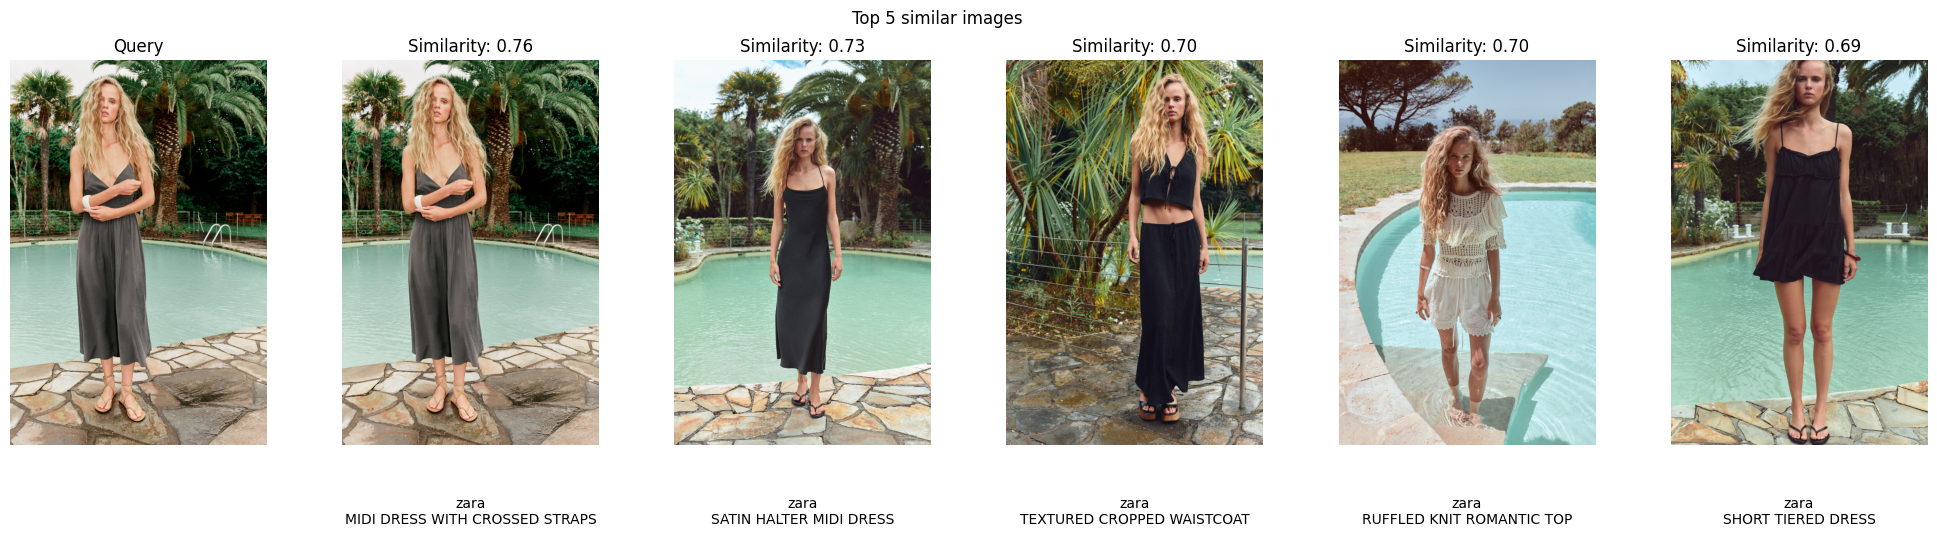

In [189]:
display_similar_images(selected_image_path, top_indices, filename, similarities, df)

In [160]:
# Get features for the selected image 02731245251-15-p.jpg
selected_image_path = '/content/drive/My Drive/zara_images/04877234606-1-p.jpg'

recommend_similar_images(selected_image_path, model, feature_list, filename)


1/1 [==============================] - 0s 454ms/step
Зображення: /content/drive/My Drive/zara_images/04877234606-1-p.jpg, Косинусна подібність: 0.938683271408081
Зображення: /content/drive/My Drive/zara_images/03152521800-p.jpg, Косинусна подібність: 0.8815611600875854
Зображення: /content/drive/My Drive/zara_images/03641817051-p.jpg, Косинусна подібність: 0.8793871402740479
Зображення: /content/drive/My Drive/zara_images/00085801727-p.jpg, Косинусна подібність: 0.8785956501960754
Зображення: /content/drive/My Drive/zara_images/05644815250-p.jpg, Косинусна подібність: 0.8725001811981201


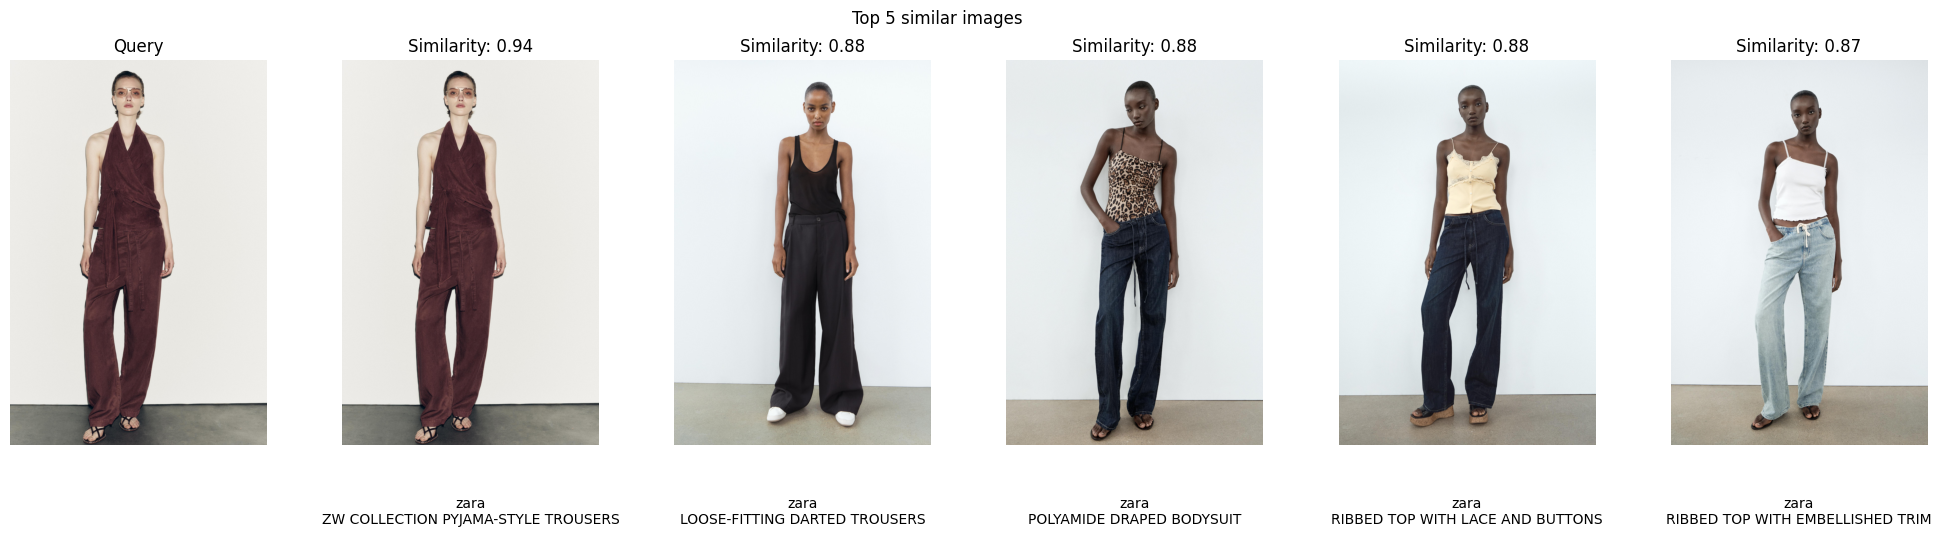

In [187]:
display_similar_images(selected_image_path, top_indices, filename, similarities, df)

**Implementation**:

1. Loading the Feature Vector and File with Names: Load the feature vector and the filenames from the files featurevector.pkl and filenames.pkl in the repository.
2. Loading the Model and Requirements.txt: Load the model and requirements.txt (which includes libraries and versions).
3. Function for Extracting Features from Images: Implement a function to extract features from images.
4. Function for Recommending Similar Images: Implement a function to recommend similar images using cosine similarity algorithm.
5. Loading Images via Camera Button: Provide functionality to upload images using a "Camera" button.
6. Running the Script with Dependencies (.py file): Execute the script with dependencies (.py file) after the client uploads an image.
7. Visualizing Similar Images: Display similar images with similarity percentage and markers (Brand, Name, Price, Product Link).
8. Updating the Image Database and Markers File: Update the image database and markers file once a week/month.